In [1]:
__imp

Libraries have been loaded


## Load Additional Libraries

In [2]:
from IPython.display import display
from sklearn.externals import joblib

from sklearn.metrics import roc_auc_score

basepath = os.path.expanduser('../')

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

## Load Data

In [4]:
%%time

app_train   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/application_train.pkl'))
app_test    = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/application_test.pkl'))

CPU times: user 49.1 ms, sys: 90.3 ms, total: 139 ms
Wall time: 2.16 s


In [5]:
%%time

# additional tables

bureau       = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/bureau.pkl'))
bureau_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/bureau_balance.pkl'))
prev_app     = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/previous_application.pkl'))
installments = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/installments_payments.pkl')) 
pos_cash     = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/POS_CASH_balance.pkl'))
credit_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/credit_card_balance.pkl'))

CPU times: user 466 ms, sys: 1.94 s, total: 2.41 s
Wall time: 20.7 s


## Random Customer

In [55]:
SK_ID_CURR = app_train[app_train.TARGET == 1].sample(n=100).SK_ID_CURR.values[0]; SK_ID_CURR

251618

### Current Application

In [56]:
display_all(app_train.loc[app_train.SK_ID_CURR == SK_ID_CURR].T)

130721
AMT_ANNUITY                                         26509.5
AMT_CREDIT                                           545040
AMT_GOODS_PRICE                                      450000
AMT_INCOME_TOTAL                                     405000
AMT_REQ_CREDIT_BUREAU_DAY                                 0
AMT_REQ_CREDIT_BUREAU_HOUR                                0
AMT_REQ_CREDIT_BUREAU_MON                                 0
AMT_REQ_CREDIT_BUREAU_QRT                                 0
AMT_REQ_CREDIT_BUREAU_WEEK                                0
AMT_REQ_CREDIT_BUREAU_YEAR                                1
APARTMENTS_AVG                                     0.140259
APARTMENTS_MEDI                                    0.141602
APARTMENTS_MODE                                    0.142944
BASEMENTAREA_AVG                                  0.0335999
BASEMENTAREA_MEDI                                 0.0335999
BASEMENTAREA_MODE                                 0.0349121
CNT_CHILDREN                                              0
CNT_FAM_MEMBERS                                           2
CODE_GENDER                                               M
COMMONAREA_AVG                                    0.0261993
COMMONAREA_MEDI                                   0.0263977
COMMONAREA_MODE                                   0.0263977
DAYS_BIRTH                                           -11828
DAYS_EMPLOYED                                         -3158
DAYS_ID_PUBLISH                                        -808
DAYS_LAST_PHONE_CHANGE                                -1730
DAYS_REGISTRATION                                     -3968
DEF_30_CNT_SOCIAL_CIRCLE                                  0
DEF_60_CNT_SOCIAL_CIRCLE                                  0
ELEVATORS_AVG                                             0
ELEVATORS_MEDI                                            0
ELEVATORS_MODE                                            0
EMERGENCYSTATE_MODE                                      No
ENTRANCES_AVG                                     0.0689697
ENTRANCES_MEDI                                    0.0689697
ENTRANCES_MODE                                    0.0689697
EXT_SOURCE_1                                       0.270508
EXT_SOURCE_2                                       0.720215
EXT_SOURCE_3                                       0.680176
FLAG_CONT_MOBILE                                          1
FLAG_DOCUMENT_10                                          0
FLAG_DOCUMENT_11                                          0
FLAG_DOCUMENT_12                                          0
FLAG_DOCUMENT_13                                          0
FLAG_DOCUMENT_14                                          0
FLAG_DOCUMENT_15                                          0
FLAG_DOCUMENT_16                                          0
FLAG_DOCUMENT_17                                          0
FLAG_DOCUMENT_18                                          0
FLAG_DOCUMENT_19                                          0
FLAG_DOCUMENT_2                                           0
FLAG_DOCUMENT_20                                          0
FLAG_DOCUMENT_21                                          0
FLAG_DOCUMENT_3                                           1
FLAG_DOCUMENT_4                                           0
FLAG_DOCUMENT_5                                           0
FLAG_DOCUMENT_6                                           0
FLAG_DOCUMENT_7                                           0
FLAG_DOCUMENT_8                                           0
FLAG_DOCUMENT_9                                           0
FLAG_EMAIL                                                0
FLAG_EMP_PHONE                                            1
FLAG_MOBIL                                                1
FLAG_OWN_CAR                                              N
FLAG_OWN_REALTY                                           Y
FLAG_PHONE                                                1
FLAG_WORK_PHONE                  

### Bureau

In [8]:
display_all(bureau.loc[bureau.SK_ID_CURR == SK_ID_CURR].T)

1167018          1167019          1167020  \
SK_ID_CURR                       316817           316817           316817   
SK_ID_BUREAU                    6198732          6198733          6198734   
CREDIT_ACTIVE                    Active           Active           Active   
CREDIT_CURRENCY              currency 1       currency 1       currency 1   
DAYS_CREDIT                        -713            -1057             -390   
CREDIT_DAY_OVERDUE                    0                0                0   
DAYS_CREDIT_ENDDATE                1113              770             1436   
DAYS_ENDDATE_FACT                   NaN              NaN              NaN   
AMT_CREDIT_MAX_OVERDUE              NaN              NaN          25636.5   
CNT_CREDIT_PROLONG                    0                0                0   
AMT_CREDIT_SUM                   301500        1.575e+06           891000   
AMT_CREDIT_SUM_DEBT              218952           580293              NaN   
AMT_CREDIT_SUM_LIMIT                  0                0              NaN   
AMT_CREDIT_SUM_OVERDUE                0                0                0   
CREDIT_TYPE             Consumer credit  Consumer credit  Consumer credit   
DAYS_CREDIT_UPDATE                   -9              -19              -23   
AMT_ANNUITY                         NaN              NaN              NaN   

                                1167021  
SK_ID_CURR                       316817  
SK_ID_BUREAU                    6198735  
CREDIT_ACTIVE                    Active  
CREDIT_CURRENCY              currency 1  
DAYS_CREDIT                        -165  
CREDIT_DAY_OVERDUE                    0  
DAYS_CREDIT_ENDDATE                1661  
DAYS_ENDDATE_FACT                   NaN  
AMT_CREDIT_MAX_OVERDUE                0  
CNT_CREDIT_PROLONG                    0  
AMT_CREDIT_SUM                 1.35e+06  
AMT_CREDIT_SUM_DEBT              558086  
AMT_CREDIT_SUM_LIMIT                  0  
AMT_CREDIT_SUM_OVERDUE                0  
CREDIT_TYPE             Consumer credit  
DAYS_CREDIT_UPDATE                  -24  
AMT_ANNUITY                         NaN

### Bureau Balance

In [9]:
display_all(bureau.loc[bureau.SK_ID_CURR == SK_ID_CURR, ['SK_ID_BUREAU']]\
                  .merge(bureau_bal, on=['SK_ID_BUREAU'], how='left'))

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       6198732             NaN    NaN
1       6198733             NaN    NaN
2       6198734             NaN    NaN
3       6198735             NaN    NaN

### Previous Application

In [57]:
display_all(prev_app.loc[prev_app.SK_ID_CURR == SK_ID_CURR, :].sort_values(by='DAYS_DECISION', ascending=False).T)

547680   \
SK_ID_PREV                                    1216752   
SK_ID_CURR                                     251618   
NAME_CONTRACT_TYPE                     Consumer loans   
AMT_ANNUITY                                   5936.67   
AMT_APPLICATION                               58819.5   
AMT_CREDIT                                    58819.5   
AMT_DOWN_PAYMENT                                    0   
AMT_GOODS_PRICE                               58819.5   
WEEKDAY_APPR_PROCESS_START                     FRIDAY   
HOUR_APPR_PROCESS_START                            19   
FLAG_LAST_APPL_PER_CONTRACT                         Y   
NFLAG_LAST_APPL_IN_DAY                              1   
RATE_DOWN_PAYMENT                                   0   
RATE_INTEREST_PRIMARY                        0.196899   
RATE_INTEREST_PRIVILEGED                     0.867188   
NAME_CASH_LOAN_PURPOSE                            XAP   
NAME_CONTRACT_STATUS                         Approved   
DAYS_DECISION                                    -223   
NAME_PAYMENT_TYPE               Cash through the bank   
CODE_REJECT_REASON                                XAP   
NAME_TYPE_SUITE                                   NaN   
NAME_CLIENT_TYPE                             Repeater   
NAME_GOODS_CATEGORY                            Mobile   
NAME_PORTFOLIO                                    POS   
NAME_PRODUCT_TYPE                                 XNA   
CHANNEL_TYPE                             Country-wide   
SELLERPLACE_AREA                                   25   
NAME_SELLER_INDUSTRY                     Connectivity   
CNT_PAYMENT                                        12   
NAME_YIELD_GROUP                               middle   
PRODUCT_COMBINATION          POS mobile with interest   
DAYS_FIRST_DRAWING                             365243   
DAYS_FIRST_DUE                                   -189   
DAYS_LAST_DUE_1ST_VERSION                         141   
DAYS_LAST_DUE                                     -99   
DAYS_TERMINATION                                  -95   
NFLAG_INSURED_ON_APPROVAL                           0   

                                              1582668  \
SK_ID_PREV                                    2674055   
SK_ID_CURR                                     251618   
NAME_CONTRACT_TYPE                     Consumer loans   
AMT_ANNUITY                                   13523.5   
AMT_APPLICATION                                133916   
AMT_CREDIT                                     133250   
AMT_DOWN_PAYMENT                                13392   
AMT_GOODS_PRICE                                133916   
WEEKDAY_APPR_PROCESS_START                     SUNDAY   
HOUR_APPR_PROCESS_START                            13   
FLAG_LAST_APPL_PER_CONTRACT                         Y   
NFLAG_LAST_APPL_IN_DAY                              1   
RATE_DOWN_PAYMENT                           0.0994873   
RATE_INTEREST_PRIMARY                             NaN   
RATE_INTEREST_PRIVILEGED                          NaN   
NAME_CASH_LOAN_PURPOSE                            XAP   
NAME_CONTRACT_STATUS                         Approved   
DAYS_DECISION                                    -431   
NAME_PAYMENT_TYPE               Cash through the bank   
CODE_REJECT_REASON                                XAP   
NAME_TYPE_SUITE                                   NaN   
NAME_CLIENT_TYPE                            Refreshed   
NAME_GOODS_CATEGORY                            Mobile   
NAME_PORTFOLIO                                    POS   
NAME_PRODUCT_TYPE                                 XNA   
CHANNEL_TYPE                             Country-wide   
SELLERPLACE_AREA                                   81   
NAME_SELLER_INDUSTRY             Consumer electronics   
CNT_PAYMENT                                        12   
NAME_YIELD_GROUP                               middle   
PRODUCT_COMBINATION          POS mobile with interest   
DAYS_FIRST_DRAWING                             365243  

### POS Cash

In [58]:
display_all(prev_app.loc[prev_app.SK_ID_CURR == SK_ID_CURR, ['SK_ID_CURR', 'SK_ID_PREV']]\
                    .merge(pos_cash.sort_values(by=['SK_ID_CURR', 'SK_ID_PREV', 'MONTHS_BALANCE'], 
                                                ascending=[True, True, False]), 
                           on=['SK_ID_CURR', 'SK_ID_PREV'], how='left')) 

SK_ID_CURR  SK_ID_PREV  MONTHS_BALANCE  CNT_INSTALMENT  \
0       251618     1517754             -46             4.0   
1       251618     1517754             -47             4.0   
2       251618     1517754             -48             4.0   
3       251618     1517754             -49             4.0   
4       251618     1517754             -50             4.0   
5       251618     1216752              -3             4.0   
6       251618     1216752              -4            12.0   
7       251618     1216752              -5            12.0   
8       251618     1216752              -6            12.0   
9       251618     1216752              -7            12.0   
10      251618     1371563             -50             6.0   
11      251618     1371563             -51             6.0   
12      251618     1371563             -52             6.0   
13      251618     1371563             -53             6.0   
14      251618     1371563             -54             6.0   
15      251618     1371563             -55             6.0   
16      251618     1371563             -56             6.0   
17      251618     2674055              -3            12.0   
18      251618     2674055              -4            12.0   
19      251618     2674055              -5            12.0   
20      251618     2674055              -6            12.0   
21      251618     2674055              -7            12.0   
22      251618     2674055              -8            12.0   
23      251618     2674055              -9            12.0   
24      251618     2674055             -10            12.0   
25      251618     2674055             -11            12.0   
26      251618     2674055             -12            12.0   
27      251618     2674055             -13            12.0   
28      251618     2674055             -14            12.0   

    CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                     0.0            Completed       0           0  
1                     1.0               Active       0           0  
2                     2.0               Active       0           0  
3                     3.0               Active       0           0  
4                     4.0               Active       0           0  
5                     0.0            Completed       0           0  
6                     9.0               Active       0           0  
7                    10.0               Active       0           0  
8                    11.0               Active       0           0  
9                    12.0               Active       0           0  
10                    0.0            Completed       0           0  
11                    1.0               Active       0           0  
12                    2.0               Active       0           0  
13                    3.0               Active       0           0  
14                    4.0               Active       0           0  
15                    5.0               Active       0           0  
16                    6.0               Active       0           0  
17                    1.0               Active       0           0  
18                    2.0               Active       0           0  
19                    3.0               Active       0           0  
20                    4.0               Active       0           0  
21                    5.0               Active       0           0  
22                    6.0               Active       0           0  
23                    7.0               Active       0           0  
24                    8.0               Active       0           0  
25                    9.0               Active       0           0  
26                   10.0               Active       0           0  
27                   11.0               Active       0           0  
28                   12.0               Active       0           0

### Credit Balance

In [37]:
display_all(prev_app.loc[prev_app.SK_ID_CURR == SK_ID_CURR, ['SK_ID_CURR', 'SK_ID_PREV']]\
                    .merge(credit_bal.sort_values(by=['SK_ID_CURR','SK_ID_PREV','MONTHS_BALANCE'], 
                                                  ascending=[True, True, False]), 
                           on=['SK_ID_CURR', 'SK_ID_PREV'], how='left')) 

SK_ID_CURR  SK_ID_PREV  MONTHS_BALANCE    AMT_BALANCE  \
0       311137     1185379             NaN            NaN   
1       311137     1885239             NaN            NaN   
2       311137     2706156            -2.0       0.000000   
3       311137     2706156            -3.0       0.000000   
4       311137     2706156            -4.0       0.000000   
5       311137     2706156            -5.0       0.000000   
6       311137     2706156            -6.0       0.000000   
7       311137     2706156            -7.0       0.000000   
8       311137     2706156            -8.0       0.000000   
9       311137     2706156            -9.0       0.000000   
10      311137     2706156           -10.0       0.000000   
11      311137     2706156           -11.0       0.000000   
12      311137     2706156           -12.0     253.845001   
13      311137     2706156           -13.0   73308.148438   
14      311137     2706156           -14.0   70239.867188   
15      311137     2706156           -15.0   76021.335938   
16      311137     2706156           -16.0   95100.976562   
17      311137     2706156           -17.0   98001.132812   
18      311137     2706156           -18.0  100795.093750   
19      311137     2706156           -19.0  455263.593750   
20      311137     2706156           -20.0  459411.437500   
21      311137     2706156           -21.0  463829.312500   
22      311137     2706156           -22.0  467262.281250   
23      311137     2706156           -23.0  470260.656250   
24      311137     2706156           -24.0  473217.625000   
25      311137     2706156           -25.0  479890.937500   
26      311137     2706156           -26.0  420121.031250   
27      311137     2706156           -27.0  246169.171875   

    AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                       NaN                       NaN                   NaN   
1                       NaN                       NaN                   NaN   
2                   90000.0                       0.0                0.0000   
3                   90000.0                       0.0                0.0000   
4                   90000.0                       0.0                0.0000   
5                   90000.0                       0.0                0.0000   
6                   90000.0                       0.0                0.0000   
7                   90000.0                       0.0                0.0000   
8                   90000.0                       0.0                0.0000   
9                   90000.0                       0.0                0.0000   
10                  90000.0                       0.0                0.0000   
11                  90000.0                       0.0                0.0000   
12                  90000.0                       0.0                0.0000   
13                 225000.0                       0.0                0.0000   
14                  90000.0                       0.0                0.0000   
15                  90000.0                       0.0                0.0000   
16                  90000.0                       0.0                0.0000   
17                  90000.0                       0.0                0.0000   
18                  90000.0                       0.0                0.0000   
19                 450000.0                       0.0                0.0000   
20                 450000.0                       0.0                0.0000   
21                 450000.0                       0.0                0.0000   
22                 450000.0                       0.0                0.0000   
23                 450000.0                       0.0                0.0000   
24                 450000.0                       0.0                0.0000   
25                 450000.0                       0.0            45018.0000   
26                 450000.0                  310500.0           404999.1875   
27                 450

### Installments

In [36]:
display_all(prev_app.loc[prev_app.SK_ID_CURR == SK_ID_CURR, ['SK_ID_CURR', 'SK_ID_PREV']]\
                    .merge(installments.sort_values(by=['SK_ID_CURR',
                                                        'SK_ID_PREV',
                                                        'NUM_INSTALMENT_NUMBER']), 
                           on=['SK_ID_CURR', 'SK_ID_PREV'], how='left')) 

SK_ID_CURR  SK_ID_PREV  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0       311137     1185379                     1.0                      1   
1       311137     1185379                     1.0                      1   
2       311137     1185379                     1.0                      2   
3       311137     1185379                     1.0                      2   
4       311137     1185379                     1.0                      3   
5       311137     1185379                     1.0                      3   
6       311137     1185379                     1.0                      4   
7       311137     1185379                     1.0                      4   
8       311137     1185379                     1.0                      5   
9       311137     1185379                     1.0                      6   
10      311137     1185379                     1.0                      6   
11      311137     1185379                     2.0                    101   
12      311137     1885239                     1.0                      1   
13      311137     1885239                     1.0                      2   
14      311137     1885239                     1.0                      3   
15      311137     1885239                     1.0                      3   
16      311137     1885239                     1.0                      4   
17      311137     1885239                     1.0                      5   
18      311137     1885239                     1.0                      6   
19      311137     1885239                     1.0                      7   
20      311137     1885239                     1.0                      8   
21      311137     1885239                     1.0                      9   
22      311137     1885239                     1.0                     10   
23      311137     1885239                     1.0                     11   
24      311137     1885239                     1.0                     11   
25      311137     1885239                     1.0                     12   
26      311137     1885239                     1.0                     12   
27      311137     1885239                     1.0                     13   
28      311137     1885239                     1.0                     14   
29      311137     1885239                     1.0                     14   
30      311137     1885239                     1.0                     15   
31      311137     1885239                     1.0                     16   
32      311137     1885239                     1.0                     16   
33      311137     1885239                     1.0                     17   
34      311137     1885239                     1.0                     17   
35      311137     1885239                     1.0                     18   
36      311137     1885239                     1.0                     18   
37      311137     1885239                     1.0                     19   
38      311137     1885239                     1.0                     20   
39      311137     1885239                     1.0                     21   
40      311137     1885239                     1.0                     21   
41      311137     1885239                     1.0                     22   
42      311137     1885239                     3.0                     23   
43      311137     1885239                     2.0                    101   
44      311137     2706156                     0.0                      1   
45      311137     2706156                     0.0                      2   
46      311137     2706156                     0.0                      3   
47      311137     2706156                     0.0                      4   
48      311137     2706156                     0.0                      5   
49      311137     2706156                     0.0                      6   
50      311137     2706156                     0.0                      7   


## Hypothesis

### When did the client opt for first credit with Home Credit ?

In [15]:
join_date = prev_app.loc[(prev_app.NAME_CLIENT_TYPE == 'New') &\
            (prev_app.NAME_CONTRACT_STATUS == 'Approved')].groupby('SK_ID_CURR')['DAYS_DECISION'].max()
join_date = -join_date/365

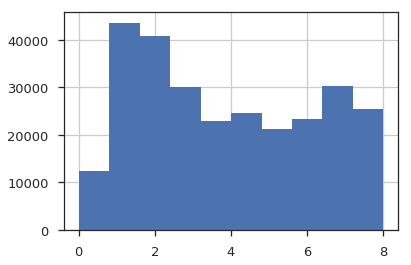

In [17]:
join_date.hist();

In [18]:
join_date = app_train.SK_ID_CURR.map(join_date)
join_date[join_date.isnull()].shape[0] / len(join_date)

0.22936740474324496

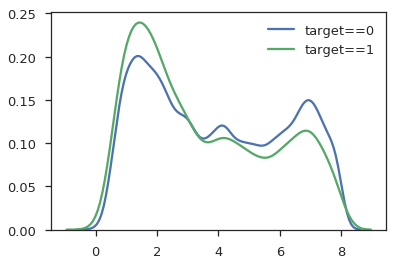

In [21]:
sns.kdeplot(join_date[app_train.TARGET == 0], label='target==0')
sns.kdeplot(join_date[app_train.TARGET == 1], label='target==1');

### Difference between date when a person opted for credit from Home Credit and Employment Date

In [26]:
join_date = prev_app.loc[(prev_app.NAME_CLIENT_TYPE == 'New') &\
            (prev_app.NAME_CONTRACT_STATUS == 'Approved')].groupby('SK_ID_CURR')['DAYS_DECISION'].max()
join_date = -join_date/365
join_date = app_train.SK_ID_CURR.map(join_date)

diff_join_employed_date = (-app_train.DAYS_EMPLOYED.replace({365243: np.nan}) / 365) - join_date

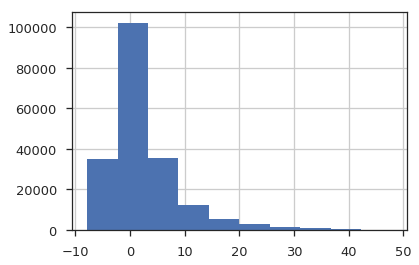

In [29]:
diff_join_employed_date.hist();

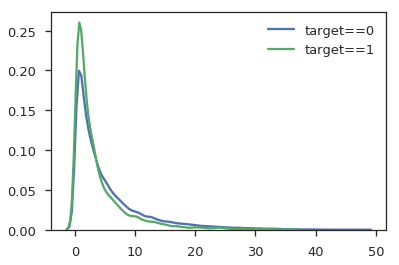

In [36]:
sns.kdeplot(diff_join_employed_date[(diff_join_employed_date > 0) & (app_train.TARGET == 0)], label='target==0')
sns.kdeplot(diff_join_employed_date[(diff_join_employed_date > 0) & (app_train.TARGET == 1)], label='target==1');

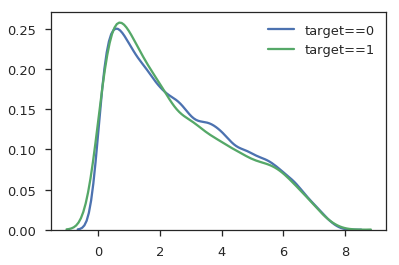

In [37]:
sns.kdeplot((-diff_join_employed_date[(diff_join_employed_date < 0) & (app_train.TARGET == 0)]), label='target==0')
sns.kdeplot((-diff_join_employed_date[(diff_join_employed_date < 0) & (app_train.TARGET == 1)]), label='target==1');

### Relationship between Income and Employment (in Years)

In [41]:
income_emp = (app_train.AMT_INCOME_TOTAL / (-app_train.DAYS_EMPLOYED.replace({365243: np.nan}) / 365))\
             .replace([np.inf, -np.inf], np.nan)

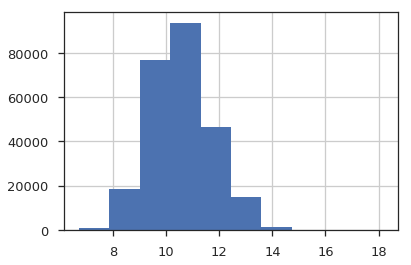

In [44]:
income_emp.map(np.log1p).hist();

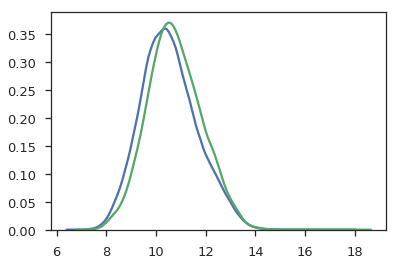

In [45]:
sns.kdeplot(income_emp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(income_emp[app_train.TARGET == 1].map(np.log1p));

### Represent contract status of previous applications as string of characters

In [102]:
%%time

contract_status_str = prev_app.sort_values(by='DAYS_DECISION', ascending=False).groupby('SK_ID_CURR')['NAME_CONTRACT_STATUS']\
                      .apply(lambda x: ''.join([z[0:1] for z in x]))

CPU times: user 1min 21s, sys: 1.87 s, total: 1min 22s
Wall time: 1min 22s


In [103]:
contract_status_str = app_train.SK_ID_CURR.map(contract_status_str)
contract_status_str[contract_status_str.isnull()].shape[0] / len(contract_status_str)

0.05350702901684818

In [104]:
ss = pd.crosstab(contract_status_str, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss.sort_values(by=1, ascending=False))

TARGET                0.0   1.0     ratio
SK_ID_CURR                               
A                   47625  4357  0.083817
AA                  30173  2320  0.071400
AAA                 18340  1194  0.061124
AAAA                10159   567  0.052862
RA                   3615   542  0.130382
CAA                  5554   464  0.077102
CA                   5491   437  0.073718
AAAAA                5470   296  0.051335
ARA                  2663   274  0.093292
CAAA                 3955   260  0.061684
RRA                  1286   222  0.147215
RAA                  1663   204  0.109266
ACA                  1864   173  0.084929
CAAAA                2469   154  0.058711
AAAAAA               2767   150  0.051423
AARA                 1486   134  0.082716
UA                   1180   126  0.096478
CCAA                 1575   124  0.072984
CCA                  1262   114  0.082849
ACAA                 1472   107  0.067764
AR                   1009   107  0.095878
ARAA                 1081   102  0

### Relationship of external scores with months balance from bureau

In [5]:
data_recency = bureau_bal.groupby('SK_ID_BUREAU', as_index=False)['MONTHS_BALANCE'].max()
data_recency = bureau.loc[:, ['SK_ID_CURR', 'SK_ID_BUREAU']].merge(data_recency, how='left')
data_recency.head()

SK_ID_CURR  SK_ID_BUREAU  MONTHS_BALANCE
0      215354       5714462             NaN
1      215354       5714463             NaN
2      215354       5714464             NaN
3      215354       5714465             NaN
4      215354       5714466             NaN

In [6]:
data_recency = data_recency.groupby('SK_ID_CURR', as_index=False)['MONTHS_BALANCE'].max()
data_recency = app_train.loc[:, ['SK_ID_CURR',
                                 'EXT_SOURCE_1',
                                 'EXT_SOURCE_2',
                                 'EXT_SOURCE_3'
                                ]].merge(data_recency, how='left')

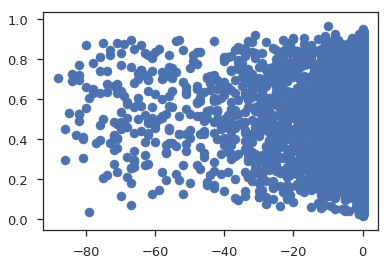

In [11]:
plt.scatter(data_recency.MONTHS_BALANCE, data_recency.EXT_SOURCE_1);

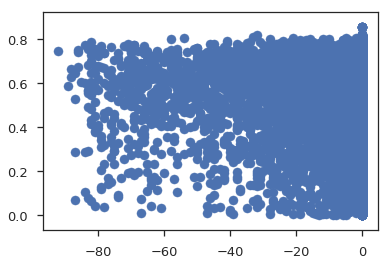

In [12]:
plt.scatter(data_recency.MONTHS_BALANCE, data_recency.EXT_SOURCE_2);

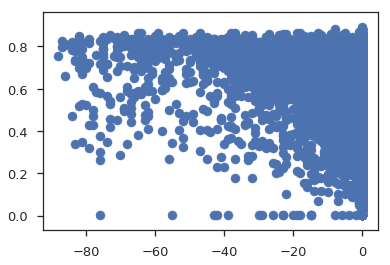

In [13]:
plt.scatter(data_recency.MONTHS_BALANCE, data_recency.EXT_SOURCE_3);

### Hypothesis: Max Annuity of the approved previous credit and current annuity

In [55]:
max_annuity_prev_app = prev_app.loc[prev_app.NAME_CONTRACT_STATUS == 'Approved', ['SK_ID_CURR', 'AMT_ANNUITY']]\
                               .groupby('SK_ID_CURR')['AMT_ANNUITY'].max()

max_annuity_prev_app = app_train.SK_ID_CURR.map(max_annuity_prev_app)
max_annuity_prev_app[max_annuity_prev_app.isnull()].shape[0] / len(max_annuity_prev_app)

0.056739433711314395

In [56]:
diff_curr_annuity_max_annuity_prev_app = app_train.AMT_ANNUITY - max_annuity_prev_app

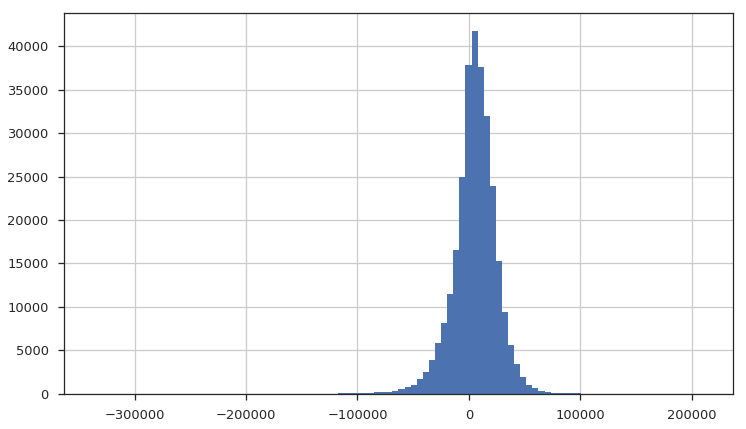

In [58]:
plt.figure(figsize=(12, 7))
diff_curr_annuity_max_annuity_prev_app.hist(bins=100);

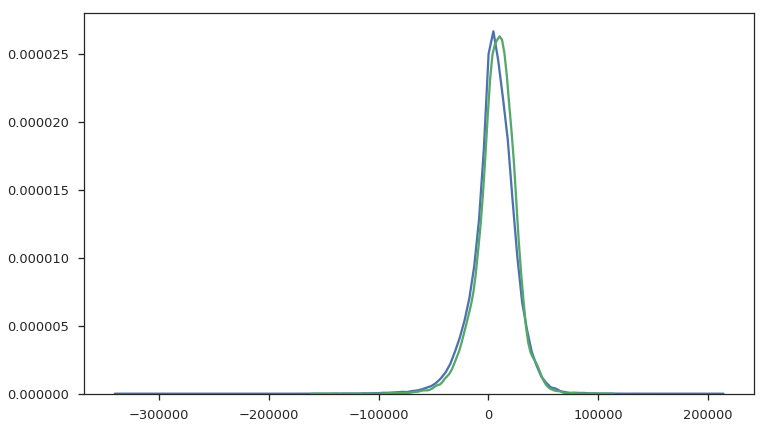

In [59]:
plt.figure(figsize=(12, 7))
sns.kdeplot(diff_curr_annuity_max_annuity_prev_app[app_train.TARGET == 0])
sns.kdeplot(diff_curr_annuity_max_annuity_prev_app[app_train.TARGET == 1]);

In [69]:
ratio_curr_annuity_max_annuity_prev_app = (app_train.AMT_ANNUITY / max_annuity_prev_app).replace([-np.inf, np.inf], np.nan)

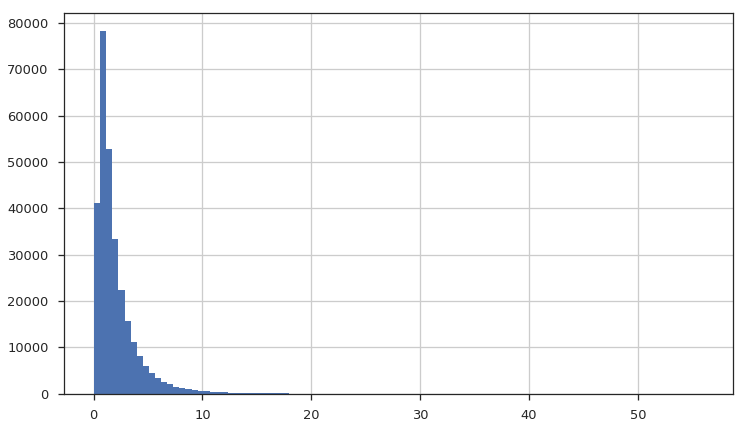

In [70]:
plt.figure(figsize=(12, 7))
ratio_curr_annuity_max_annuity_prev_app.hist(bins=100);

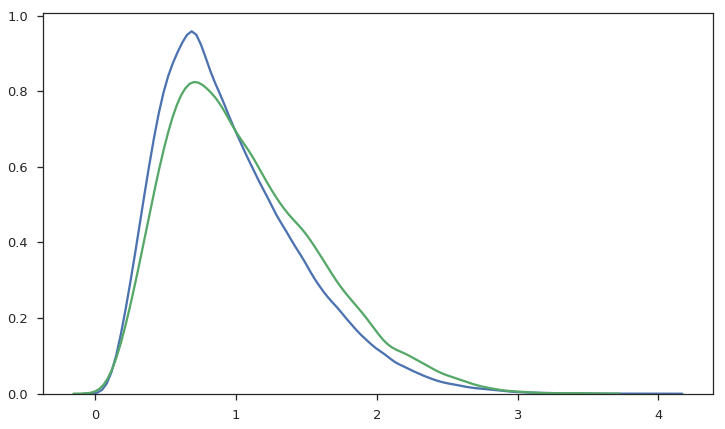

In [72]:
plt.figure(figsize=(12, 7))
sns.kdeplot(ratio_curr_annuity_max_annuity_prev_app[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(ratio_curr_annuity_max_annuity_prev_app[app_train.TARGET == 1].map(np.log1p));

### Relationship between debt, credit and credit enddate

In [39]:
mask = (bureau.CREDIT_ACTIVE == 'Active') & (bureau.AMT_CREDIT_SUM_DEBT > 0) & (bureau.DAYS_CREDIT_ENDDATE > 0)
ratio_debt_credit = bureau.loc[mask, 'AMT_CREDIT_SUM'] - bureau.loc[mask, 'AMT_CREDIT_SUM_DEBT']
ratio_debt_credit_by_enddate = (ratio_debt_credit / bureau.loc[mask, 'DAYS_CREDIT_ENDDATE']).replace([-np.inf, np.inf], np.nan)
tmp = ratio_debt_credit_by_enddate.groupby(bureau.loc[mask, 'SK_ID_CURR']).mean()
tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.4489823128278338

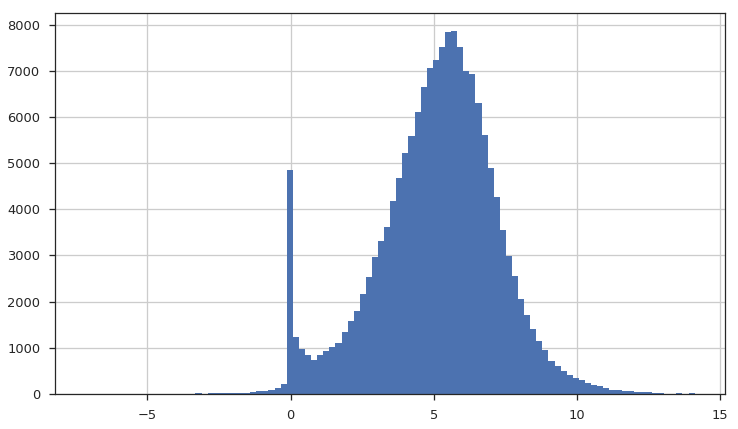

In [36]:
plt.figure(figsize=(12, 7))
tmp.map(np.log1p).hist(bins=100);

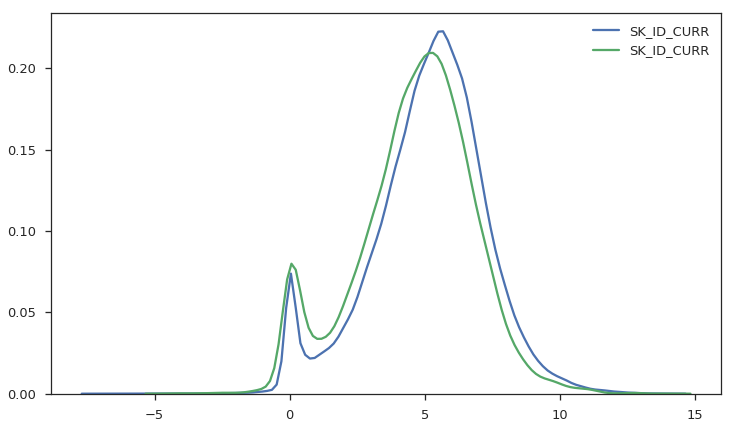

In [37]:
plt.figure(figsize=(12, 7))
sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

### Relationship between debt, credit and credit enddate and age, employed since.

In [40]:
mask = (bureau.CREDIT_ACTIVE == 'Active') & (bureau.AMT_CREDIT_SUM_DEBT > 0) & (bureau.DAYS_CREDIT_ENDDATE > 0)
ratio_debt_credit = bureau.loc[mask, 'AMT_CREDIT_SUM'] - bureau.loc[mask, 'AMT_CREDIT_SUM_DEBT']
ratio_debt_credit_by_enddate = (ratio_debt_credit / bureau.loc[mask, 'DAYS_CREDIT_ENDDATE']).replace([-np.inf, np.inf], np.nan)
tmp = ratio_debt_credit_by_enddate.groupby(bureau.loc[mask, 'SK_ID_CURR']).sum()
tmp = app_train.SK_ID_CURR.map(tmp) * ((-app_train.DAYS_EMPLOYED.replace({365243: np.nan}) / 365) / (-app_train.DAYS_BIRTH / 365))

tmp[tmp.isnull()].shape[0] / len(tmp)

0.5431415461560725

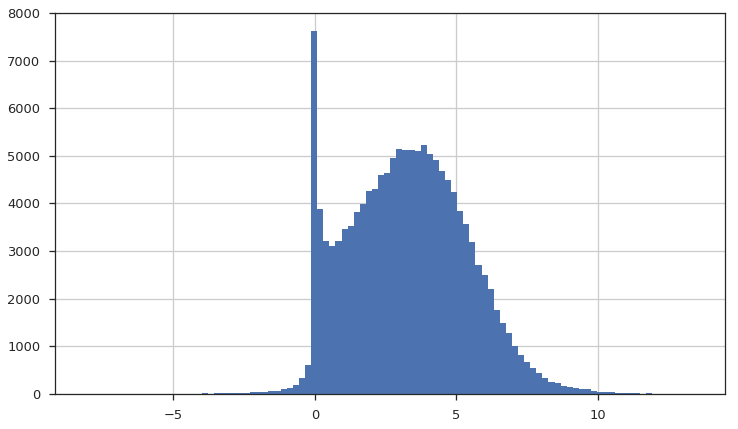

In [41]:
plt.figure(figsize=(12, 7))
tmp.map(np.log1p).hist(bins=100);

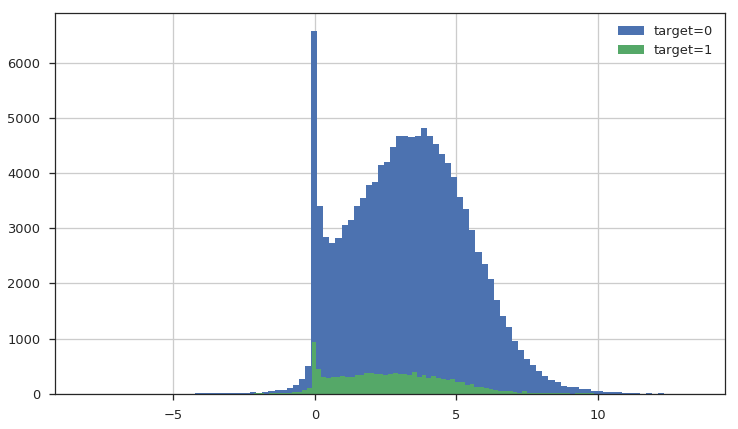

In [42]:
plt.figure(figsize=(12, 7))
tmp[app_train.TARGET == 0].map(np.log1p).hist(bins=100, label='target=0')
tmp[app_train.TARGET == 1].map(np.log1p).hist(bins=100, label='target=1')
plt.legend(loc='best');

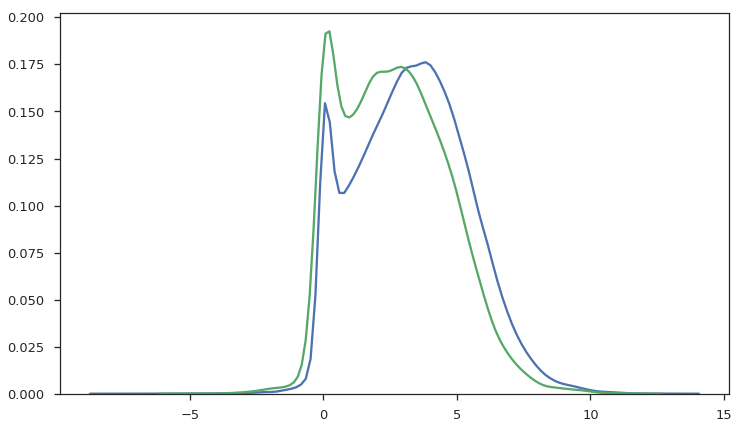

In [43]:
plt.figure(figsize=(12, 7))
sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

### Relationship between credit and lenght of pos_cash

In [74]:
mask = (prev_app.NAME_CONTRACT_STATUS == 'Approved') & (prev_app.NAME_CONTRACT_TYPE != 'Revolving loans')
credit_term = pos_cash.groupby(['SK_ID_CURR', 'SK_ID_PREV']).size().reset_index().rename(columns={0: 'term'})
tmp = prev_app.loc[mask, ['SK_ID_CURR', 'SK_ID_PREV', 'AMT_CREDIT']].merge(credit_term, how='inner')
tmp.loc[:, 'ratio_credit_term'] = tmp.AMT_CREDIT / tmp.term
tmp = tmp.groupby('SK_ID_CURR')['ratio_credit_term'].std()
tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.3673429568373164

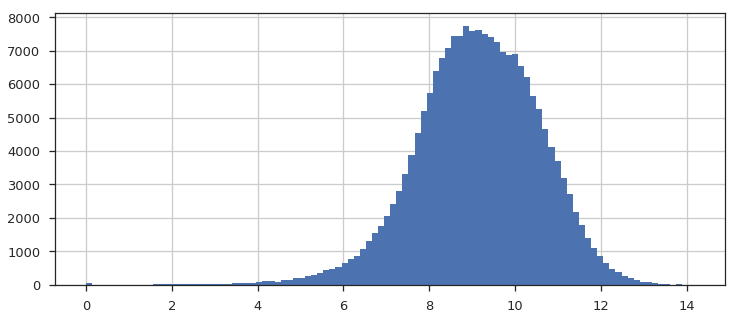

In [75]:
plt.figure(figsize=(12, 5))
tmp.map(np.log1p).hist(bins=100);

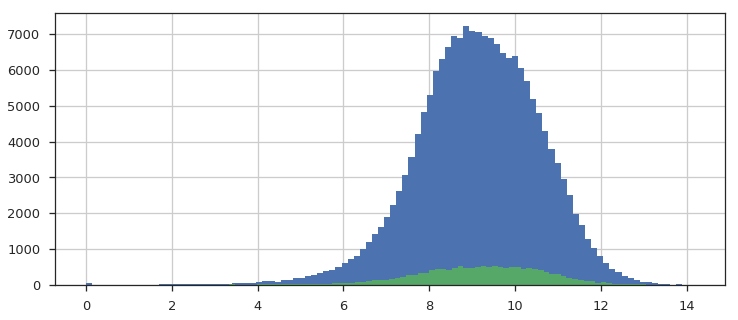

In [76]:
plt.figure(figsize=(12, 5))
tmp[app_train.TARGET == 0].map(np.log1p).hist(bins=100)
tmp[app_train.TARGET == 1].map(np.log1p).hist(bins=100);

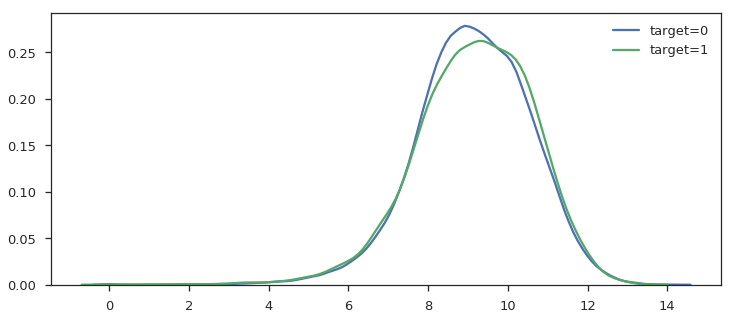

In [77]:
plt.figure(figsize=(12, 5))
sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p), label='target=0')
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p), label='target=1');

### Relationship between loan start date from bureau and previous home credit applications and employment start date

In [100]:
mask   = bureau.CREDIT_ACTIVE == 'Active'
bureau_credit_start = bureau.loc[mask, ['SK_ID_CURR', 'DAYS_CREDIT']]

mask = prev_app.NAME_CONTRACT_STATUS == 'Approved'
prev_app_start = prev_app.loc[mask, ['SK_ID_CURR', 'DAYS_DECISION']]

In [120]:
client_employ_bureau_loan_dates = app_train.loc[:, ['SK_ID_CURR', 'DAYS_EMPLOYED', 'TARGET']]\
                                           .merge(bureau_credit_start, how='left')
client_employ_bureau_loan_dates['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

client_employ_hc_loan_dates = app_train.loc[:, ['SK_ID_CURR', 'DAYS_EMPLOYED', 'TARGET']]\
                                           .merge(prev_app_start, how='left')

In [117]:
client_employ_bureau_loan_dates.loc[:, 'loan_before_employment'] = (client_employ_bureau_loan_dates.DAYS_CREDIT > client_employ_bureau_loan_dates.DAYS_EMPLOYED).astype(np.uint8)
client_employ_hc_loan_dates.loc[:, 'loan_before_employment'] = (client_employ_hc_loan_dates.DAYS_DECISION > client_employ_hc_loan_dates.DAYS_EMPLOYED).astype(np.uint8)

btmp = client_employ_bureau_loan_dates.groupby('SK_ID_CURR')['loan_before_employment'].sum()
htmp = client_employ_hc_loan_dates.groupby('SK_ID_CURR')['loan_before_employment'].sum()
tmp  = btmp + htmp

tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.0

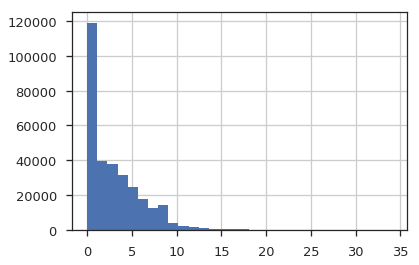

In [118]:
tmp.hist(bins=30);

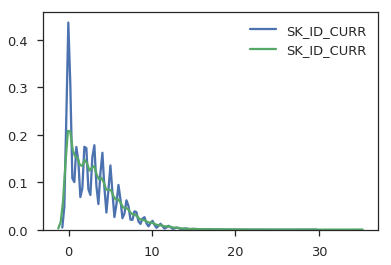

In [119]:
sns.kdeplot(tmp[app_train.TARGET == 0])
sns.kdeplot(tmp[app_train.TARGET == 1]);

In [136]:
client_employ_bureau_loan_dates = app_train.loc[:, ['SK_ID_CURR', 'DAYS_EMPLOYED', 'TARGET']]\
                                           .merge(bureau_credit_start, how='left')
client_employ_bureau_loan_dates['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

client_employ_hc_loan_dates = app_train.loc[:, ['SK_ID_CURR', 'DAYS_EMPLOYED', 'TARGET']]\
                                           .merge(prev_app_start, how='left')

client_employ_bureau_loan_dates.loc[:, 'diff_loan_before_employment'] = (client_employ_bureau_loan_dates.DAYS_CREDIT - client_employ_bureau_loan_dates.DAYS_EMPLOYED)
client_employ_hc_loan_dates.loc[:, 'diff_loan_before_employment'] = (client_employ_hc_loan_dates.DAYS_DECISION - client_employ_hc_loan_dates.DAYS_EMPLOYED)

btmp = client_employ_bureau_loan_dates.groupby('SK_ID_CURR')['diff_loan_before_employment'].sum()
htmp = client_employ_hc_loan_dates.groupby('SK_ID_CURR')['diff_loan_before_employment'].sum()
tmp  = btmp + htmp

tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.0

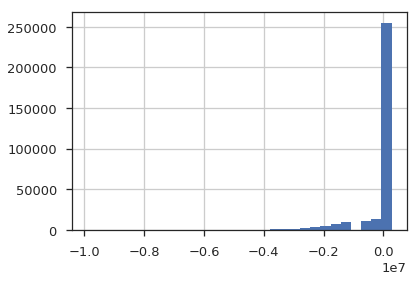

In [137]:
tmp.hist(bins=30);

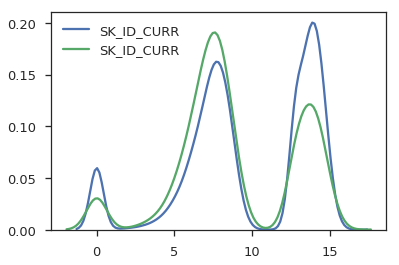

In [138]:
sns.kdeplot((-tmp[app_train.TARGET == 0]).map(np.log1p))
sns.kdeplot((-tmp[app_train.TARGET == 1]).map(np.log1p));

### How many bureau credits were closed prematurely ?

In [19]:
mask = bureau.CREDIT_ACTIVE == 'Closed'
closed_before_scheduled = (bureau.loc[mask, 'DAYS_CREDIT_ENDDATE'] > bureau.loc[mask, 'DAYS_ENDDATE_FACT']).astype(np.uint8)
tmp = closed_before_scheduled.groupby(bureau.loc[mask, 'SK_ID_CURR']).sum()
tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.25152270975672414

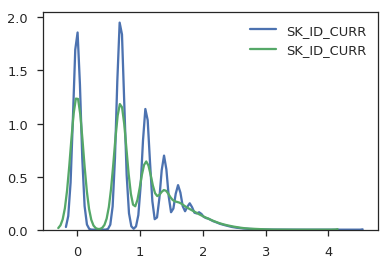

In [22]:
sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

In [29]:
mask = bureau.CREDIT_ACTIVE == 'Closed'
diff_closed_before_scheduled = (bureau.loc[mask, 'DAYS_CREDIT_ENDDATE'] - bureau.loc[mask, 'DAYS_ENDDATE_FACT'])
tmp = diff_closed_before_scheduled.groupby(bureau.loc[mask, 'SK_ID_CURR']).mean()
tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.25653066069181263

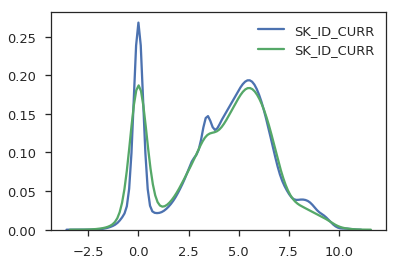

In [30]:
sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

### Total debt

In [100]:
mask = (bureau.CREDIT_ACTIVE == 'Active')
total_bureau_debt = bureau.loc[mask, :].groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()

mask = (prev_app.NAME_CONTRACT_STATUS == 'Approved') & (prev_app.DAYS_TERMINATION > 0) & (prev_app.CNT_PAYMENT > 0) &\
       (-prev_app.DAYS_DECISION / 30 < prev_app.CNT_PAYMENT)

remaining_months = prev_app.loc[mask].CNT_PAYMENT - (-prev_app.loc[mask].DAYS_DECISION / 30)
prev_app_debt = prev_app.loc[mask].AMT_ANNUITY * remaining_months

total_debt = total_bureau_debt.add(prev_app_debt, fill_value=0)
total_debt = (app_train.SK_ID_CURR.map(total_debt))

total_debt[total_debt.isnull()].shape[0] / len(total_debt)

0.26918711850958177

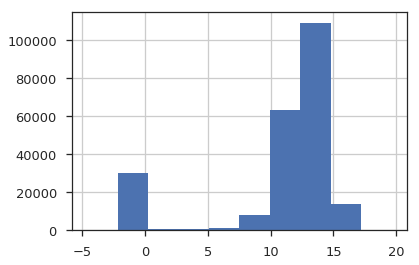

In [101]:
total_debt.map(np.log1p).hist();

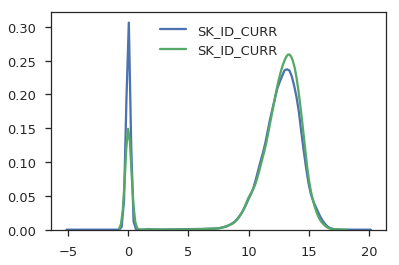

In [102]:
sns.kdeplot(total_debt[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(total_debt[app_train.TARGET == 1].map(np.log1p));

In [79]:
mask = (bureau.CREDIT_ACTIVE == 'Active')
total_bureau_credit = bureau.loc[mask, :].groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()

mask = (prev_app.NAME_CONTRACT_STATUS == 'Approved') & (prev_app.DAYS_TERMINATION > 0) & (prev_app.CNT_PAYMENT > 0) &\
       (-prev_app.DAYS_DECISION / 30 < prev_app.CNT_PAYMENT)

remaining_months = prev_app.loc[mask].CNT_PAYMENT - (-prev_app.loc[mask].DAYS_DECISION / 30)
prev_app_credit = prev_app.loc[mask].AMT_ANNUITY * remaining_months

total_credit = total_bureau_credit.add(prev_app_credit, fill_value=0)
total_credit = (app_train.SK_ID_CURR.map(total_credit))

total_credit[total_credit.isnull()].shape[0] / len(total_credit)

0.26918711850958177

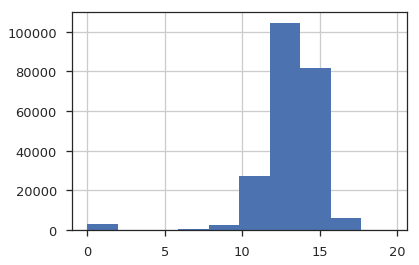

In [80]:
total_credit.map(np.log1p).hist();

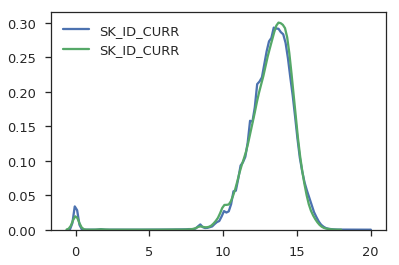

In [81]:
sns.kdeplot(total_credit[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(total_credit[app_train.TARGET == 1].map(np.log1p));

In [94]:
debt_to_credit_ratio = total_debt.div(total_credit, fill_value=np.nan).replace([-np.inf, np.inf], np.nan)
debt_to_credit_ratio[debt_to_credit_ratio.isnull()].shape[0] / len(debt_to_credit_ratio)

0.2783705298347051

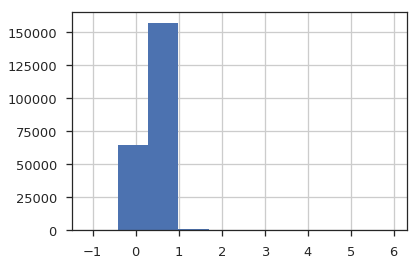

In [98]:
debt_to_credit_ratio.map(np.log1p).hist();

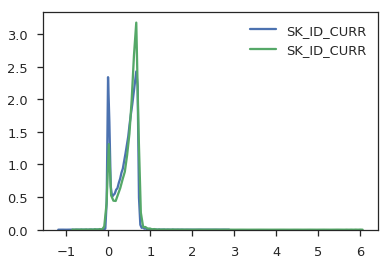

In [99]:
sns.kdeplot(debt_to_credit_ratio[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(debt_to_credit_ratio[app_train.TARGET == 1].map(np.log1p));

In [92]:
total_debt.head()

0    245781.0
1         0.0
2         NaN
3         NaN
4         NaN
Name: SK_ID_CURR, dtype: float64

In [93]:
total_credit.head()

0    481988.5625
1    810000.0000
2            NaN
3            NaN
4            NaN
Name: SK_ID_CURR, dtype: float64

### Differences between train and test set.

In [7]:
tr = app_train.loc[:, ['SK_ID_CURR']]\
              .merge(bureau.groupby('SK_ID_CURR', as_index=False)['DAYS_CREDIT'].min(), how='left')
te = app_test.loc[:, ['SK_ID_CURR']]\
             .merge(bureau.groupby('SK_ID_CURR', as_index=False)['DAYS_CREDIT'].min(), how='left')

In [10]:
tr[tr.DAYS_CREDIT.isnull()].shape[0] / len(tr), te[te.DAYS_CREDIT.isnull()].shape[0] / len(te)

(0.14314935075493235, 0.1317905793533563)

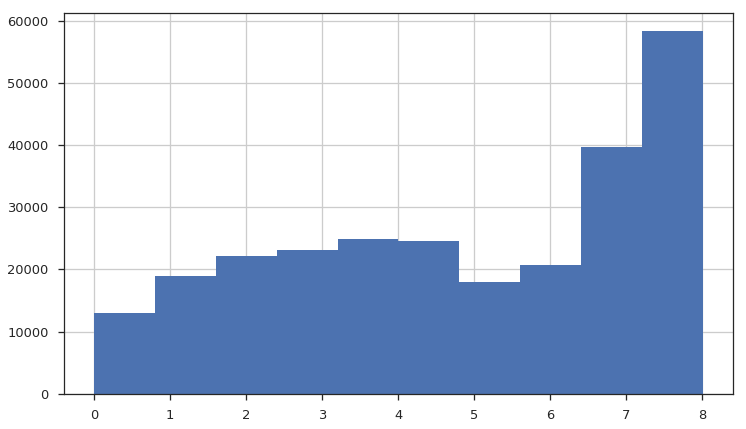

In [16]:
plt.figure(figsize=(12, 7))
(-tr[tr.DAYS_CREDIT.notnull()]['DAYS_CREDIT'] / 365).hist();

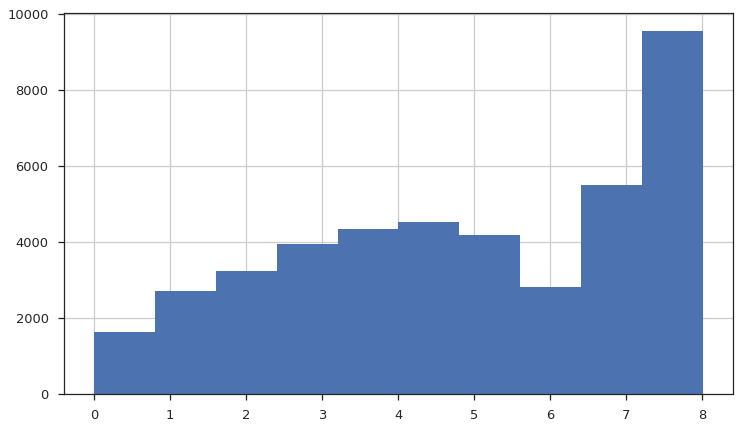

In [17]:
plt.figure(figsize=(12, 7))
(-te[te.DAYS_CREDIT.notnull()]['DAYS_CREDIT'] / 365).hist();

### Difference between train and test in terms of completed status 

In [26]:
%%time

current_status = bureau_bal.groupby('SK_ID_BUREAU', as_index=False)['MONTHS_BALANCE'].min()
current_status = bureau_bal.merge(current_status, how='inner')

CPU times: user 5.49 s, sys: 1.75 s, total: 7.24 s
Wall time: 7.25 s


In [27]:
current_status.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448             -26      X
1       5715449             -11      X
2       5715451             -30      X
3       5715452             -32      X
4       5715453             -37      X

In [29]:
bbal = bureau.loc[:, ['SK_ID_CURR', 'SK_ID_BUREAU']].merge(current_status, how='left')
bbal.head()

SK_ID_CURR  SK_ID_BUREAU  MONTHS_BALANCE STATUS
0      215354       5714462             NaN    NaN
1      215354       5714463             NaN    NaN
2      215354       5714464             NaN    NaN
3      215354       5714465             NaN    NaN
4      215354       5714466             NaN    NaN

In [49]:
recent_bbal = bbal[bbal.MONTHS_BALANCE.notnull()].groupby('SK_ID_CURR', as_index=False)['MONTHS_BALANCE'].min()
res         = bbal.loc[bbal.MONTHS_BALANCE.notnull(), ['SK_ID_CURR', 'MONTHS_BALANCE', 'STATUS']].merge(recent_bbal, how='inner')
res.head()

SK_ID_CURR  MONTHS_BALANCE STATUS
0      380361           -86.0      X
1      125263           -15.0      0
2      275240           -81.0      0
3      399518           -30.0      X
4      291600           -78.0      X

In [51]:
ss = pd.crosstab(res.STATUS.astype(np.str), app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss)

TARGET    0.0   1.0     ratio
STATUS                       
0       76832  6749  0.080748
1          50     2  0.038462
4           8     0  0.000000
5           6     3  0.333333
C         758    55  0.067651
X       62590  5646  0.082742


In [46]:
res = app_train.loc[:, ['SK_ID_CURR']].merge(res, how='inner')
res['STATUS'].value_counts(normalize=True)

0    0.580629
X    0.413419
C    0.005542
1    0.000306
5    0.000067
4    0.000038
3    0.000000
2    0.000000
Name: STATUS, dtype: float64

In [48]:
res = app_test.loc[:, ['SK_ID_CURR']].merge(res, how='inner')
res['STATUS'].value_counts(normalize=True)

X    0.519734
0    0.474875
C    0.004850
1    0.000416
4    0.000083
5    0.000042
3    0.000000
2    0.000000
Name: STATUS, dtype: float64

### Total Annuity to be paid

In [45]:
mask = (prev_app.NAME_CONTRACT_STATUS == 'Approved') & (prev_app.CNT_PAYMENT > 0) &\
       ((-prev_app.DAYS_DECISION / 30) < (prev_app.CNT_PAYMENT))

total_prev_annuity = prev_app.loc[mask, :].groupby('SK_ID_CURR')['AMT_ANNUITY'].sum()
total_prev_annuity = app_train.SK_ID_CURR.map(total_prev_annuity)

current_annuity    = app_train.AMT_ANNUITY

total_annuity      = total_prev_annuity.add(current_annuity, fill_value=0)

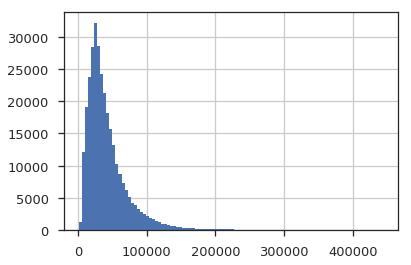

In [46]:
total_annuity.hist(bins=100);

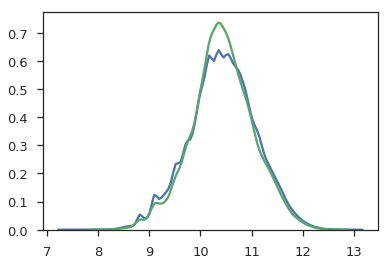

In [47]:
sns.kdeplot(total_annuity[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(total_annuity[app_train.TARGET == 1].map(np.log1p));

### Months still left on payment

In [58]:
mask = (prev_app.NAME_CONTRACT_STATUS == 'Approved') & (prev_app.CNT_PAYMENT > 0) &\
       ((-prev_app.DAYS_DECISION / 30) < (prev_app.CNT_PAYMENT))

months_left_to_pay = (prev_app.loc[mask, 'CNT_PAYMENT']) - (-prev_app.loc[mask, 'DAYS_DECISION'] / 30) 
months_left_to_pay = months_left_to_pay.groupby(prev_app.loc[mask, 'SK_ID_CURR']).sum()

months_left_to_pay = app_train.SK_ID_CURR.map(months_left_to_pay)
months_left_to_pay[months_left_to_pay.isnull()].shape[0] / len(months_left_to_pay)

0.5046453622797233

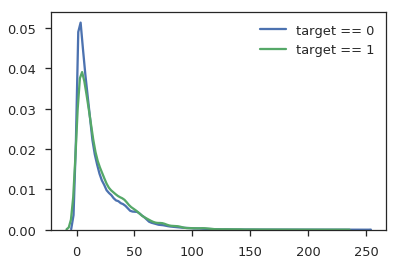

In [59]:
sns.kdeplot(months_left_to_pay[app_train.TARGET == 0], label='target == 0')
sns.kdeplot(months_left_to_pay[app_train.TARGET == 1], label='target == 1');

### Num nulls in external scores

In [62]:
null_str = app_train.loc[:, 'EXT_SOURCE_1'].isnull().astype(np.str) + '_' +\
           app_train.loc[:, 'EXT_SOURCE_2'].isnull().astype(np.str) + '_' +\
           app_train.loc[:, 'EXT_SOURCE_3'].isnull().astype(np.str)

In [64]:
ss = pd.crosstab(null_str, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
ss

TARGET                0.0    1.0     ratio
row_0                                     
False_False_False  101591   7998  0.072982
False_False_True    22297   2036  0.083672
False_True_False      136     17  0.111111
False_True_True        55      3  0.051724
True_False_False   125412  11115  0.081412
True_False_True     32778   3624  0.099555
True_True_False       259     18  0.064982
True_True_True        158     14  0.081395

### Relationship between annuity and credit for open credits

In [69]:
mask = (prev_app.NAME_CONTRACT_STATUS == 'Approved') & (prev_app.CNT_PAYMENT > 0) &\
       ((-prev_app.DAYS_DECISION / 30) < (prev_app.CNT_PAYMENT))

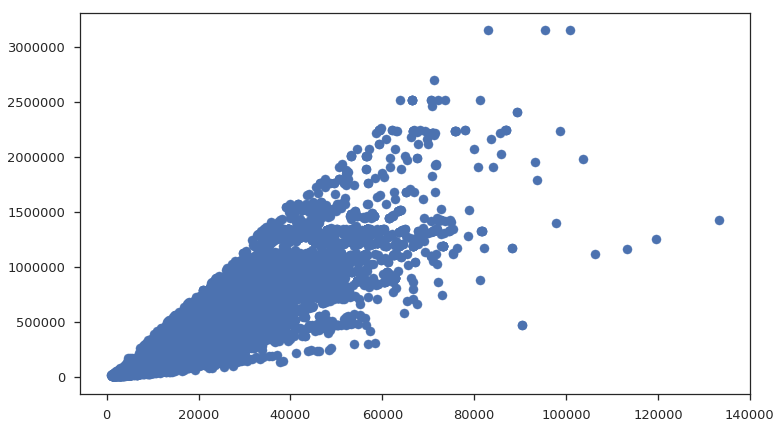

In [75]:
pos  = app_train.loc[app_train.TARGET == 1, ['SK_ID_CURR']]\
             .merge(prev_app.loc[mask, ['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_CREDIT']])

plt.figure(figsize=(12, 7))
plt.scatter(pos.AMT_ANNUITY, pos.AMT_CREDIT);

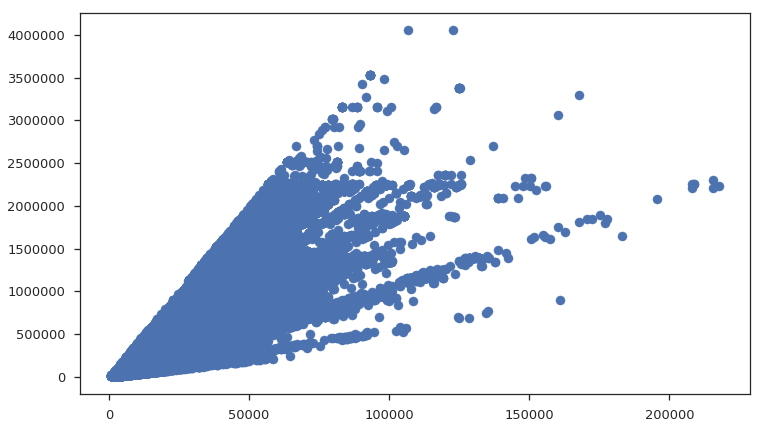

In [73]:
neg  = app_train.loc[app_train.TARGET == 0, ['SK_ID_CURR']]\
             .merge(prev_app.loc[mask, ['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_CREDIT']])

plt.figure(figsize=(12, 7))
plt.scatter(neg.AMT_ANNUITY, neg.AMT_CREDIT);

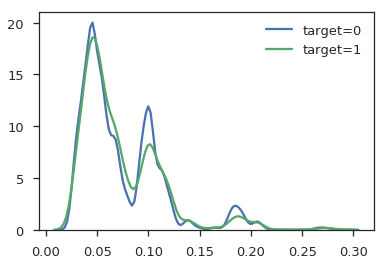

In [80]:
sns.kdeplot(neg.AMT_ANNUITY / neg.AMT_CREDIT, label='target=0')
sns.kdeplot(pos.AMT_ANNUITY / pos.AMT_CREDIT, label='target=1');

### Difference between actual and proposed termination

In [88]:
mask = (prev_app.DAYS_TERMINATION.notnull()) & (prev_app.DAYS_TERMINATION != 365243)

a = prev_app.loc[mask,'CNT_PAYMENT'] - (-prev_app.loc[mask, 'DAYS_DECISION'] / 30)
b = prev_app.loc[mask, 'DAYS_TERMINATION']

In [97]:
tmp = (a - b).groupby(prev_app.loc[mask, 'SK_ID_CURR']).mean()
tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.1316928500118695

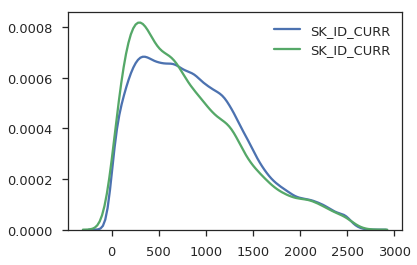

In [98]:
sns.kdeplot(tmp[app_train.TARGET == 0])
sns.kdeplot(tmp[app_train.TARGET == 1]);

### Relationship of Income Type and External Scores

In [12]:
app_train.groupby('NAME_INCOME_TYPE')['EXT_SOURCE_1'].mean()

NAME_INCOME_TYPE
Businessman             0.521973
Commercial associate    0.500488
Maternity leave         0.666016
Pensioner               0.692871
State servant           0.522949
Student                 0.420654
Unemployed              0.416748
Working                 0.466797
Name: EXT_SOURCE_1, dtype: float16

In [13]:
app_train.groupby('NAME_INCOME_TYPE')['EXT_SOURCE_2'].mean()

NAME_INCOME_TYPE
Businessman             0.666504
Commercial associate    0.541992
Maternity leave         0.512207
Pensioner               0.506348
State servant           0.534668
Student                 0.500000
Unemployed              0.459473
Working                 0.501953
Name: EXT_SOURCE_2, dtype: float16

In [14]:
app_train.groupby('NAME_INCOME_TYPE')['EXT_SOURCE_3'].mean()

NAME_INCOME_TYPE
Businessman             0.562988
Commercial associate    0.500000
Maternity leave              NaN
Pensioner               0.558594
State servant           0.514160
Student                 0.536621
Unemployed              0.463623
Working                 0.498535
Name: EXT_SOURCE_3, dtype: float16

### Family Type and Income Type with External Scores

In [10]:
fi1 = app_train.groupby(['NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE'], as_index=False)['EXT_SOURCE_1'].mean()
tr  = app_train.loc[:, ['NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'TARGET']].merge(fi1, how='left')
tr.loc[:, 'diff_ext_1'] = tr.EXT_SOURCE_1 - app_train.EXT_SOURCE_1
tr.loc[:, 'old_ext_1']  = app_train.EXT_SOURCE_1

tr.loc[:, ['diff_ext_1', 'old_ext_1','TARGET']].corr()

diff_ext_1  old_ext_1    TARGET
diff_ext_1    1.000000  -0.938910  0.148259
old_ext_1    -0.938910   1.000000 -0.155318
TARGET        0.148259  -0.155318  1.000000

### Family Type and Education Type with External Scores

In [23]:
fi1 = app_train.groupby(['NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE'], as_index=False)['EXT_SOURCE_1'].mean()
tr  = app_train.loc[:, ['NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'TARGET']].merge(fi1, how='left')
tr.loc[:, 'diff_ext_1'] = tr.EXT_SOURCE_1 - app_train.EXT_SOURCE_1
tr.loc[:, 'old_ext_1']  = app_train.EXT_SOURCE_1

tr.loc[:, ['diff_ext_1', 'old_ext_1', 'EXT_SOURCE_1','TARGET']].corr()

diff_ext_1  old_ext_1  EXT_SOURCE_1    TARGET
diff_ext_1      1.000000  -0.970578      0.000195  0.145976
old_ext_1      -0.970578   1.000000      0.240599 -0.155318
EXT_SOURCE_1    0.000195   0.240599      1.000000 -0.059651
TARGET          0.145976  -0.155318     -0.059651  1.000000

### Relationship between Family Type, Occupation Type with External Scores

In [5]:
fi1 = app_train.groupby(['NAME_FAMILY_STATUS', 'OCCUPATION_TYPE'], as_index=False)['EXT_SOURCE_1'].mean()
tr  = app_train.loc[:, ['NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'TARGET']].merge(fi1, how='left')
tr.loc[:, 'diff_ext_1'] = tr.EXT_SOURCE_1 - app_train.EXT_SOURCE_1
tr.loc[:, 'old_ext_1']  = app_train.EXT_SOURCE_1

tr.loc[:, ['diff_ext_1', 'old_ext_1', 'EXT_SOURCE_1','TARGET']].corr()

diff_ext_1  old_ext_1  EXT_SOURCE_1    TARGET
diff_ext_1      1.000000  -0.946498     -0.000057  0.138424
old_ext_1      -0.946498   1.000000      0.322763 -0.155318
EXT_SOURCE_1   -0.000057   0.322763      1.000000 -0.084490
TARGET          0.138424  -0.155318     -0.084490  1.000000

### Relationship between Family Type, Organization Type with External Scores

In [6]:
fi1 = app_train.groupby(['NAME_FAMILY_STATUS', 'ORGANIZATION_TYPE'], as_index=False)['EXT_SOURCE_1'].mean()
tr  = app_train.loc[:, ['NAME_FAMILY_STATUS', 'ORGANIZATION_TYPE', 'TARGET']].merge(fi1, how='left')
tr.loc[:, 'diff_ext_1'] = tr.EXT_SOURCE_1 - app_train.EXT_SOURCE_1
tr.loc[:, 'old_ext_1']  = app_train.EXT_SOURCE_1

tr.loc[:, ['diff_ext_1', 'old_ext_1', 'EXT_SOURCE_1','TARGET']].corr()

diff_ext_1  old_ext_1  EXT_SOURCE_1    TARGET
diff_ext_1      1.000000  -0.931584     -0.000235  0.148637
old_ext_1      -0.931584   1.000000      0.363745 -0.155318
EXT_SOURCE_1   -0.000235   0.363745      1.000000 -0.062510
TARGET          0.148637  -0.155318     -0.062510  1.000000

### Number of late days in installments

In [18]:
is_late = installments.DAYS_INSTALMENT < installments.DAYS_ENTRY_PAYMENT
is_late = is_late.groupby(installments.SK_ID_CURR).sum()
is_late = app_train.SK_ID_CURR.map(is_late)

is_late[is_late.isnull()].shape[0] / len(is_late)

0.051601406128561254

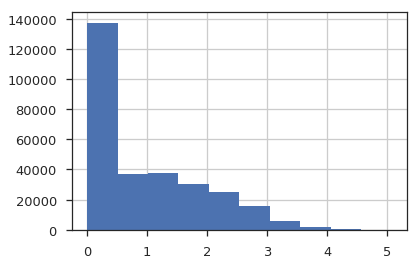

In [22]:
is_late.map(np.log1p).hist();

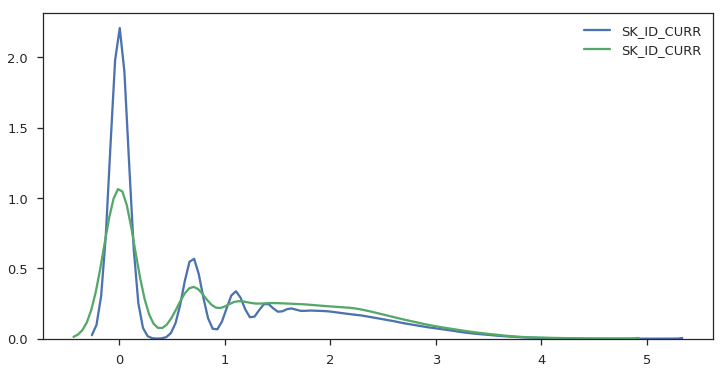

In [24]:
plt.figure(figsize=(12, 6))
sns.kdeplot(is_late[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(is_late[app_train.TARGET == 1].map(np.log1p));

### Total Amount Paid in Installments and compare it with credit

In [78]:
mask = prev_app.NAME_CONTRACT_STATUS == 'Approved'

x = prev_app.loc[mask, ['SK_ID_CURR', 'SK_ID_PREV', 'AMT_CREDIT']]\
        .merge(installments.loc[:, ['SK_ID_CURR', 'SK_ID_PREV', 'AMT_PAYMENT']])

x = x.groupby(['SK_ID_CURR', 'SK_ID_PREV'], as_index=False).agg({'AMT_CREDIT': np.mean,
                                                             'AMT_PAYMENT': np.sum
                                                            })

x.loc[:, 'diff_payment_credit'] = x.AMT_PAYMENT - x.AMT_CREDIT
x = x.groupby('SK_ID_CURR')['diff_payment_credit'].min()
x = app_train.SK_ID_CURR.map(x)

x[x.isnull()].shape[0] / len(x)

0.058875942649206044

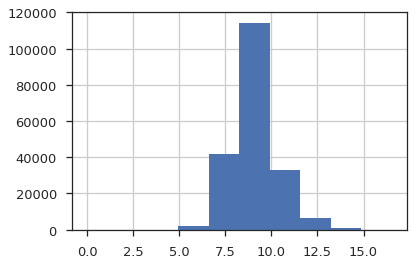

In [79]:
x.map(np.log1p).hist();

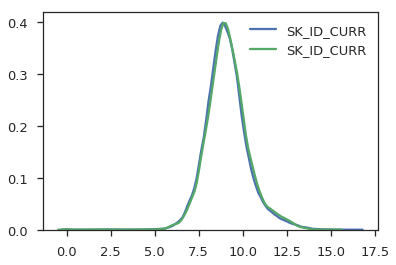

In [80]:
sns.kdeplot(x[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(x[app_train.TARGET == 1].map(np.log1p));

### Difference between current payment and length of installments

In [82]:
mask = prev_app.NAME_CONTRACT_STATUS == 'Approved'

x = prev_app.loc[mask].groupby(['SK_ID_CURR', 'SK_ID_PREV'], as_index=False)['CNT_PAYMENT'].sum()
inst_x = installments.groupby(['SK_ID_CURR', 'SK_ID_PREV']).size().reset_index().rename(columns={0: 'inst_size'})

SK_ID_CURR  SK_ID_PREV  inst_size
0      100001     1369693          4
1      100001     1851984          3
2      100002     1038818         19
3      100003     1810518          7
4      100003     2396755         12

In [83]:
y = x.merge(inst_x); y.head()

SK_ID_CURR  SK_ID_PREV  CNT_PAYMENT  inst_size
0      100001     1369693          8.0          4
1      100002     1038818         24.0         19
2      100003     1810518         12.0          7
3      100003     2396755         12.0         12
4      100003     2636178          6.0          6

In [84]:
y.loc[:, 'diff'] = y.CNT_PAYMENT - y.inst_size
tmp = y.groupby('SK_ID_CURR')['diff'].sum()
tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.058875942649206044

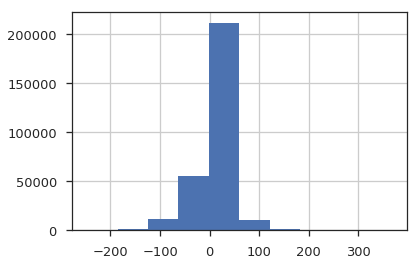

In [86]:
tmp.hist();

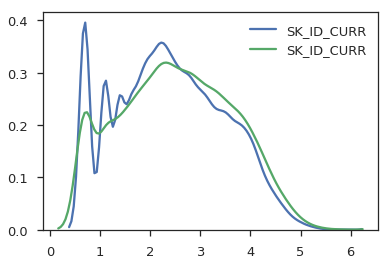

In [89]:
sns.kdeplot(tmp[(tmp > 0) & (app_train.TARGET == 0)].map(np.log1p))
sns.kdeplot(tmp[(tmp > 0) & (app_train.TARGET == 1)].map(np.log1p))

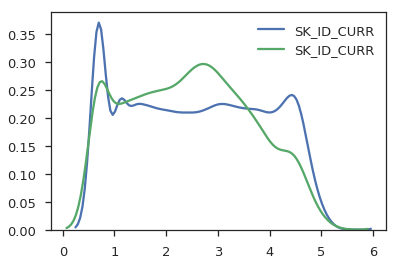

In [91]:
sns.kdeplot((-tmp[(tmp < 0) & (app_train.TARGET == 0)]).map(np.log1p))
sns.kdeplot((-tmp[(tmp < 0) & (app_train.TARGET == 1)]).map(np.log1p));

### Comparison of Bureau Credit History for Customers in training and test set.

In [6]:
bur_tr = bureau.loc[:, ['SK_ID_CURR', 'SK_ID_BUREAU']].merge(bureau_bal.loc[:, ['SK_ID_BUREAU']], how='inner')
bur_tr = bur_tr.groupby('SK_ID_CURR').size()

tr = app_train.SK_ID_CURR.map(bur_tr)
te = app_test.SK_ID_CURR.map(bur_tr)

del bur_tr
gc.collect();

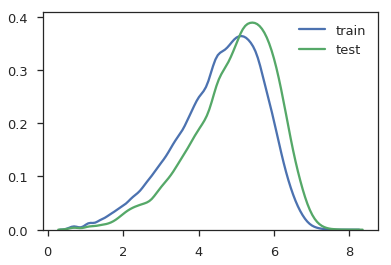

In [10]:
sns.kdeplot(tr.map(np.log1p), label='train')
sns.kdeplot(te.map(np.log1p), label='test');

### Comparison of previous home credits for customers in train and test

In [11]:
prev_app_tr = prev_app.groupby('SK_ID_CURR').size()
tr = app_train.SK_ID_CURR.map(prev_app_tr)
te = app_test.SK_ID_CURR.map(prev_app_tr)

del prev_app_tr
gc.collect();

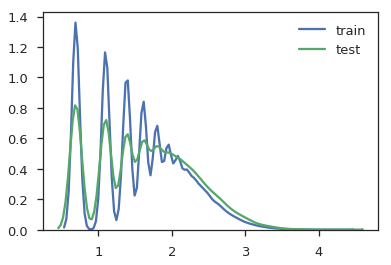

In [13]:
sns.kdeplot(tr.map(np.log1p), label='train')
sns.kdeplot(te.map(np.log1p), label='test');

### Relation between credit status and actual credit enddate for bureau

In [41]:
mask = (bureau.CREDIT_ACTIVE == 'Active') &\
       (bureau.DAYS_CREDIT_ENDDATE < 0)

num_ended_but_still_active = bureau.loc[mask].groupby('SK_ID_CURR').size()
num_ended_but_still_active = app_train.SK_ID_CURR.map(num_ended_but_still_active).fillna(0)

num_ended_but_still_active[num_ended_but_still_active.isnull()].shape[0] / len(num_ended_but_still_active)

0.0

### Relationship between total debt from bureau credits with age

In [66]:
mask = (bureau.CREDIT_ACTIVE == 'Active') & (bureau.DAYS_CREDIT_ENDDATE > 0)
total_debt_bureau   = bureau.loc[mask, :].groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()
total_credit_bureau = bureau.loc[mask, :].groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()

total_debt_bureau   = app_train.SK_ID_CURR.map(total_debt_bureau)
total_credit_bureau = app_train.SK_ID_CURR.map(total_credit_bureau) 

total_debt_bureau[total_debt_bureau.isnull()].shape[0] / len(total_debt_bureau)

0.40226203290288803

In [67]:
tmp = (total_debt_bureau / total_credit_bureau) * (-app_train.DAYS_BIRTH / 365)

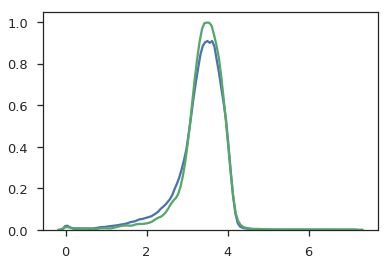

In [68]:
sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

### Relationship between age and external credit scores.

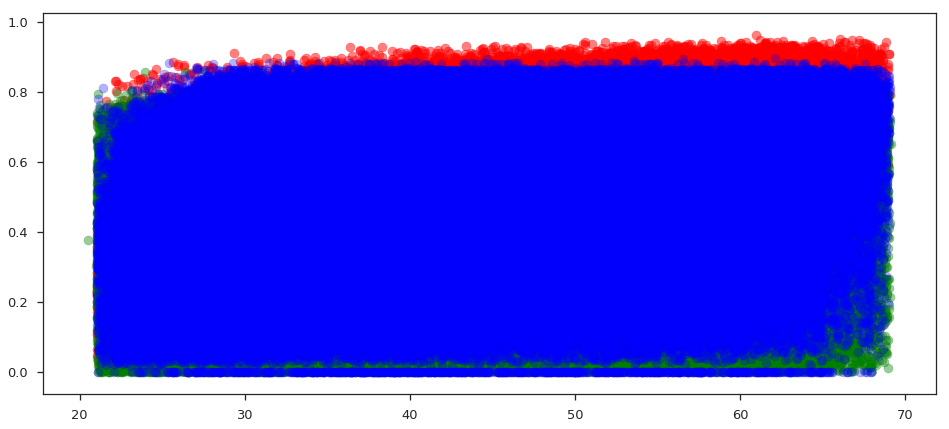

In [11]:
plt.figure(figsize=(16, 7))
plt.scatter(-app_train.DAYS_BIRTH / 365, app_train.EXT_SOURCE_1, c='r', alpha=.5)
plt.scatter(-app_train.DAYS_BIRTH / 365, app_train.EXT_SOURCE_2, c='g', alpha=.4)
plt.scatter(-app_train.DAYS_BIRTH / 365, app_train.EXT_SOURCE_3, c='b', alpha=.3);

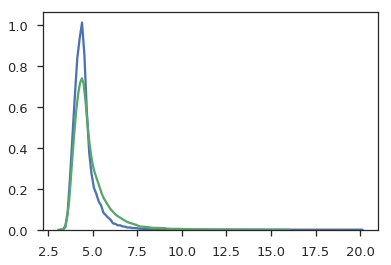

In [18]:
sns.kdeplot(((-app_train.DAYS_BIRTH / 365) / app_train.EXT_SOURCE_2)[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(((-app_train.DAYS_BIRTH / 365) / app_train.EXT_SOURCE_2)[app_train.TARGET == 1].map(np.log1p));

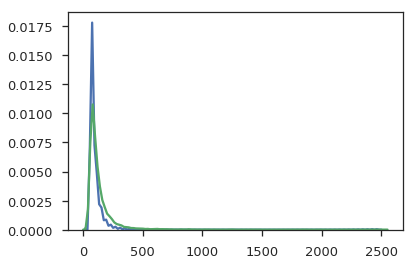

In [16]:
sns.kdeplot(((-app_train.DAYS_BIRTH / 365) / app_train.EXT_SOURCE_1)[app_train.TARGET == 0])
sns.kdeplot(((-app_train.DAYS_BIRTH / 365) / app_train.EXT_SOURCE_1)[app_train.TARGET == 1]);

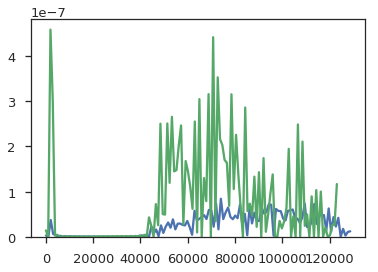

In [15]:
sns.kdeplot(((-app_train.DAYS_BIRTH / 365) / app_train.EXT_SOURCE_3)[app_train.TARGET == 0])
sns.kdeplot(((-app_train.DAYS_BIRTH / 365) / app_train.EXT_SOURCE_3)[app_train.TARGET == 1]);

### Relationship between enddate and employed since

In [22]:
x = bureau.loc[(bureau.CREDIT_ACTIVE == 'Active') & (bureau.DAYS_CREDIT_ENDDATE > 0)]
mean_enddate = x.groupby('SK_ID_CURR')['DAYS_CREDIT_ENDDATE'].sum()

mean_enddate = app_train.SK_ID_CURR.map(mean_enddate)
tmp  = mean_enddate / (-app_train.DAYS_EMPLOYED.replace({365243: np.nan}) / 365)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.4723603383293606

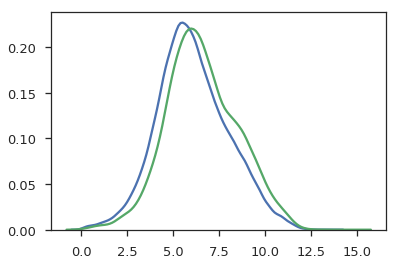

In [23]:
sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

### High Credit vs Low Credit Buyer Behavior

In [57]:
app_train.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.988308e+05
std      4.024795e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [69]:
# number of active bureau credits
mask = (bureau.CREDIT_ACTIVE == 'Active') & (bureau.DAYS_CREDIT_ENDDATE > 0)

total_credit = bureau.loc[mask, :].groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()

low_credit  = app_train.loc[app_train.AMT_CREDIT < 3e5, 'SK_ID_CURR'].map(total_credit)
high_credit = app_train.loc[app_train.AMT_CREDIT > 8e5, 'SK_ID_CURR'].map(total_credit) 

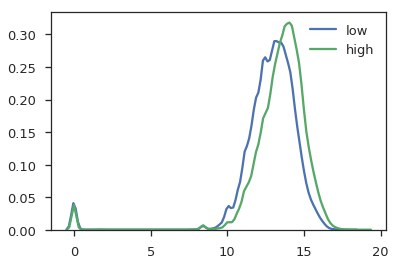

In [71]:
sns.kdeplot(low_credit.map(np.log1p), label='low')
sns.kdeplot(high_credit.map(np.log1p), label='high');

In [125]:
mask = (bureau.CREDIT_ACTIVE == 'Active') & (bureau.DAYS_CREDIT_ENDDATE > 0)

mean_credit = bureau.loc[mask, :].groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].min()
mean_credit = app_train.SK_ID_CURR.map(mean_credit)

mean_debt = bureau.loc[mask, :].groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].min()
mean_debt = app_train.SK_ID_CURR.map(mean_debt)

tmp         = (mean_debt / mean_credit) * (app_train.EXT_SOURCE_3)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.46191843543808186

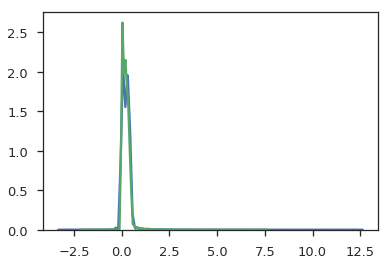

In [126]:
sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

### Analyze customers who have income type as pension

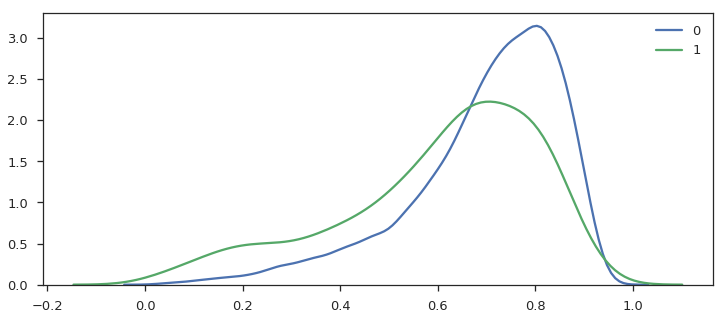

In [29]:
plt.figure(figsize=(12, 5))

mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 0), 'EXT_SOURCE_1'], label='0')
sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 1), 'EXT_SOURCE_1'], label='1');

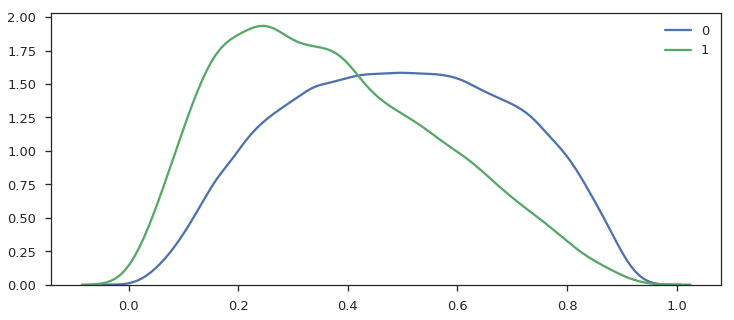

In [30]:
plt.figure(figsize=(12, 5))

mask = (app_train.NAME_INCOME_TYPE != 'Pensioner')

sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 0), 'EXT_SOURCE_1'], label='0')
sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 1), 'EXT_SOURCE_1'], label='1');

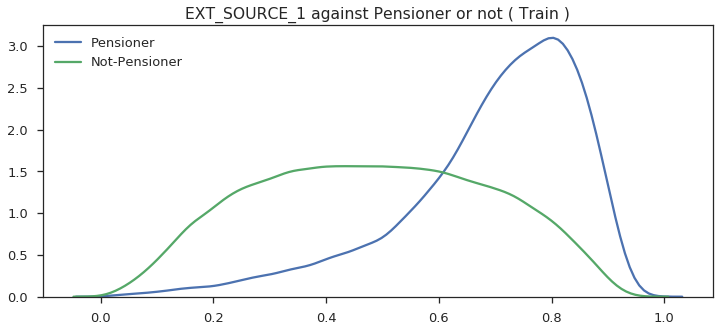

In [31]:
plt.figure(figsize=(12, 5))

mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

sns.kdeplot(app_train.loc[mask, 'EXT_SOURCE_1'], label='Pensioner')
sns.kdeplot(app_train.loc[~mask, 'EXT_SOURCE_1'], label='Not-Pensioner')
plt.title('EXT_SOURCE_1 against Pensioner or not ( Train )');

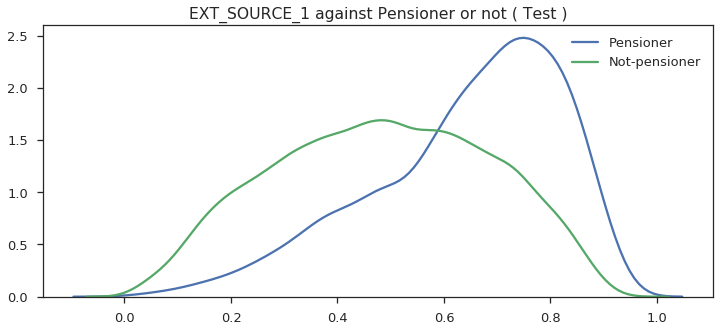

In [32]:
plt.figure(figsize=(12, 5))

mask = (app_test.NAME_INCOME_TYPE == 'Pensioner')

sns.kdeplot(app_test.loc[mask, 'EXT_SOURCE_1'], label='Pensioner')
sns.kdeplot(app_test.loc[~mask, 'EXT_SOURCE_1'], label='Not-pensioner')
plt.title('EXT_SOURCE_1 against Pensioner or not ( Test )');

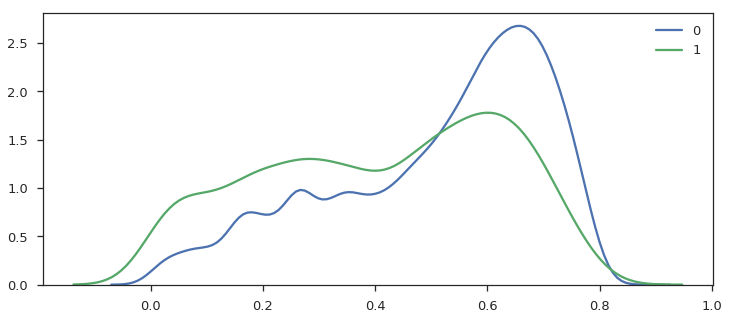

In [33]:
plt.figure(figsize=(12, 5))

mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 0), 'EXT_SOURCE_2'], label='0')
sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 1), 'EXT_SOURCE_2'], label='1');

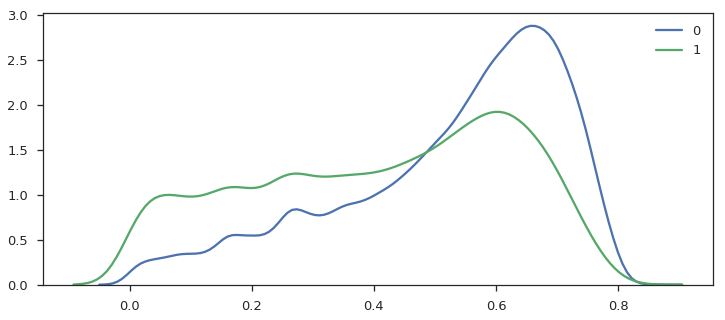

In [34]:
plt.figure(figsize=(12, 5))

mask = (app_train.NAME_INCOME_TYPE != 'Pensioner')

sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 0), 'EXT_SOURCE_2'], label='0')
sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 1), 'EXT_SOURCE_2'], label='1');

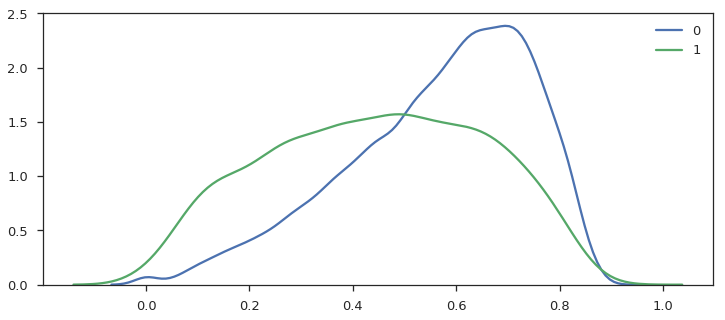

In [35]:
plt.figure(figsize=(12, 5))

mask = (app_train.NAME_INCOME_TYPE == 'Pensioner')

sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 0), 'EXT_SOURCE_3'], label='0')
sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 1), 'EXT_SOURCE_3'], label='1');

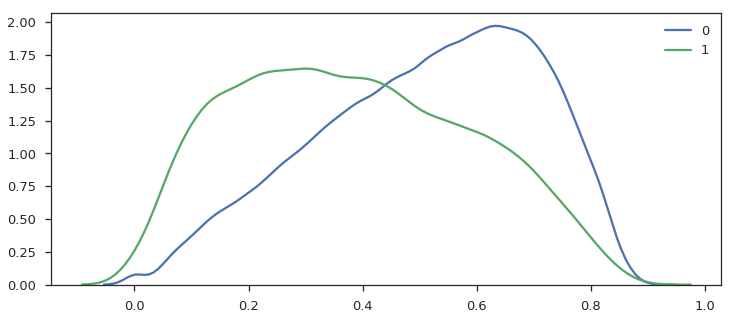

In [36]:
plt.figure(figsize=(12, 5))

mask = (app_train.NAME_INCOME_TYPE != 'Pensioner')

sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 0), 'EXT_SOURCE_3'], label='0')
sns.kdeplot(app_train.loc[mask & (app_train.TARGET == 1), 'EXT_SOURCE_3'], label='1');

In [47]:
app_train['EXT_SOURCE_1'].astype(np.float32).mean()

0.5021324753761292

In [48]:
app_train['EXT_SOURCE_2'].mean()

nan

In [50]:
m   = app_train.groupby('NAME_INCOME_TYPE')['EXT_SOURCE_1'].mean()
tmp = app_train.NAME_INCOME_TYPE.map(m)

tmp = tmp / app_train['EXT_SOURCE_1']
pd.DataFrame({'f': tmp, 't': app_train.TARGET}).corr()

f         t
f  1.000000  0.153676
t  0.153676  1.000000

In [63]:
m   = app_train.groupby('NAME_INCOME_TYPE')['EXT_SOURCE_1'].mean()
tmp = app_train.NAME_INCOME_TYPE.map(m)

tmp = tmp / app_train['EXT_SOURCE_1']
pd.DataFrame({'f': tmp, 'p': app_train.EXT_SOURCE_1, 't': app_train.TARGET}).corr()

f         p         t
f  1.000000 -0.666162  0.153676
p -0.666162  1.000000 -0.155318
t  0.153676 -0.155318  1.000000

In [56]:
app_train.loc[:, ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']].corr()

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3    TARGET
EXT_SOURCE_1      1.000000      0.213984      0.186842 -0.155318
EXT_SOURCE_2      0.213984      1.000000      0.109166 -0.160471
EXT_SOURCE_3      0.186842      0.109166      1.000000 -0.178918
TARGET           -0.155318     -0.160471     -0.178918  1.000000

### Geometric mean of external source

In [12]:
gm = np.power(app_train.EXT_SOURCE_1 * app_train.EXT_SOURCE_2 * app_train.EXT_SOURCE_3, 1 / 3)

gm12 = np.power(app_train.EXT_SOURCE_1 * app_train.EXT_SOURCE_2, 1 / 2)
gm23 = np.power(app_train.EXT_SOURCE_2 * app_train.EXT_SOURCE_3, 1 / 2)
gm13 = np.power(app_train.EXT_SOURCE_1 * app_train.EXT_SOURCE_3, 1 / 2)

x  = pd.DataFrame({'t': app_train.TARGET, 
                   'ext1': app_train.EXT_SOURCE_1,
                   'ext2': app_train.EXT_SOURCE_2,
                   'ext3': app_train.EXT_SOURCE_3,
                   'gm': gm,
                   'gm12': gm12,
                   'gm23': gm23,
                   'gm13': gm13
                  })
x.corr()

t      ext1      ext2      ext3        gm      gm12      gm23  \
t     1.000000 -0.155318 -0.160471 -0.178918 -0.232678 -0.193732 -0.218735   
ext1 -0.155318  1.000000  0.213984  0.186842  0.680340  0.790969  0.250154   
ext2 -0.160471  0.213984  1.000000  0.109166  0.627803  0.741936  0.729892   
ext3 -0.178918  0.186842  0.109166  1.000000  0.646311  0.194812  0.727326   
gm   -0.232678  0.680340  0.627803  0.646311  1.000000  0.855542  0.867111   
gm12 -0.193732  0.790969  0.741936  0.194812  0.855542  1.000000  0.603439   
gm23 -0.218735  0.250154  0.729892  0.727326  0.867111  0.603439  1.000000   
gm13 -0.210754  0.762603  0.205748  0.753814  0.874379  0.636283  0.650670   

          gm13  
t    -0.210754  
ext1  0.762603  
ext2  0.205748  
ext3  0.753814  
gm    0.874379  
gm12  0.636283  
gm23  0.650670  
gm13  1.000000

### Relationship between maximum and minimum installment during the course of payment for previous credit applications

In [107]:
max_installment = installments.groupby(['SK_ID_CURR', 'SK_ID_PREV'])['AMT_INSTALMENT'].max()
min_installment = installments.groupby(['SK_ID_CURR', 'SK_ID_PREV'])['AMT_INSTALMENT'].min()

ratio_max_min   = max_installment.divide(min_installment, fill_value=np.nan).replace([-np.inf, np.inf], np.nan)

In [117]:
tmp = ratio_max_min.reset_index()
tmp = tmp.groupby('SK_ID_CURR')['AMT_INSTALMENT'].sum()

tmp = app_train.SK_ID_CURR.map(tmp)
tmp[tmp.isnull()].shape[0] / len(tmp)

0.051601406128561254

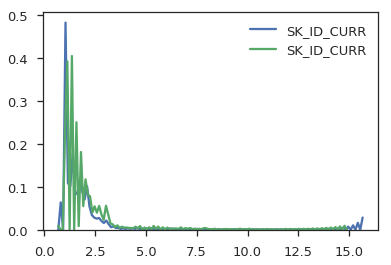

In [116]:
sns.kdeplot(tmp[(app_train.TARGET == 0)].map(np.log1p))
sns.kdeplot(tmp[(app_train.TARGET == 1)].map(np.log1p));

In [57]:
tmp[(app_train.TARGET == 0)].map(np.log1p).value_counts().iloc[:10]

0.000000    13862
4.879007      312
0.753772      161
0.431808      121
0.996934      119
0.460560      108
1.164736      107
0.732405      106
1.475907      105
0.488508      102
Name: SK_ID_CURR, dtype: int64

In [58]:
tmp[(app_train.TARGET == 1)].map(np.log1p).value_counts().iloc[:10]

0.000000    1516
4.879007      41
0.753772      25
0.774691      18
0.126426      18
0.980219      16
0.732405      15
0.795182      14
0.928327      14
0.203021      14
Name: SK_ID_CURR, dtype: int64

### Relationship between installment amount and credit amount

In [79]:
tmp = installments.groupby(['SK_ID_CURR', 'SK_ID_PREV'], as_index=False).agg({'AMT_INSTALMENT': [len, np.mean]})
tmp.columns = ['SK_ID_CURR', 'SK_ID_PREV', 'AMT_INSTALMENT_CNT', 'AMT_INSTALMENT_MEAN']

tmp = prev_app.loc[:, ['SK_ID_CURR', 'SK_ID_PREV', 'AMT_CREDIT', 'CNT_PAYMENT']]\
              .merge(tmp, how='inner'); tmp.head()

SK_ID_CURR  SK_ID_PREV  AMT_CREDIT  CNT_PAYMENT  AMT_INSTALMENT_CNT  \
0      271877     2030495     17145.0         12.0                 1.0   
1      108129     2802425    679671.0         36.0                 5.0   
2      122040     2523466    136444.5         12.0                 9.0   
3      176158     2819243    470790.0         12.0                11.0   
4      199383     1383531    340573.5         18.0                20.0   

   AMT_INSTALMENT_MEAN  
0         17284.275391  
1         25188.615234  
2         15060.735352  
3         51193.945312  
4         20966.644531

In [105]:
tmp.loc[:, 'ratio_credit_installment'] = tmp.AMT_CREDIT / (tmp.AMT_INSTALMENT_MEAN * tmp.AMT_INSTALMENT_CNT)
tmp.loc[:, 'diff_cnt_payment_actual']  = tmp.CNT_PAYMENT - tmp.AMT_INSTALMENT_CNT

# res = tmp.groupby('SK_ID_CURR')['ratio_credit_installment'].max()
res = tmp.groupby('SK_ID_CURR')['diff_cnt_payment_actual'].max()

res = app_train.SK_ID_CURR.map(res)
res[res.isnull()].shape[0] / len(res)

0.058875942649206044

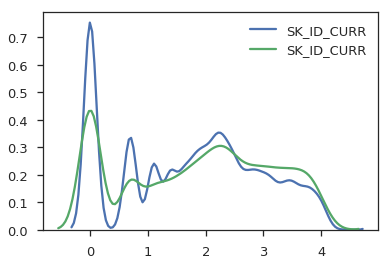

In [106]:
sns.kdeplot(res[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(res[app_train.TARGET == 1].map(np.log1p));

### Relationship between external scores and target variable

In [13]:
mask = (app_train.TARGET == 1) & (app_train.EXT_SOURCE_2 >= .6)

app_train.loc[mask, 'NAME_INCOME_TYPE'].value_counts(normalize=True)

Working                 0.555103
Commercial associate    0.264731
Pensioner               0.121583
State servant           0.058244
Unemployed              0.000340
Student                 0.000000
Maternity leave         0.000000
Businessman             0.000000
Name: NAME_INCOME_TYPE, dtype: float64

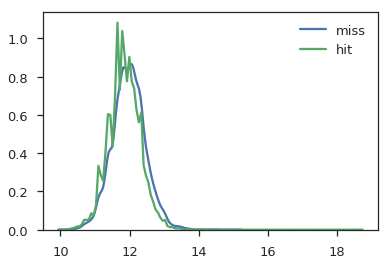

In [25]:
# income
sns.kdeplot(app_train.loc[(app_train.TARGET == 1) &\
                          (app_train.EXT_SOURCE_2 >= .6), 'AMT_INCOME_TOTAL'].map(np.log1p), label='miss')
sns.kdeplot(app_train.loc[(app_train.TARGET == 1) &\
                          (app_train.EXT_SOURCE_2 < .6), 'AMT_INCOME_TOTAL'].map(np.log1p), label='hit');

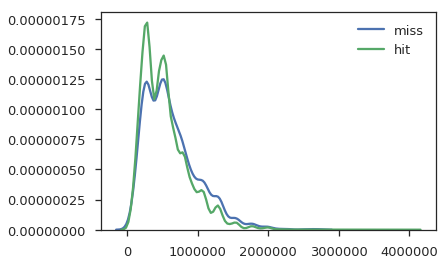

In [26]:
# credit
sns.kdeplot(app_train.loc[(app_train.TARGET == 1) &\
                          (app_train.EXT_SOURCE_2 >= .6), 'AMT_CREDIT'], label='miss')
sns.kdeplot(app_train.loc[(app_train.TARGET == 1) &\
                          (app_train.EXT_SOURCE_2 < .6), 'AMT_CREDIT'], label='hit');

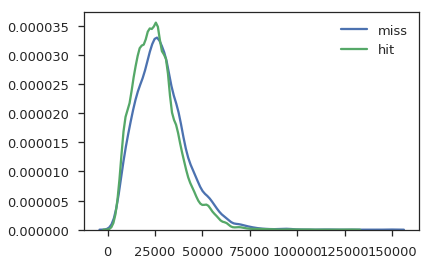

In [27]:
# annuity
sns.kdeplot(app_train.loc[(app_train.TARGET == 1) &\
                          (app_train.EXT_SOURCE_2 >= .6), 'AMT_ANNUITY'], label='miss')
sns.kdeplot(app_train.loc[(app_train.TARGET == 1) &\
                          (app_train.EXT_SOURCE_2 < .6), 'AMT_ANNUITY'], label='hit');

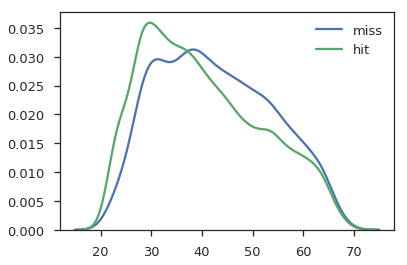

In [30]:
# age
sns.kdeplot(-app_train.loc[(app_train.TARGET == 1) &\
                          (app_train.EXT_SOURCE_2 >= .6), 'DAYS_BIRTH'] / 365, label='miss')
sns.kdeplot(-app_train.loc[(app_train.TARGET == 1) &\
                          (app_train.EXT_SOURCE_2 < .6), 'DAYS_BIRTH'] / 365, label='hit');

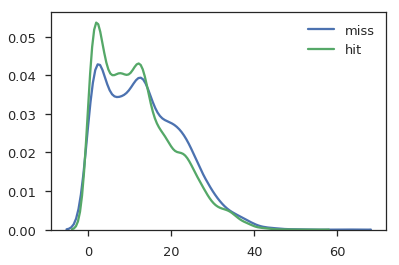

In [31]:
# days registration
sns.kdeplot(-app_train.loc[(app_train.TARGET == 1) &\
                          (app_train.EXT_SOURCE_2 >= .6), 'DAYS_REGISTRATION'] / 365, label='miss')
sns.kdeplot(-app_train.loc[(app_train.TARGET == 1) &\
                          (app_train.EXT_SOURCE_2 < .6), 'DAYS_REGISTRATION'] / 365, label='hit');

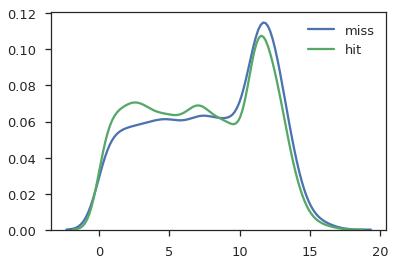

In [32]:
# days id publish
sns.kdeplot(-app_train.loc[(app_train.TARGET == 1) &\
                          (app_train.EXT_SOURCE_2 >= .6), 'DAYS_ID_PUBLISH'] / 365, label='miss')
sns.kdeplot(-app_train.loc[(app_train.TARGET == 1) &\
                          (app_train.EXT_SOURCE_2 < .6), 'DAYS_ID_PUBLISH'] / 365, label='hit');

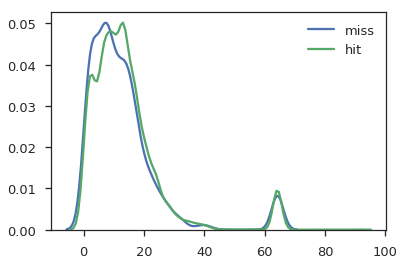

In [34]:
# car age
sns.kdeplot(app_train.loc[(app_train.TARGET == 1) &\
                          (app_train.EXT_SOURCE_2 >= .6), 'OWN_CAR_AGE'], label='miss')
sns.kdeplot(app_train.loc[(app_train.TARGET == 1) &\
                          (app_train.EXT_SOURCE_2 < .6), 'OWN_CAR_AGE'], label='hit');

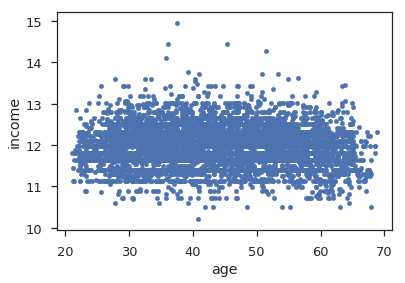

In [37]:
# age and income
x = app_train.loc[(app_train.TARGET == 1) &\
              (app_train.EXT_SOURCE_2 >= .6), ['DAYS_BIRTH', 'AMT_INCOME_TOTAL']]

x.loc[:, 'age']    = -x.DAYS_BIRTH / 365
x.loc[:, 'income'] = x.AMT_INCOME_TOTAL.map(np.log1p) 

x.loc[:, ['age', 'income']].plot.scatter(x='age', y='income');

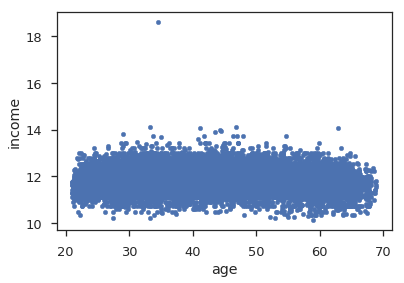

In [38]:
x = app_train.loc[(app_train.TARGET == 1) &\
              (app_train.EXT_SOURCE_2 < .6), ['DAYS_BIRTH', 'AMT_INCOME_TOTAL']]

x.loc[:, 'age']    = -x.DAYS_BIRTH / 365
x.loc[:, 'income'] = x.AMT_INCOME_TOTAL.map(np.log1p) 

x.loc[:, ['age', 'income']].plot.scatter(x='age', y='income');

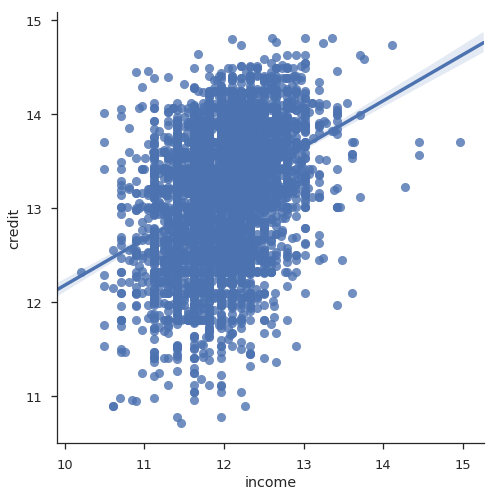

In [42]:
# credit and income

x = app_train.loc[(app_train.TARGET == 1) &\
              (app_train.EXT_SOURCE_2 >= .6), ['AMT_CREDIT', 'AMT_INCOME_TOTAL']]

x.loc[:, 'credit'] = x.AMT_CREDIT.map(np.log1p)
x.loc[:, 'income'] = x.AMT_INCOME_TOTAL.map(np.log1p)

sns.lmplot('income', 'credit', x, size=7);

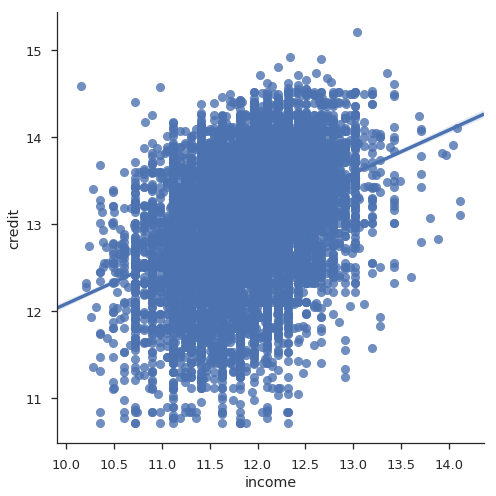

In [44]:
# credit and income

x = app_train.loc[(app_train.TARGET == 1) &\
              (app_train.EXT_SOURCE_2 < .6), ['AMT_CREDIT', 'AMT_INCOME_TOTAL']]

x.loc[:, 'credit'] = x.AMT_CREDIT.map(np.log1p)
x.loc[:, 'income'] = x.AMT_INCOME_TOTAL.map(np.log1p)

sns.lmplot('income', 'credit', x[x.income < 16], size=7);

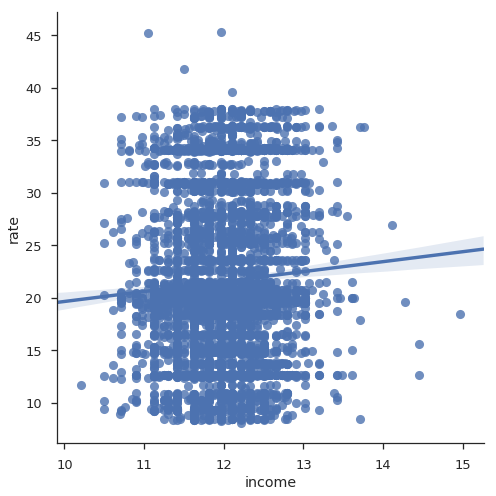

In [45]:
# rate and income

x = app_train.loc[(app_train.TARGET == 1) &\
              (app_train.EXT_SOURCE_2 >= .6), ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL']]

x.loc[:, 'rate']   = x.AMT_CREDIT / x.AMT_ANNUITY
x.loc[:, 'income'] = x.AMT_INCOME_TOTAL.map(np.log1p)

sns.lmplot('income', 'rate', x, size=7);

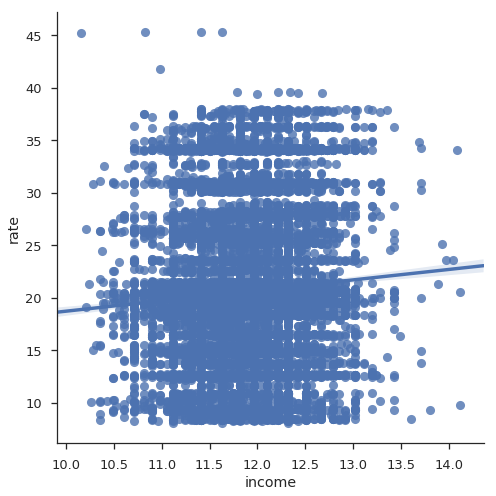

In [47]:
# rate and income

x = app_train.loc[(app_train.TARGET == 1) &\
              (app_train.EXT_SOURCE_2 < .6), ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL']]

x.loc[:, 'rate']   = x.AMT_CREDIT / x.AMT_ANNUITY
x.loc[:, 'income'] = x.AMT_INCOME_TOTAL.map(np.log1p)

sns.lmplot('income', 'rate', x[x.income < 16], size=7);

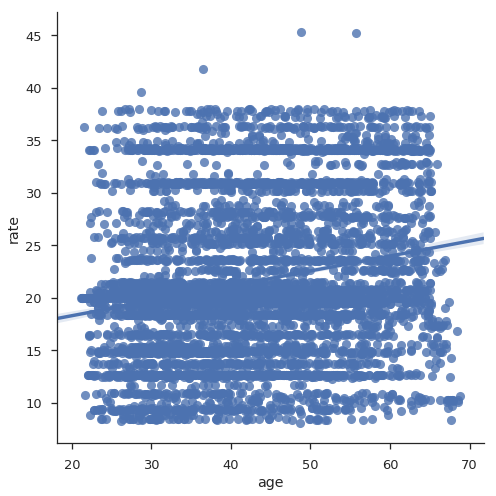

In [48]:
# rate and age

x = app_train.loc[(app_train.TARGET == 1) &\
              (app_train.EXT_SOURCE_2 >= .6), ['AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH']]

x.loc[:, 'rate']   = x.AMT_CREDIT / x.AMT_ANNUITY
x.loc[:, 'age']    = -x.DAYS_BIRTH /365

sns.lmplot('age', 'rate', x, size=7);

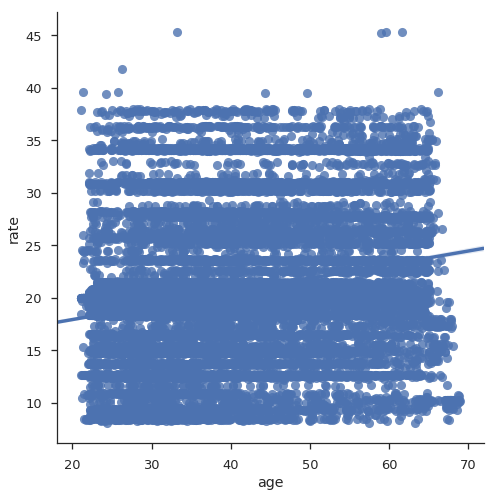

In [49]:
# rate and age

x = app_train.loc[(app_train.TARGET == 1) &\
              (app_train.EXT_SOURCE_2 < .6), ['AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH']]

x.loc[:, 'rate']   = x.AMT_CREDIT / x.AMT_ANNUITY
x.loc[:, 'age']    = -x.DAYS_BIRTH /365

sns.lmplot('age', 'rate', x, size=7);

### Previous Credit approval trends

In [101]:
def plot_prev_credit_durations(ax, x, SK_ID_CURR, target):    
    t = x[x.SK_ID_CURR == SK_ID_CURR].sort_values(by=['DAYS_DECISION'], ascending=False).loc[:, ['DAYS_DECISION', 'DAYS_TERMINATION']]
    t.index = np.arange(len(t))

    t.DAYS_DECISION.plot(ax=ax)
    t.DAYS_TERMINATION.plot(ax=ax)

In [114]:
x = app_train[app_train.TARGET == 1]\
             .merge(prev_app.loc[(prev_app.NAME_CONTRACT_STATUS == 'Approved') &\
                                 (prev_app.DAYS_TERMINATION.notnull()) &\
                                 (prev_app.DAYS_TERMINATION != 365243.0)
                                ], on='SK_ID_CURR', how='inner')

defaulters = x.sample(n=100, random_state=SEED).SK_ID_CURR.values
defaulters

array([414337, 254747, 305482, 248474, 338699, 425184, 262422, 288901,
       233073, 315795, 207431, 133627, 262624, 141992, 454431, 236647,
       450698, 105788, 166718, 257666, 425234, 189542, 247520, 236633,
       215572, 149261, 299444, 142122, 380089, 296640, 118362, 204089,
       279333, 348543, 226575, 312811, 177000, 413762, 331175, 131297,
       148234, 448592, 279057, 397196, 284289, 263049, 382547, 107128,
       171013, 340209, 361103, 346643, 329813, 444176, 326889, 133157,
       455330, 194311, 358356, 237919, 394102, 262223, 235315, 104989,
       263592, 252132, 293938, 249276, 287661, 222136, 330778, 355176,
       138005, 268670, 365296, 159109, 416181, 164338, 418553, 275063,
       301951, 444960, 193355, 211610, 436990, 424547, 290708, 265401,
       363442, 176647, 232261, 257351, 110614, 305073, 391238, 186146,
       214860, 105181, 396956, 137609], dtype=int32)

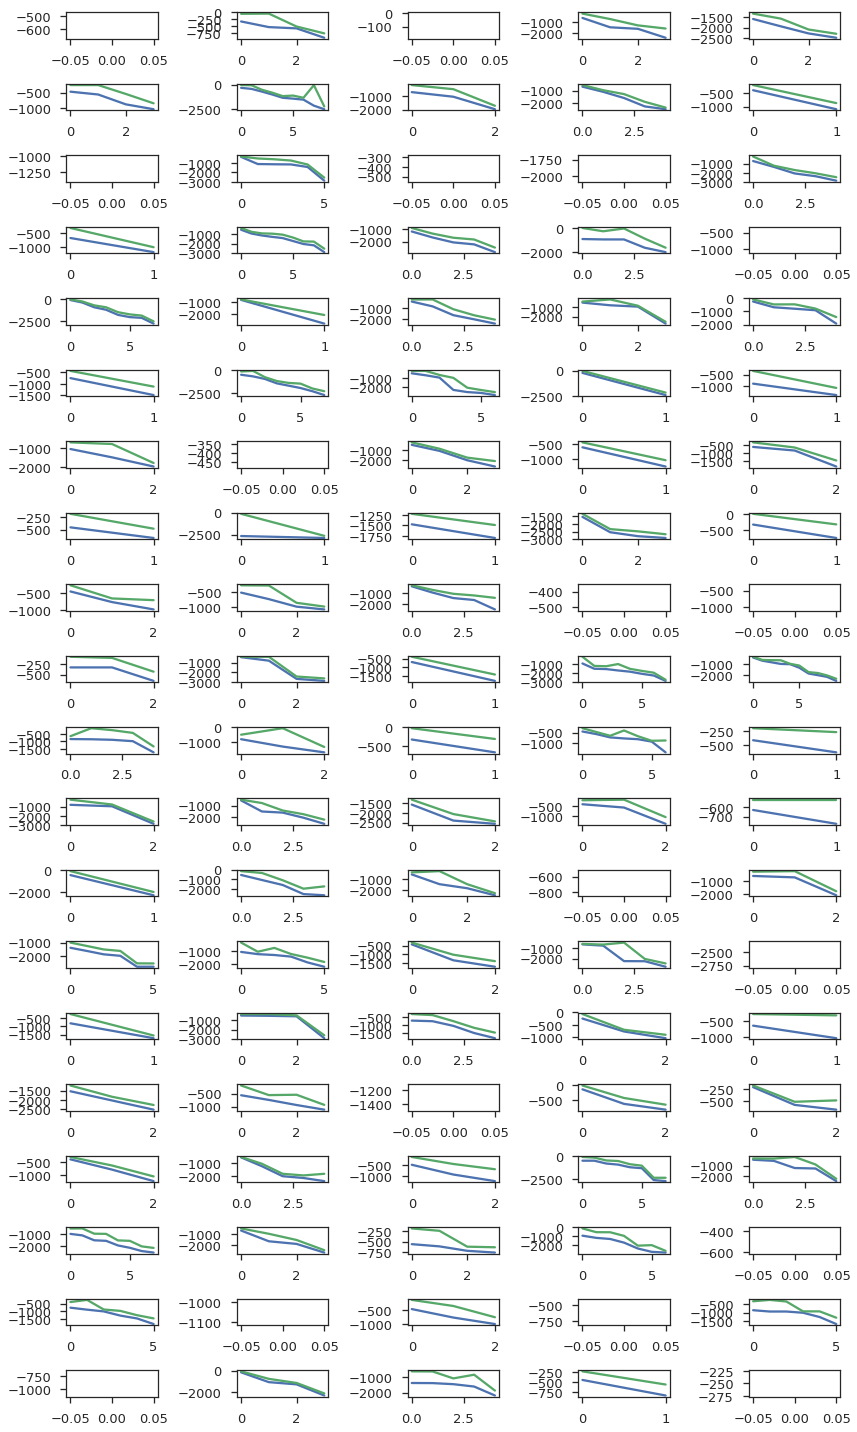

In [118]:
fig = plt.figure(figsize=(12, 20))

for i in range(1, 101):
    SK_ID_CURR = defaulters[i-1]
    ax = fig.add_subplot(20, 5, i)
    plot_prev_credit_durations(ax, x, SK_ID_CURR, 1)
    
plt.tight_layout();

In [119]:
x = app_train[app_train.TARGET == 0]\
             .merge(prev_app.loc[(prev_app.NAME_CONTRACT_STATUS == 'Approved') &\
                                 (prev_app.DAYS_TERMINATION.notnull()) &\
                                 (prev_app.DAYS_TERMINATION != 365243.0)
                                ], on='SK_ID_CURR', how='inner')

non_defaulters = x.sample(n=100, random_state=SEED).SK_ID_CURR.values
non_defaulters

array([163819, 369667, 126894, 383857, 219790, 207985, 407116, 454692,
       278177, 419518, 247037, 213467, 206144, 326788, 327437, 386423,
       221163, 357736, 408981, 314044, 297975, 298936, 130725, 219809,
       411670, 211033, 101893, 416732, 421181, 200232, 136896, 328525,
       315650, 366993, 343852, 247432, 239756, 355097, 154209, 363620,
       433378, 378185, 346579, 168643, 367737, 221077, 271437, 222364,
       383813, 157275, 273361, 412933, 172617, 214001, 333648, 223033,
       439691, 173111, 174706, 313118, 136007, 308759, 420226, 100135,
       381102, 220853, 148541, 296464, 217626, 243521, 208904, 116839,
       360121, 104415, 440527, 155065, 280427, 292024, 429132, 299688,
       277166, 255895, 281432, 205959, 358897, 135748, 416017, 251779,
       444422, 235387, 211664, 189459, 127540, 326718, 364406, 412025,
       447574, 354369, 238781, 142754], dtype=int32)

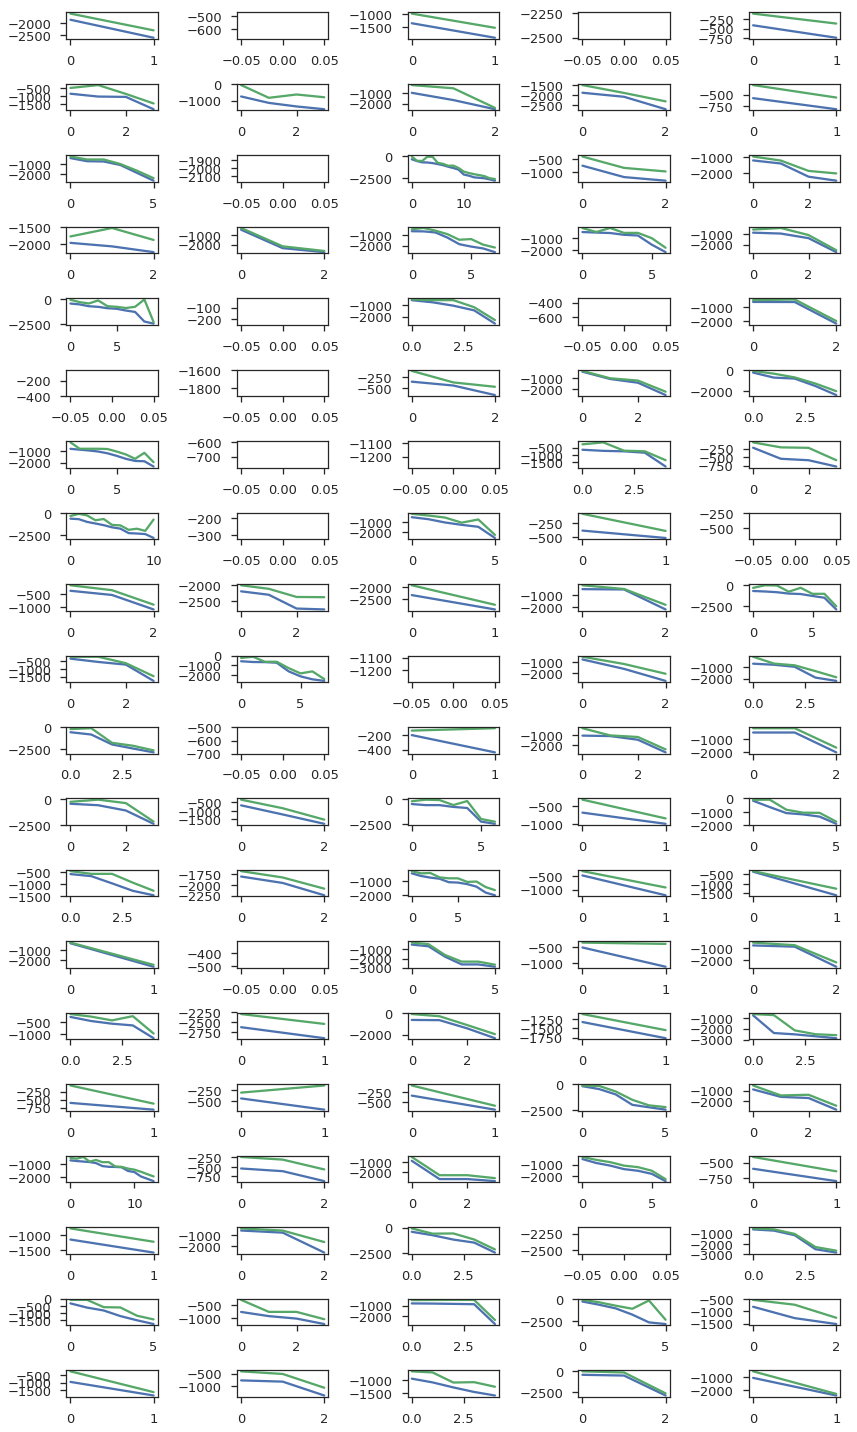

In [120]:
fig = plt.figure(figsize=(12, 20))


for i in range(1, 101):
    SK_ID_CURR = non_defaulters[i-1]
    ax = fig.add_subplot(20, 5, i)
    plot_prev_credit_durations(ax, x, SK_ID_CURR, 1)
    
plt.tight_layout();

In [136]:
# number of loans in last 6 months
last_6_months = prev_app.loc[(prev_app.NAME_CONTRACT_STATUS == 'Approved') &\
                             (prev_app.DAYS_DECISION >= -180)
                            ]

last_6_months = last_6_months.groupby('SK_ID_CURR').size()
last_6_months = app_train.SK_ID_CURR.map(last_6_months)

last_12_months = prev_app.loc[(prev_app.NAME_CONTRACT_STATUS == 'Approved') &\
                              (prev_app.DAYS_DECISION < -180) &\
                              (prev_app.DAYS_DECISION >= -365)
                            ]

last_12_months = last_12_months.groupby('SK_ID_CURR').size()
last_12_months = app_train.SK_ID_CURR.map(last_12_months)

last_18_months = prev_app.loc[(prev_app.NAME_CONTRACT_STATUS == 'Approved') &\
                              (prev_app.DAYS_DECISION < -365) &\
                              (prev_app.DAYS_DECISION >= -(540))
                            ]

last_18_months = last_18_months.groupby('SK_ID_CURR').size()
last_18_months = app_train.SK_ID_CURR.map(last_18_months)

In [140]:
x = app_train.loc[:, ['SK_ID_CURR', 'TARGET']]
x.loc[:, 'last_6_months']  = last_6_months
x.loc[:, 'last_12_months'] = last_12_months
x.loc[:, 'last_18_months'] = last_18_months

x.loc[:, 'ratio_6_12']     = last_6_months.divide(last_12_months, fill_value=np.nan)
x.loc[:, 'diff_6_12']      = last_12_months.subtract(last_6_months, fill_value=np.nan)

x.loc[:, 'ratio_12_18']     = last_12_months.divide(last_18_months, fill_value=np.nan)
x.loc[:, 'diff_12_18']      = last_18_months.subtract(last_12_months, fill_value=np.nan)

x.loc[:, 'payment_rate']    = app_train.AMT_ANNUITY / app_train.AMT_CREDIT

In [141]:
x.iloc[:, 1:].corr()

TARGET  last_6_months  last_12_months  last_18_months  \
TARGET          1.000000      -0.009930        0.004733        0.000559   
last_6_months  -0.009930       1.000000        0.002285        0.028475   
last_12_months  0.004733       0.002285        1.000000       -0.000202   
last_18_months  0.000559       0.028475       -0.000202        1.000000   
ratio_6_12     -0.019258       0.806779       -0.527738        0.039616   
diff_6_12       0.013447      -0.635615        0.770552       -0.026934   
ratio_12_18     0.004111      -0.008824        0.886734       -0.411480   
diff_12_18     -0.003800       0.024033       -0.780762        0.624986   
payment_rate    0.012704      -0.024426       -0.002268        0.027827   

                ratio_6_12  diff_6_12  ratio_12_18  diff_12_18  payment_rate  
TARGET           -0.019258   0.013447     0.004111   -0.003800      0.012704  
last_6_months     0.806779  -0.635615    -0.008824    0.024033     -0.024426  
last_12_months   -0.527738   0.770552     0.886734   -0.780762     -0.002268  
last_18_months    0.039616  -0.026934    -0.411480    0.624986      0.027827  
ratio_6_12        1.000000  -0.921642    -0.470082    0.425884     -0.013078  
diff_6_12        -0.921642   1.000000     0.690518   -0.612909      0.010362  
ratio_12_18      -0.470082   0.690518     1.000000   -0.949321     -0.006832  
diff_12_18        0.425884  -0.612909    -0.949321    1.000000      0.011452  
payment_rate     -0.013078   0.010362    -0.006832    0.011452      1.000000

In [24]:
# number of times 365243.0 is there in DAYS_TERMINATION column for approved loans

num_termination_nulls = prev_app.loc[(prev_app.DAYS_TERMINATION == 365243.0) &\
                                     (prev_app.NAME_CONTRACT_STATUS == 'Approved')]\
                                .groupby('SK_ID_CURR').size()

num_termination_nulls = app_train.SK_ID_CURR.map(num_termination_nulls)
num_termination_nulls[num_termination_nulls.isnull()].shape[0] / len(num_termination_nulls)

0.5124271977262602

In [28]:
ss = pd.crosstab(num_termination_nulls, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss)

TARGET         0.0   1.0     ratio
SK_ID_CURR                        
1.0         101555  9138  0.082553
2.0          31854  2924  0.084076
3.0           3724   380  0.092593
4.0            307    49  0.137640
5.0              3     0  0.000000


### Differences between train and test set.

```
Experiment ideas

1. Look at the most recent status for bureau credit for train and test set.
    - We can find it using bureau balance table.
```

In [12]:
train_sample = app_train
test_sample  = app_test

In [13]:
# number of bureau credits for all of the customers in
# the train set.

train_bureau = train_sample.loc[:, ['SK_ID_CURR', 'TARGET']]\
                           .merge(bureau.loc[:, ['SK_ID_CURR',
                                  'SK_ID_BUREAU'
                                 ]], on='SK_ID_CURR', how='left')

train_bureau.head()

SK_ID_CURR  TARGET  SK_ID_BUREAU
0      100002     1.0     6158904.0
1      100002     1.0     6158905.0
2      100002     1.0     6158906.0
3      100002     1.0     6158907.0
4      100002     1.0     6158908.0

In [14]:
test_bureau = test_sample.loc[:, ['SK_ID_CURR']]\
                           .merge(bureau.loc[:, ['SK_ID_CURR',
                                  'SK_ID_BUREAU'
                                 ]], on='SK_ID_CURR', how='left')

test_bureau.head()

SK_ID_CURR  SK_ID_BUREAU
0      100001     5896630.0
1      100001     5896631.0
2      100001     5896632.0
3      100001     5896633.0
4      100001     5896634.0

In [15]:
# for every bureau balance entry find the most recent status
most_recent_status = bureau_bal.groupby('SK_ID_BUREAU', as_index=False)['MONTHS_BALANCE'].max()
bureau_bal_recent  = bureau_bal.merge(most_recent_status, on=['SK_ID_BUREAU', 'MONTHS_BALANCE'], how='inner')

print(bureau_bal.shape[0], ' ', bureau_bal_recent.shape[0])

27299925   817395


In [16]:
# let's find out most recent credit of the bureau balance
train_bureau_bal = train_bureau.merge(bureau_bal_recent, on='SK_ID_BUREAU', how='left')

train_bureau_bal.head()

SK_ID_CURR  TARGET  SK_ID_BUREAU  MONTHS_BALANCE STATUS
0      100002     1.0     6158904.0           -15.0      C
1      100002     1.0     6158905.0             0.0      C
2      100002     1.0     6158906.0           -32.0      C
3      100002     1.0     6158907.0           -21.0      C
4      100002     1.0     6158908.0           -18.0      0

In [17]:
test_bureau_bal = test_bureau.merge(bureau_bal_recent, on='SK_ID_BUREAU', how='left')
test_bureau_bal.head()

SK_ID_CURR  SK_ID_BUREAU  MONTHS_BALANCE STATUS
0      100001     5896630.0             0.0      C
1      100001     5896631.0             0.0      C
2      100001     5896632.0             0.0      C
3      100001     5896633.0             0.0      C
4      100001     5896634.0             0.0      1

In [18]:
train_bureau_bal.STATUS.value_counts(dropna=False)

NaN    985830
C      278937
X      127153
0      111872
1        4106
5        1043
2         262
3          80
4          62
Name: STATUS, dtype: int64

In [19]:
test_bureau_bal.STATUS.value_counts(dropna=False)

C      138454
X       66692
0       43900
NaN      6688
1        1616
5         149
2          22
3           6
4           0
Name: STATUS, dtype: int64

** Most of the entries in the test sample have 0 or X as the most recent status reported by the Bureau for most of their credits. **

As a followup investigation let's look whether NaN in most recent status has any effect on target variable or not.

In [154]:
num_nulls_train = train_bureau_bal.STATUS.isnull().astype(np.uint8)
num_nulls_train = num_nulls_train.groupby(train_bureau_bal.SK_ID_CURR).sum()
total_size      = train_bureau_bal.groupby('SK_ID_CURR').size()

ratio_nulls     = num_nulls_train / total_size

ratio_nulls = train_sample.SK_ID_CURR.map(ratio_nulls)

y = train_bureau_bal.groupby('SK_ID_CURR')['TARGET'].mean()
y = train_sample.SK_ID_CURR.map(y)

In [155]:
pd.crosstab(ratio_nulls.values, y.values)

col_0        0.0    1.0
row_0                  
0.000000   84563   7465
0.016393       1      0
0.018182       0      1
0.031250       1      0
0.034483       1      0
0.038462       3      0
0.040000       0      1
0.043478       1      1
0.045455       0      2
0.047619       2      1
0.050000       2      0
0.052632       5      0
0.055556       5      0
0.058824       5      0
0.062500       1      2
0.066667       6      1
0.071429       4      3
0.074074       0      1
0.076923       4      2
0.083333      11      1
0.090909       8      2
0.095238       1      0
0.100000       5      0
0.111111       7      3
0.125000      10      3
0.133333       0      1
0.136364       0      1
0.142857      11      3
0.166667       8      2
0.187500       1      0
0.200000      12      2
0.250000       8      3
0.266667       1      0
0.300000       1      0
0.333333      11      4
0.363636       1      0
0.400000       1      0
0.428571       2      1
0.444444       1      0
0.489362       0      1
0.500000      11      2
0.555556       2      0
0.600000       1      0
0.666667       1      0
0.777778       0      1
0.875000       1      0
0.964286       1      0
1.000000  197965  17315

In [91]:
7465 / 84563, 17315 / 197965

(0.08827737899554179, 0.08746495592655268)

We couldn't find any evidence that suggests that ratio of nulls has any predictive power.

```
Let's look at count distribution of most recent status and see if it has any predictive power.
```

In [21]:
# train_bureau_bal.loc[:, 'STATUS']  = train_bureau_bal.STATUS.cat.codes.astype(np.str)
train_bureau_bal.loc[:, 'STATUS']  = train_bureau_bal.STATUS.fillna('missing')

In [23]:
ss.columns

Index(['-1', '0', '1', '2', '3', '4', '5', '6', '7'], dtype='object', name='STATUS')

In [24]:
train_bureau_bal.STATUS.value_counts()

-1    985830
6     278937
7     127153
0     111872
1       4106
5       1043
2        262
3         80
4         62
Name: STATUS, dtype: int64

In [22]:
ss = train_bureau_bal.groupby(['SK_ID_CURR', 'STATUS']).size().unstack().fillna(0)
ss
# ss.loc[:, 'ratio_C_X'] = (ss['C'] + ss['X']) / ss['nan']

# tmp = train_sample.SK_ID_CURR.map(ss.ratio_C_X)
# tmp[tmp.isnull()].shape[0] / len(tmp)

STATUS        -1    0    1    2    3    4    5     6    7
SK_ID_CURR                                               
100002       0.0  2.0  0.0  0.0  0.0  0.0  0.0   6.0  0.0
100003       4.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100004       2.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100006       1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100007       1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100008       3.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100009      18.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100010       0.0  0.0  0.0  0.0  0.0  0.0  0.0   2.0  0.0
100011       4.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100012       1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100014       8.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100015       4.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100016       7.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100017       6.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100018       1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100019       0.0  2.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100020       4.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100021       1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100022       2.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100023      13.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100024       1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100025       1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100026       3.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100027       3.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100029       4.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100030       6.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100031       7.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
100032       0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  4.0
100033       0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  1.0
100034       1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
...          ...  ...  ...  ...  ...  ...  ...   ...  ...
456225       0.0  0.0  0.0  0.0  0.0  0.0  0.0   3.0  6.0
456226       0.0  2.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456227       4.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456228       1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456229       1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456230       0.0  5.0  0.0  0.0  0.0  0.0  0.0   7.0  0.0
456231       0.0  1.0  0.0  0.0  0.0  0.0  0.0   5.0  1.0
456232       2.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456233       0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456234       0.0  0.0  1.0  0.0  0.0  0.0  0.0   8.0  1.0
456235       0.0  0.0  0.0  0.0  0.0  0.0  0.0   3.0  0.0
456236      13.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456237       1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456238       0.0  0.0  0.0  0.0  0.0  0.0  0.0   6.0  0.0
456239      11.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456240       2.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456241       5.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456242       0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456243       7.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456244       0.0  1.0  0.0  0.0  0.0  0.0  0.0  21.0  1.0
456245       1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456246       3.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456247       0.0  2.0  0.0  0.0  0.0  0.0  0.0   9.0  0.0
456248       1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456249      13.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456251       1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456252       1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0
456253       0.0  0.0  0.0  0.0  0.0  0.0  0.0   3.0  1.0
456254       0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0  0.0
456255       0.0  0.0  0.0  0.0  0.0  0.0  0.0  11.0  0.0

[307511 rows x 9 columns]

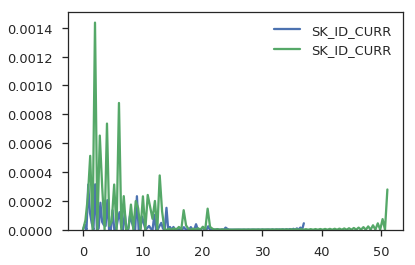

In [158]:
sns.kdeplot(tmp[train_sample.TARGET == 0])
sns.kdeplot(tmp[train_sample.TARGET == 1]);

In [159]:
tmp[train_sample.TARGET == 1].value_counts(dropna=False, normalize=True).iloc[:10]

 0.000000     0.697603
 inf          0.273152
NaN           0.027553
 2.000000     0.000242
 3.000000     0.000201
 6.000000     0.000161
 4.000000     0.000161
 1.000000     0.000121
 13.000000    0.000121
 11.000000    0.000081
Name: SK_ID_CURR, dtype: float64

In [160]:
tmp[train_sample.TARGET == 0].value_counts(dropna=False, normalize=True).iloc[:10]

 0.000000    0.700339
 inf         0.278242
NaN          0.020900
 1.000000    0.000067
 2.000000    0.000050
 3.000000    0.000042
 4.000000    0.000042
 9.000000    0.000035
 6.000000    0.000035
 8.000000    0.000028
Name: SK_ID_CURR, dtype: float64

In [11]:
bureau_bal.STATUS.value_counts(dropna=False)

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [10]:
bureau_bal.STATUS.cat.codes.value_counts(dropna=False)

6    13646993
0     7499507
7     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
dtype: int64

### Distribution of days of approval of previous home credits in training and test set.

In [6]:
prev_app.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [16]:
def get_by_status(status):
    mask = prev_app.NAME_CONTRACT_STATUS == status

    tr_approved = app_train.loc[:, ['SK_ID_CURR']]\
                           .merge(prev_app.loc[mask, ['SK_ID_CURR', 'SK_ID_PREV', 'DAYS_DECISION']], 
                                  on='SK_ID_CURR',
                                  how='left'
                                 )

    te_approved = app_test.loc[:, ['SK_ID_CURR']]\
                           .merge(prev_app.loc[mask, ['SK_ID_CURR', 'SK_ID_PREV', 'DAYS_DECISION']], 
                                  on='SK_ID_CURR',
                                  how='left'
                                 )
    return tr_approved, te_approved

In [17]:
tr_approved, te_approved = get_by_status('Approved')

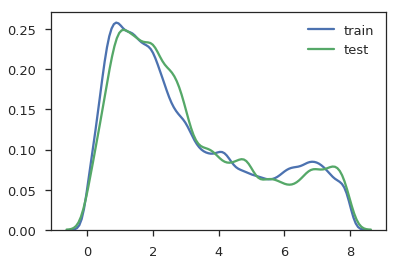

In [18]:
sns.kdeplot(-tr_approved.DAYS_DECISION / 365, label='train')
sns.kdeplot(-te_approved.DAYS_DECISION / 365, label='test');

In [19]:
tr_approved, te_approved = get_by_status('Canceled')

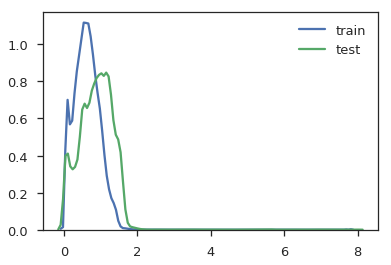

In [20]:
sns.kdeplot(-tr_approved.DAYS_DECISION / 365, label='train')
sns.kdeplot(-te_approved.DAYS_DECISION / 365, label='test');

In [21]:
tr_approved, te_approved = get_by_status('Refused')

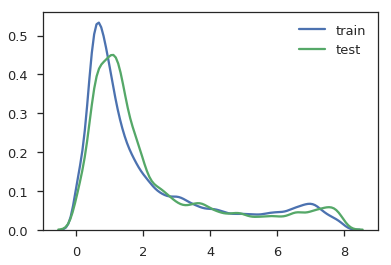

In [22]:
sns.kdeplot(-tr_approved.DAYS_DECISION / 365, label='train')
sns.kdeplot(-te_approved.DAYS_DECISION / 365, label='test');

In [23]:
tr_approved, te_approved = get_by_status('Unused offer')

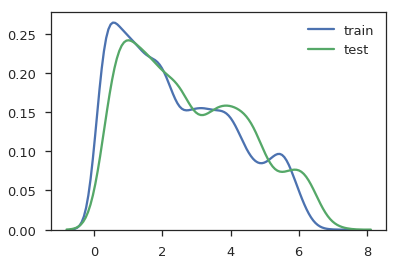

In [24]:
sns.kdeplot(-tr_approved.DAYS_DECISION / 365, label='train')
sns.kdeplot(-te_approved.DAYS_DECISION / 365, label='test');

### Distribution of count of previously approved home credit loans in 30, 60, 90 and 180 days

In [31]:
mask = prev_app.NAME_CONTRACT_STATUS == 'Approved'

x    = prev_app.loc[mask, ['SK_ID_CURR', 'SK_ID_PREV', 'DAYS_DECISION']]

x.loc[:, 'le_30']  = (x.DAYS_DECISION >= -30).astype(np.uint8)
x.loc[:, 'le_60']  = (x.DAYS_DECISION >= -60).astype(np.uint8)
x.loc[:, 'le_90']  = (x.DAYS_DECISION >= -90).astype(np.uint8)
x.loc[:, 'le_180'] = (x.DAYS_DECISION >= -180).astype(np.uint8)

le_30  = x.groupby('SK_ID_CURR')['le_30'].sum()
le_60  = x.groupby('SK_ID_CURR')['le_60'].sum()
le_90  = x.groupby('SK_ID_CURR')['le_90'].sum()
le_180 = x.groupby('SK_ID_CURR')['le_180'].sum()

In [29]:
le_30.value_counts()

0    329897
1      7259
2       518
3        23
4         1
Name: le_30, dtype: int64

In [32]:
le_60.value_counts()

0    322912
1     13594
2      1129
3        60
4         2
5         1
Name: le_60, dtype: int64

In [33]:
le_90.value_counts()

0    315650
1     19964
2      1955
3       120
4         6
5         3
Name: le_90, dtype: int64

In [34]:
le_180.value_counts()

0    284088
1     45094
2      7628
3       786
4        86
5        14
6         2
Name: le_180, dtype: int64

In [35]:
le_30  = app_train.SK_ID_CURR.map(le_30)
le_60  = app_train.SK_ID_CURR.map(le_60)
le_90  = app_train.SK_ID_CURR.map(le_90)
le_180 = app_train.SK_ID_CURR.map(le_180)

In [46]:
ss = pd.crosstab(((le_30 == 0) & (le_60 == 0) & (le_90 == 0) & (le_180 == 0)).astype(np.str),
            app_train.TARGET
           )

ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss.sort_values(by=1.0, ascending=False))

TARGET         0.0    1.0     ratio
SK_ID_CURR                         
True        223231  19966  0.082098
False        59455   4859  0.075551


### Relationship between approval date and date of completion of credit.

In [95]:
mask = (prev_app.DAYS_TERMINATION.notnull()) & (prev_app.DAYS_TERMINATION != 365243.0)

x    = app_train.loc[:, ['SK_ID_CURR', 'TARGET']]\
         .merge(prev_app.loc[mask, ['SK_ID_CURR', 'SK_ID_PREV', 'DAYS_DECISION', 'DAYS_TERMINATION']], 
                on='SK_ID_CURR',
                how='left'
               )

t    = app_test.loc[:, ['SK_ID_CURR']]\
         .merge(prev_app.loc[mask, ['SK_ID_CURR', 'SK_ID_PREV', 'DAYS_DECISION', 'DAYS_TERMINATION']], 
                on='SK_ID_CURR',
                how='left'
               )

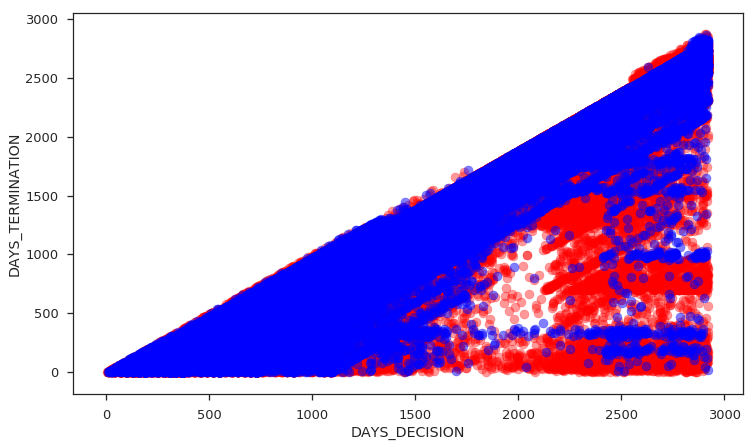

In [98]:
plt.figure(figsize=(12, 7))

plt.scatter(-x.DAYS_DECISION, -x.DAYS_TERMINATION, c='r', alpha=.4, label='Train')
plt.scatter(-t.DAYS_DECISION, -t.DAYS_TERMINATION, c='b', alpha=.5, label='Test')

plt.xlabel('DAYS_DECISION')
plt.ylabel('DAYS_TERMINATION');

In [117]:
mask = (bureau.CREDIT_ACTIVE == 'Active') & (bureau.DAYS_CREDIT_ENDDATE > 0)

x    = app_train.loc[:, ['SK_ID_CURR', 'TARGET']]\
         .merge(bureau.loc[mask, ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE']], 
                on='SK_ID_CURR',
                how='left'
               )

t    = app_test.loc[:, ['SK_ID_CURR']]\
         .merge(bureau.loc[mask, ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE']], 
                on='SK_ID_CURR',
                how='left'
               )

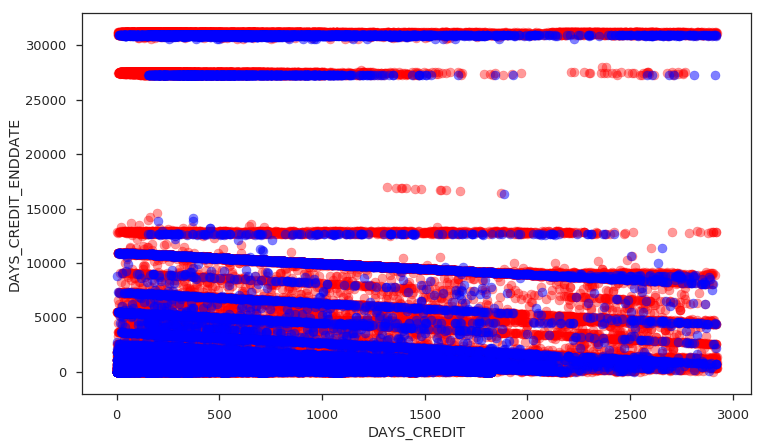

In [119]:
plt.figure(figsize=(12, 7))

plt.scatter(-x.DAYS_CREDIT, x.DAYS_CREDIT_ENDDATE, c='r', alpha=.4, label='Train')
plt.scatter(-t.DAYS_CREDIT, t.DAYS_CREDIT_ENDDATE, c='b', alpha=.5, label='Test')

plt.xlabel('DAYS_CREDIT')
plt.ylabel('DAYS_CREDIT_ENDDATE');

In [120]:
mask = (bureau.CREDIT_ACTIVE == 'Active') & (bureau.DAYS_CREDIT_ENDDATE < 0)

x    = app_train.loc[:, ['SK_ID_CURR', 'TARGET']]\
         .merge(bureau.loc[mask, ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE']], 
                on='SK_ID_CURR',
                how='left'
               )

t    = app_test.loc[:, ['SK_ID_CURR']]\
         .merge(bureau.loc[mask, ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE']], 
                on='SK_ID_CURR',
                how='left'
               )

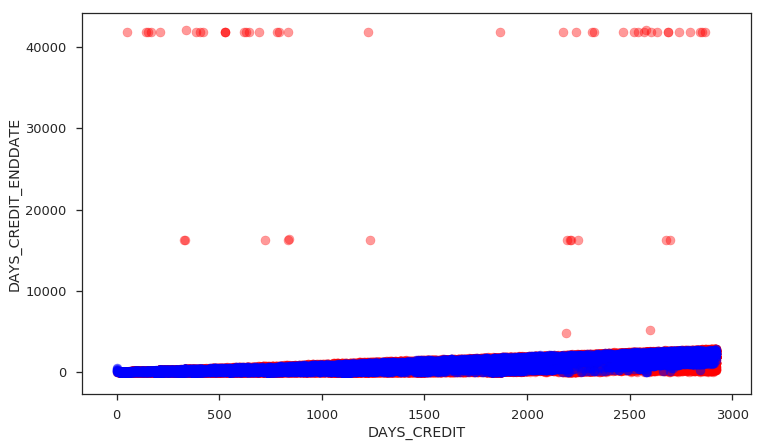

In [121]:
plt.figure(figsize=(12, 7))

plt.scatter(-x.DAYS_CREDIT, -x.DAYS_CREDIT_ENDDATE, c='r', alpha=.4, label='Train')
plt.scatter(-t.DAYS_CREDIT, -t.DAYS_CREDIT_ENDDATE, c='b', alpha=.5, label='Test')

plt.xlabel('DAYS_CREDIT')
plt.ylabel('DAYS_CREDIT_ENDDATE');

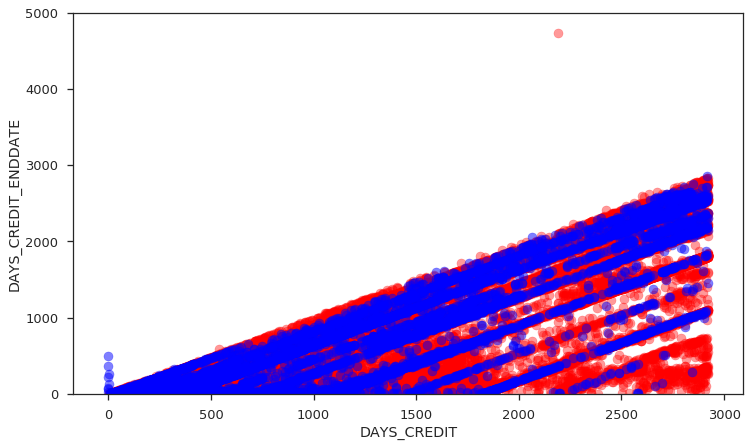

In [122]:
plt.figure(figsize=(12, 7))

plt.scatter(-x.DAYS_CREDIT, -x.DAYS_CREDIT_ENDDATE, c='r', alpha=.4, label='Train')
plt.scatter(-t.DAYS_CREDIT, -t.DAYS_CREDIT_ENDDATE, c='b', alpha=.5, label='Test')
plt.ylim([0, 5000])

plt.xlabel('DAYS_CREDIT')
plt.ylabel('DAYS_CREDIT_ENDDATE');

In [124]:
mask = (bureau.CREDIT_ACTIVE == 'Closed')

x    = app_train.loc[:, ['SK_ID_CURR', 'TARGET']]\
         .merge(bureau.loc[mask, ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'DAYS_ENDDATE_FACT']], 
                on='SK_ID_CURR',
                how='left'
               )

t    = app_test.loc[:, ['SK_ID_CURR']]\
         .merge(bureau.loc[mask, ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'DAYS_ENDDATE_FACT']], 
                on='SK_ID_CURR',
                how='left'
               )

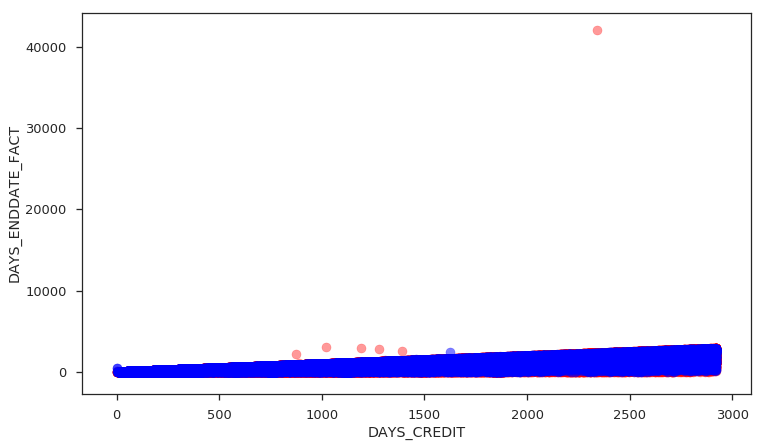

In [125]:
plt.figure(figsize=(12, 7))

plt.scatter(-x.DAYS_CREDIT, -x.DAYS_ENDDATE_FACT, c='r', alpha=.4, label='Train')
plt.scatter(-t.DAYS_CREDIT, -t.DAYS_ENDDATE_FACT, c='b', alpha=.5, label='Test')

plt.xlabel('DAYS_CREDIT')
plt.ylabel('DAYS_ENDDATE_FACT');

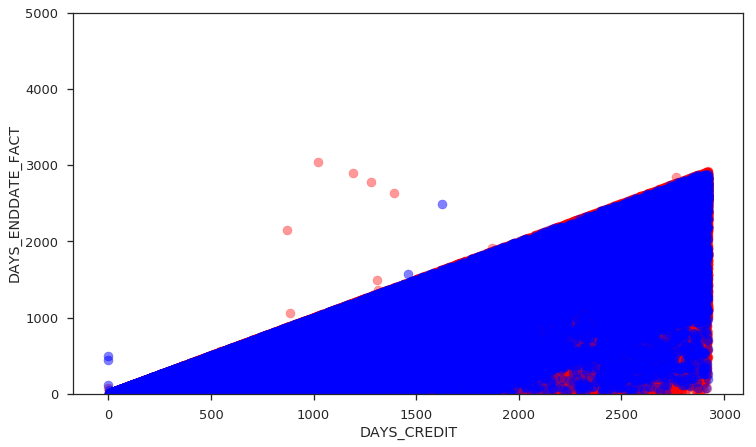

In [126]:
plt.figure(figsize=(12, 7))

plt.scatter(-x.DAYS_CREDIT, -x.DAYS_ENDDATE_FACT, c='r', alpha=.4, label='Train')
plt.scatter(-t.DAYS_CREDIT, -t.DAYS_ENDDATE_FACT, c='b', alpha=.5, label='Test')
plt.ylim([0, 5000])

plt.xlabel('DAYS_CREDIT')
plt.ylabel('DAYS_ENDDATE_FACT');

### Relationship between amt annuity, amt credit and cnt payment for previous home credits

In [17]:
prev_app.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [9]:
x = prev_app.loc[prev_app.NAME_CONTRACT_STATUS == 'Approved', ['SK_ID_CURR',
                                                           'SK_ID_PREV',
                                                           'AMT_ANNUITY',
                                                           'AMT_CREDIT',
                                                           'CNT_PAYMENT'
                                                          ]]

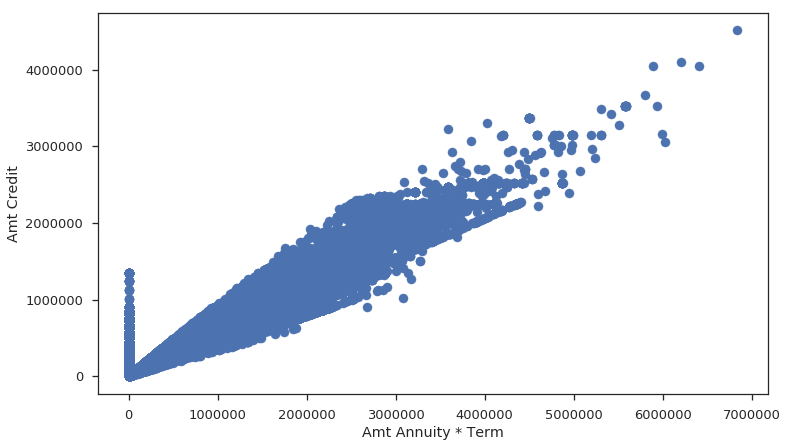

In [8]:
plt.figure(figsize=(12, 7))
plt.scatter(x['AMT_ANNUITY'] * x['CNT_PAYMENT'], x['AMT_CREDIT'])
plt.xlabel('Amt Annuity * Term')
plt.ylabel('Amt Credit');

In [10]:
tr = app_train.loc[:, ['SK_ID_CURR']]\
              .merge(x, on='SK_ID_CURR', how='left')
te = app_test.loc[:, ['SK_ID_CURR']]\
             .merge(x, on='SK_ID_CURR', how='left')

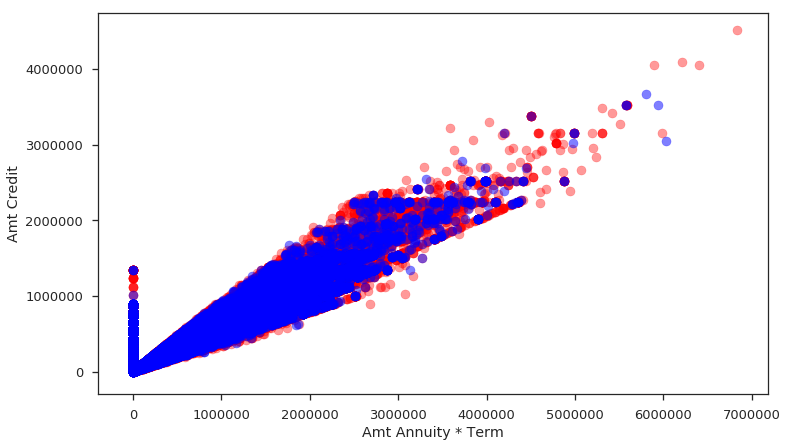

In [12]:
plt.figure(figsize=(12, 7))

plt.scatter(tr['AMT_ANNUITY'] * tr['CNT_PAYMENT'], tr['AMT_CREDIT'], c='r', alpha=.4, label='Train')
plt.scatter(te['AMT_ANNUITY'] * te['CNT_PAYMENT'], te['AMT_CREDIT'], c='b', alpha=.5, label='Test')

plt.xlabel('Amt Annuity * Term')
plt.ylabel('Amt Credit');

In [13]:
tr = app_train.loc[:, ['SK_ID_CURR', 'TARGET']]\
              .merge(x, on='SK_ID_CURR', how='left')

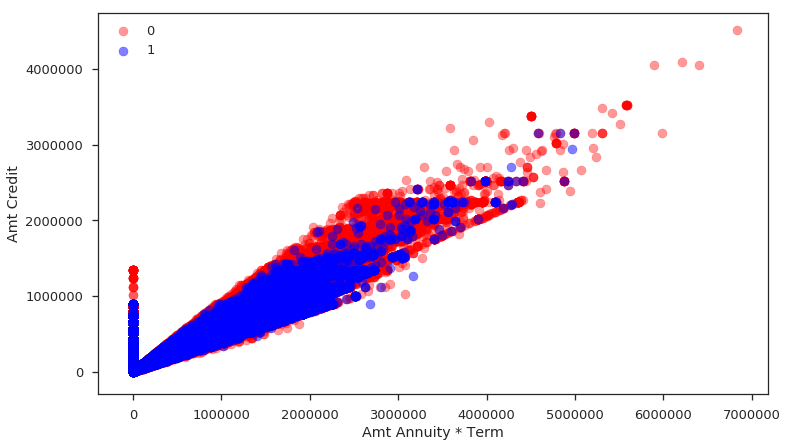

In [16]:
plt.figure(figsize=(12, 7))

plt.scatter(tr.loc[tr.TARGET == 0, 'AMT_ANNUITY'] * tr.loc[tr.TARGET == 0, 'CNT_PAYMENT'], tr.loc[tr.TARGET == 0,'AMT_CREDIT'], c='r', alpha=.4, label='0')
plt.scatter(tr.loc[tr.TARGET == 1, 'AMT_ANNUITY'] * tr.loc[tr.TARGET == 1, 'CNT_PAYMENT'], tr.loc[tr.TARGET == 1,'AMT_CREDIT'], c='b', alpha=.5, label='1')

plt.xlabel('Amt Annuity * Term')
plt.ylabel('Amt Credit')

plt.legend();

In [18]:
x = prev_app.loc[prev_app.NAME_CONTRACT_STATUS == 'Canceled', ['SK_ID_CURR',
                                                           'SK_ID_PREV',
                                                           'AMT_ANNUITY',
                                                           'AMT_CREDIT',
                                                           'CNT_PAYMENT'
                                                          ]]

In [19]:
tr = app_train.loc[:, ['SK_ID_CURR']]\
              .merge(x, on='SK_ID_CURR', how='left')
te = app_test.loc[:, ['SK_ID_CURR']]\
             .merge(x, on='SK_ID_CURR', how='left')

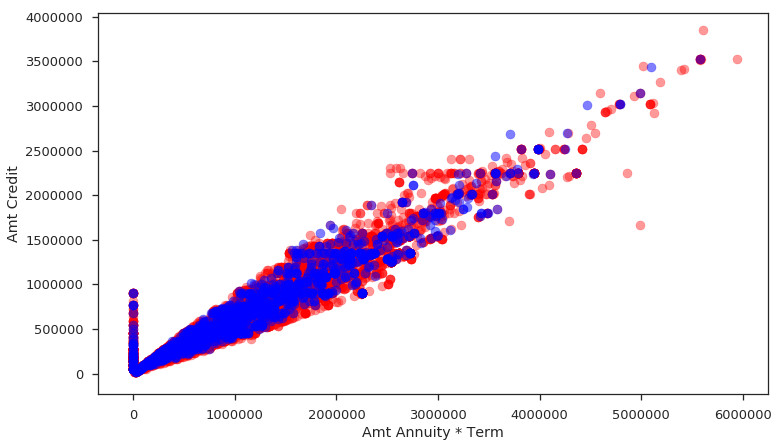

In [20]:
plt.figure(figsize=(12, 7))

plt.scatter(tr['AMT_ANNUITY'] * tr['CNT_PAYMENT'], tr['AMT_CREDIT'], c='r', alpha=.4, label='Train')
plt.scatter(te['AMT_ANNUITY'] * te['CNT_PAYMENT'], te['AMT_CREDIT'], c='b', alpha=.5, label='Test')

plt.xlabel('Amt Annuity * Term')
plt.ylabel('Amt Credit');

In [21]:
tr = app_train.loc[:, ['SK_ID_CURR', 'TARGET']]\
              .merge(x, on='SK_ID_CURR', how='left')

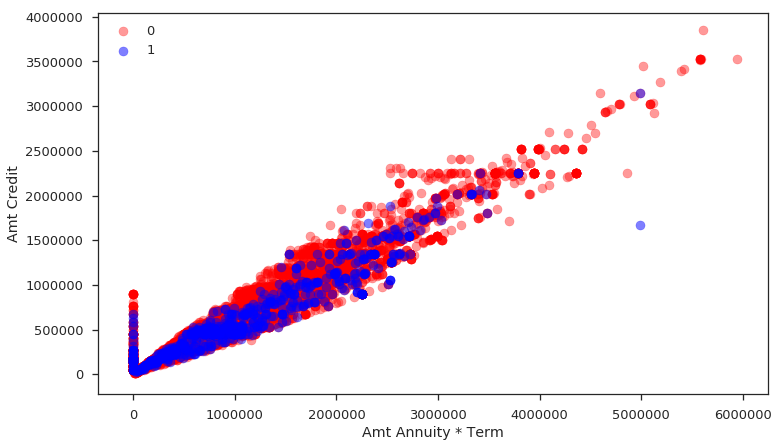

In [22]:
plt.figure(figsize=(12, 7))

plt.scatter(tr.loc[tr.TARGET == 0, 'AMT_ANNUITY'] * tr.loc[tr.TARGET == 0, 'CNT_PAYMENT'], tr.loc[tr.TARGET == 0,'AMT_CREDIT'], c='r', alpha=.4, label='0')
plt.scatter(tr.loc[tr.TARGET == 1, 'AMT_ANNUITY'] * tr.loc[tr.TARGET == 1, 'CNT_PAYMENT'], tr.loc[tr.TARGET == 1,'AMT_CREDIT'], c='b', alpha=.5, label='1')

plt.xlabel('Amt Annuity * Term')
plt.ylabel('Amt Credit')

plt.legend();

### Relationship between CNT_PAYMENT and actual duration

In [24]:
mask = (prev_app.DAYS_TERMINATION.notnull()) & (prev_app.DAYS_TERMINATION != prev_app.DAYS_TERMINATION.max())

x = prev_app.loc[mask, ['SK_ID_CURR', 'CNT_PAYMENT', 'DAYS_DECISION', 'DAYS_TERMINATION']]

tr = app_train.loc[:, ['SK_ID_CURR', 'TARGET']]\
              .merge(x, on='SK_ID_CURR', how='left')
te = app_test.loc[:, ['SK_ID_CURR']]\
              .merge(x, on='SK_ID_CURR', how='left')

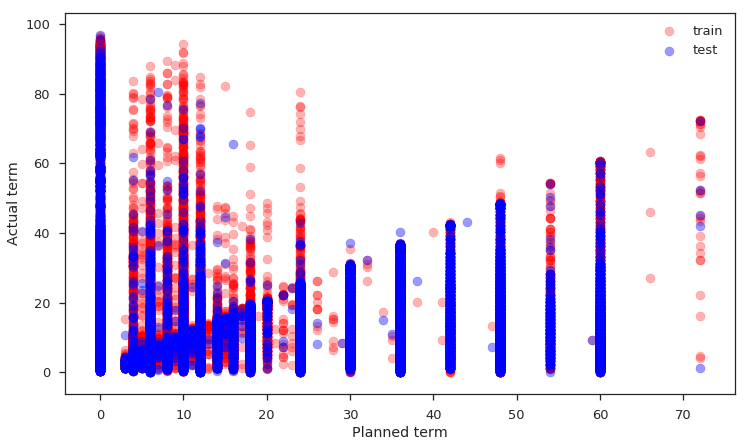

In [26]:
plt.figure(figsize=(12, 7))
plt.scatter(tr.CNT_PAYMENT, (tr.DAYS_TERMINATION - tr.DAYS_DECISION) / 30, c='r', alpha=.3, label='train')
plt.scatter(te.CNT_PAYMENT, (te.DAYS_TERMINATION - te.DAYS_DECISION) / 30, c='b', alpha=.4, label='test')

plt.xlabel('Planned term')
plt.ylabel('Actual term')
plt.legend(loc='best');

### Relationship between number of revolving loans in train and test.

In [7]:
mask = prev_app.NAME_CONTRACT_TYPE == 'Revolving loans'

In [36]:
tr   = app_train.loc[:, ['SK_ID_CURR']].merge(prev_app.loc[mask, ['SK_ID_CURR']], how='inner')
te   = app_test.loc[:, ['SK_ID_CURR']].merge(prev_app.loc[mask, ['SK_ID_CURR']], how='inner')

print(tr.shape, ' ', te.shape)
print(tr.shape[0] / app_train.shape[0], ' ', te.shape[0] / len(app_test))

(161368, 1)   (31796, 1)
0.5247552120086761   0.6523059248317742


In [48]:
display_all(credit_bal.head())

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE    AMT_BALANCE  \
0     2562384      378907              -6      56.970001   
1     2582071      363914              -1   63975.554688   
2     1740877      371185              -7   31815.224609   
3     1389973      337855              -4  236572.109375   
4     1891521      126868              -1  453919.468750   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0              1700.324951               1800.0                     1800.0   
1              2250.000000               2250.0                     2250.0   
2              2250.000000               2250.0                     2250.0   
3             11795.759766              11925.0                    11925.0   
4             22924.890625              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                  0.000000       0.000000              0.000000   
1              60175.078125   64875.554688          64875.554688   
2              26926.425781   31460.085938          31460.085938   
3             224949.281250  233048.968750         233048.968750   
4             443044.406250  453919.468750         453919.468750   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [44]:
x = prev_app.loc[mask, ['SK_ID_CURR', 'SK_ID_PREV']]\
        .merge(credit_bal.loc[:, ['SK_ID_CURR', 'SK_ID_PREV', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL']],
               on=['SK_ID_CURR', 'SK_ID_PREV'],
               how='inner'
              )

tr = app_train.loc[:, ['SK_ID_CURR', 'TARGET']].merge(x, on='SK_ID_CURR', how='inner')
te = app_test.loc[:, ['SK_ID_CURR']].merge(x, on='SK_ID_CURR', how='inner')

In [46]:
tr = tr.sample(n=50000)
te = te.sample(n=50000)

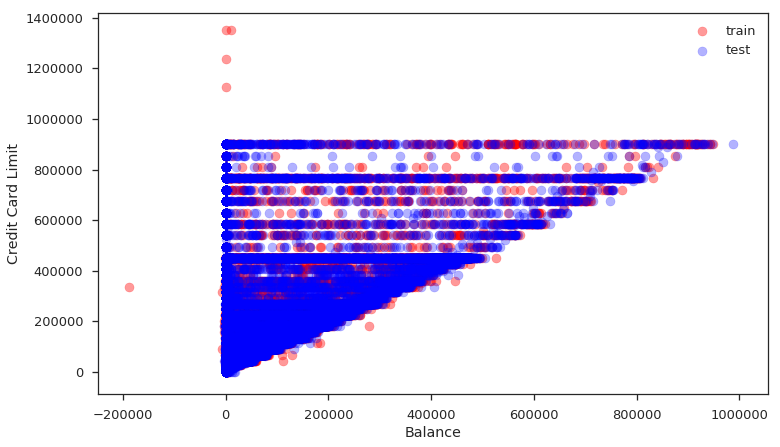

In [47]:
plt.figure(figsize=(12, 7))

plt.scatter(tr.AMT_BALANCE, tr.AMT_CREDIT_LIMIT_ACTUAL, c='r', alpha=.4, label='train')
plt.scatter(te.AMT_BALANCE, te.AMT_CREDIT_LIMIT_ACTUAL, c='b', alpha=.3, label='test')

plt.xlabel('Balance')
plt.ylabel('Credit Card Limit')
plt.legend();

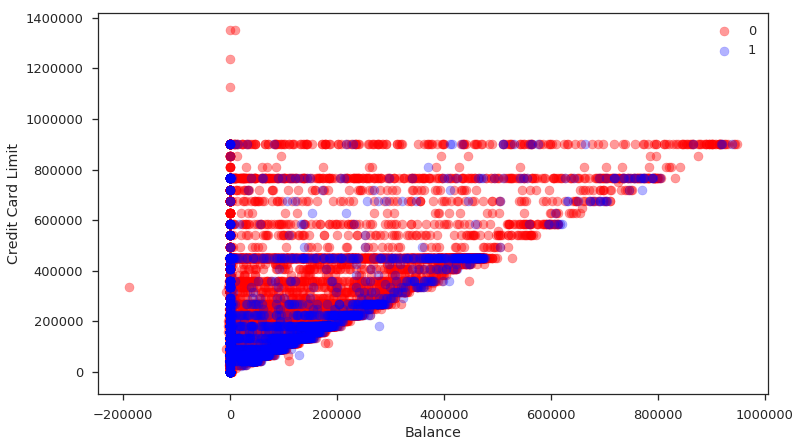

In [49]:
plt.figure(figsize=(12, 7))

plt.scatter(tr[tr.TARGET == 0].AMT_BALANCE, tr[tr.TARGET == 0].AMT_CREDIT_LIMIT_ACTUAL, c='r', alpha=.4, label='0')
plt.scatter(tr[tr.TARGET == 1].AMT_BALANCE, tr[tr.TARGET == 1].AMT_CREDIT_LIMIT_ACTUAL, c='b', alpha=.3, label='1')

plt.xlabel('Balance')
plt.ylabel('Credit Card Limit')
plt.legend();

In [18]:
x = prev_app.loc[mask, ['SK_ID_CURR', 'SK_ID_PREV']]\
        .merge(credit_bal.loc[:, ['SK_ID_CURR', 'SK_ID_PREV', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT']],
               on=['SK_ID_CURR', 'SK_ID_PREV'],
               how='inner'
              )

tr = app_train.loc[:, ['SK_ID_CURR', 'TARGET']].merge(x, on='SK_ID_CURR', how='inner')
te = app_test.loc[:, ['SK_ID_CURR']].merge(x, on='SK_ID_CURR', how='inner')

In [19]:
tr = tr.sample(n=100000)
te = te.sample(n=100000)

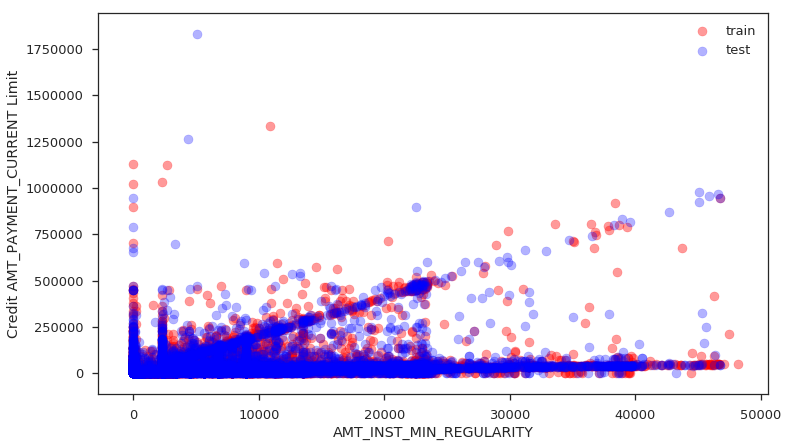

In [52]:
plt.figure(figsize=(12, 7))

plt.scatter(tr.AMT_INST_MIN_REGULARITY, tr.AMT_PAYMENT_CURRENT, c='r', alpha=.4, label='train')
plt.scatter(te.AMT_INST_MIN_REGULARITY, te.AMT_PAYMENT_CURRENT, c='b', alpha=.3, label='test')

plt.xlabel('AMT_INST_MIN_REGULARITY')
plt.ylabel('Credit AMT_PAYMENT_CURRENT Limit')
plt.legend();

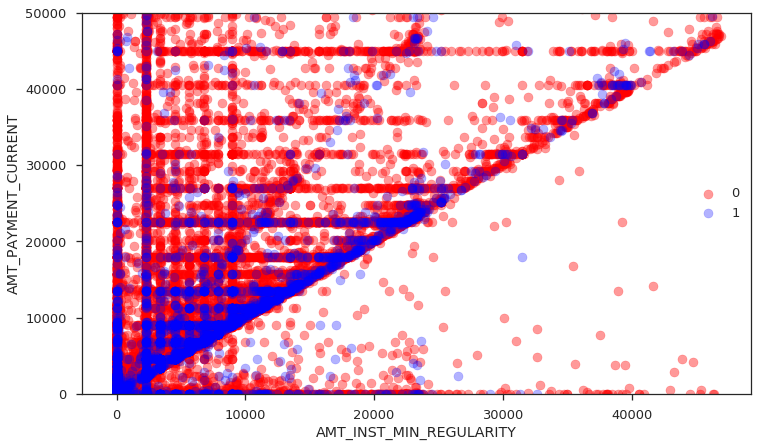

In [21]:
plt.figure(figsize=(12, 7))

plt.scatter(tr[tr.TARGET == 0].AMT_INST_MIN_REGULARITY, tr[tr.TARGET == 0].AMT_PAYMENT_CURRENT, c='r', alpha=.4, label='0')
plt.scatter(tr[tr.TARGET == 1].AMT_INST_MIN_REGULARITY, tr[tr.TARGET == 1].AMT_PAYMENT_CURRENT, c='b', alpha=.3, label='1')

plt.ylim([0, 50000])
plt.xlabel('AMT_INST_MIN_REGULARITY')
plt.ylabel('AMT_PAYMENT_CURRENT')
plt.legend();

In [54]:
x = prev_app.loc[mask, ['SK_ID_CURR', 'SK_ID_PREV']]\
        .merge(credit_bal.loc[:, ['SK_ID_CURR', 'SK_ID_PREV', 'AMT_RECEIVABLE_PRINCIPAL', 
                                  'AMT_RECIVABLE']],
               on=['SK_ID_CURR', 'SK_ID_PREV'],
               how='inner'
              )

tr = app_train.loc[:, ['SK_ID_CURR', 'TARGET']].merge(x, on='SK_ID_CURR', how='inner')
te = app_test.loc[:, ['SK_ID_CURR']].merge(x, on='SK_ID_CURR', how='inner')

In [55]:
tr = tr.sample(n=50000)
te = te.sample(n=50000)

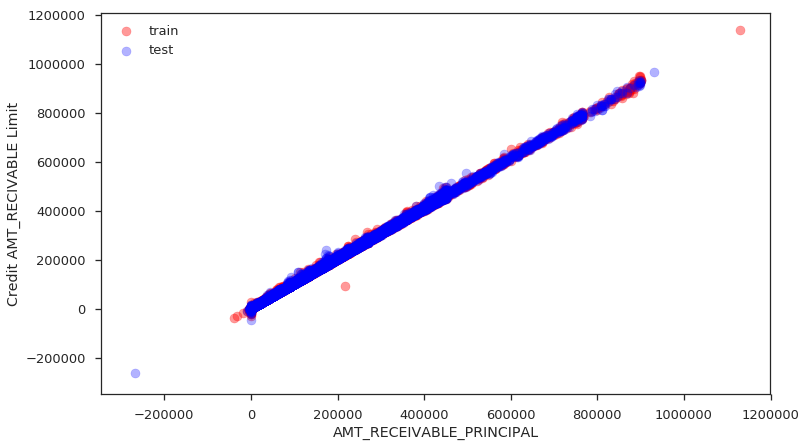

In [56]:
plt.figure(figsize=(12, 7))

plt.scatter(tr.AMT_RECEIVABLE_PRINCIPAL, tr.AMT_RECIVABLE, c='r', alpha=.4, label='train')
plt.scatter(te.AMT_RECEIVABLE_PRINCIPAL, te.AMT_RECIVABLE, c='b', alpha=.3, label='test')

plt.xlabel('AMT_RECEIVABLE_PRINCIPAL')
plt.ylabel('Credit AMT_RECIVABLE Limit')
plt.legend();

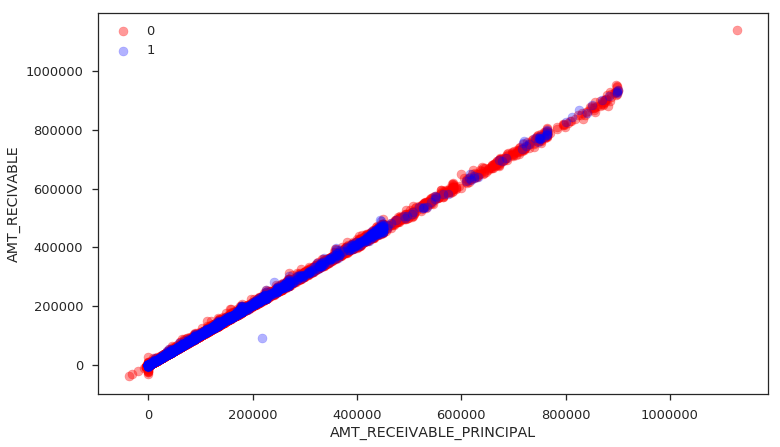

In [57]:
plt.figure(figsize=(12, 7))

plt.scatter(tr[tr.TARGET == 0].AMT_RECEIVABLE_PRINCIPAL, tr[tr.TARGET == 0].AMT_RECIVABLE, c='r', alpha=.4, label='0')
plt.scatter(tr[tr.TARGET == 1].AMT_RECEIVABLE_PRINCIPAL, tr[tr.TARGET == 1].AMT_RECIVABLE, c='b', alpha=.3, label='1')

plt.xlabel('AMT_RECEIVABLE_PRINCIPAL')
plt.ylabel('AMT_RECIVABLE')
plt.legend();

In [11]:
x = prev_app.loc[mask, ['SK_ID_CURR', 'SK_ID_PREV']]\
        .merge(credit_bal.loc[:, ['SK_ID_CURR', 'SK_ID_PREV', 
                                  'AMT_CREDIT_LIMIT_ACTUAL', 
                                  'AMT_RECIVABLE']],
               on=['SK_ID_CURR', 'SK_ID_PREV'],
               how='inner'
              )

tr = app_train.loc[:, ['SK_ID_CURR', 'TARGET']].merge(x, on='SK_ID_CURR', how='inner')
te = app_test.loc[:, ['SK_ID_CURR']].merge(x, on='SK_ID_CURR', how='inner')

In [12]:
tr = tr.sample(n=50000)
te = te.sample(n=50000)

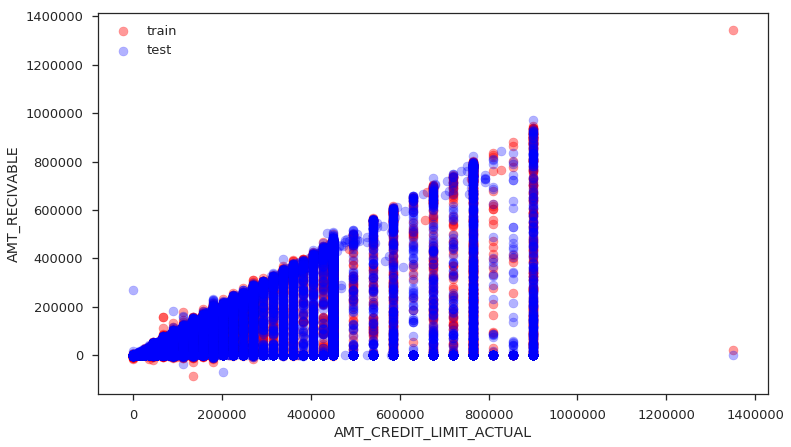

In [13]:
plt.figure(figsize=(12, 7))

plt.scatter(tr.AMT_CREDIT_LIMIT_ACTUAL, tr.AMT_RECIVABLE, c='r', alpha=.4, label='train')
plt.scatter(te.AMT_CREDIT_LIMIT_ACTUAL, te.AMT_RECIVABLE, c='b', alpha=.3, label='test')

plt.xlabel('AMT_CREDIT_LIMIT_ACTUAL')
plt.ylabel('AMT_RECIVABLE')
plt.legend();

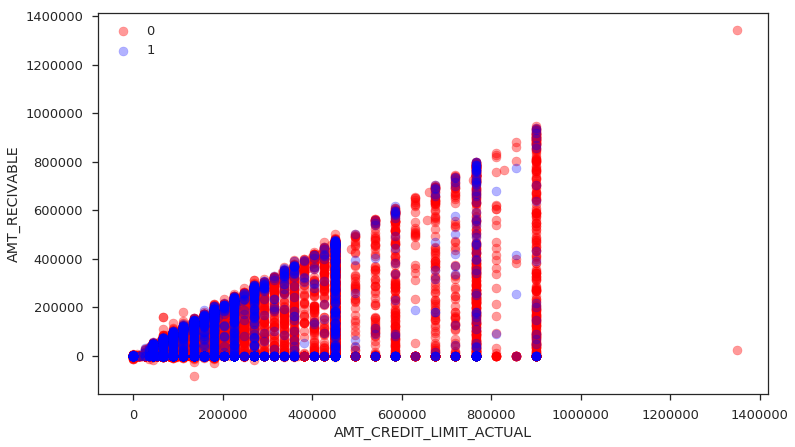

In [14]:
plt.figure(figsize=(12, 7))

plt.scatter(tr[tr.TARGET == 0].AMT_CREDIT_LIMIT_ACTUAL, tr[tr.TARGET == 0].AMT_RECIVABLE, c='r', alpha=.4, label='0')
plt.scatter(tr[tr.TARGET == 1].AMT_CREDIT_LIMIT_ACTUAL, tr[tr.TARGET == 1].AMT_RECIVABLE, c='b', alpha=.3, label='1')

plt.xlabel('AMT_CREDIT_LIMIT_ACTUAL')
plt.ylabel('AMT_RECIVABLE')
plt.legend();

In [33]:
# relationship between min instalment regularity and amt payment current
x = credit_bal.copy()

x.loc[:, 'ratio_instalment_payment'] = x.AMT_PAYMENT_CURRENT - x.AMT_INST_MIN_REGULARITY
tmp = x.groupby('SK_ID_CURR')['ratio_instalment_payment'].median()
tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.8014379973399326

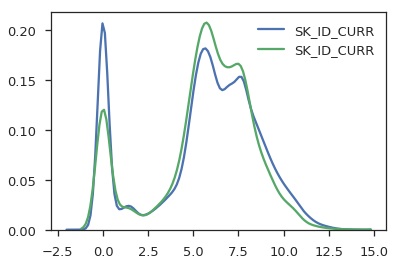

In [34]:
sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

In [35]:
# total payment 
x = credit_bal.copy()

tmp = x.groupby('SK_ID_CURR')['AMT_PAYMENT_CURRENT'].sum()
tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.7173922233676193

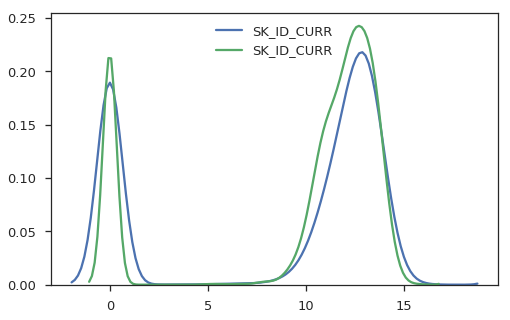

In [38]:
plt.figure(figsize=(8, 5))

sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

In [39]:
# total instalment regular 
x = credit_bal.copy()

tmp = x.groupby('SK_ID_CURR')['AMT_INST_MIN_REGULARITY'].sum()
tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.7173922233676193

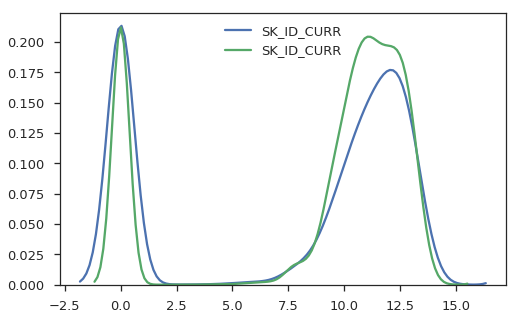

In [40]:
plt.figure(figsize=(8, 5))

sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

In [43]:
# total instalment regular 
x = credit_bal.copy()

num = x.groupby('SK_ID_CURR')['AMT_PAYMENT_CURRENT'].sum()
den = x.groupby('SK_ID_CURR')['AMT_INST_MIN_REGULARITY'].sum()
tmp = app_train.SK_ID_CURR.map((num - den))

tmp[tmp.isnull()].shape[0] / len(tmp)

0.7173922233676193

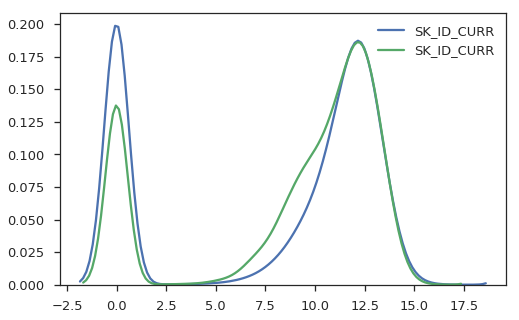

In [44]:
plt.figure(figsize=(8, 5))

sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

In [45]:
credit_bal.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [46]:
# total SK_DPD
x = credit_bal.copy()

tmp = x.groupby('SK_ID_CURR')['SK_DPD'].sum()
tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.7173922233676193

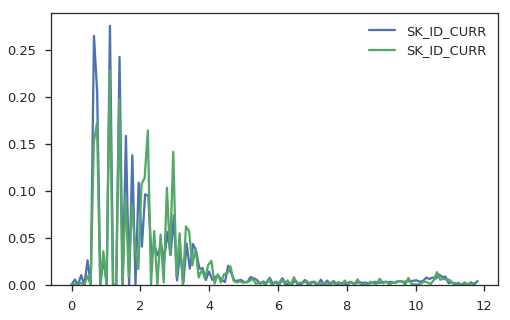

In [47]:
plt.figure(figsize=(8, 5))

sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

In [49]:
# total Amt Balance
x = credit_bal.copy()

tmp = x.groupby('SK_ID_CURR')['AMT_BALANCE'].sum()
tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.7173922233676193

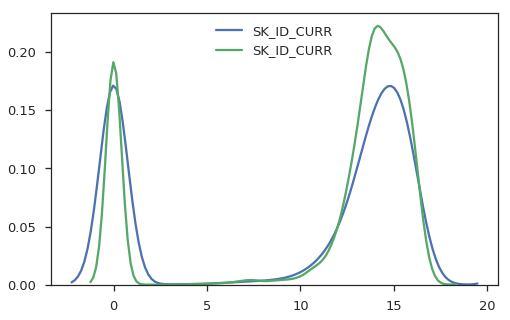

In [50]:
plt.figure(figsize=(8, 5))

sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

In [51]:
# total SK_DPD
x = credit_bal.copy()

tmp = x.groupby('SK_ID_CURR')['AMT_CREDIT_LIMIT_ACTUAL'].sum()
tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.7173922233676193

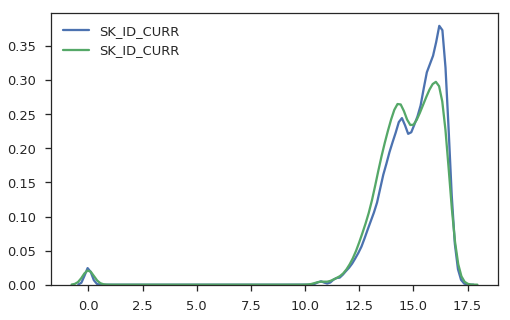

In [52]:
plt.figure(figsize=(8, 5))

sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

In [53]:
# total instalment regular 
x = credit_bal.copy()

a = x.groupby('SK_ID_CURR')['AMT_CREDIT_LIMIT_ACTUAL'].sum()
b = x.groupby('SK_ID_CURR')['AMT_BALANCE'].sum()
tmp = app_train.SK_ID_CURR.map((a - b))

tmp[tmp.isnull()].shape[0] / len(tmp)

0.7173922233676193

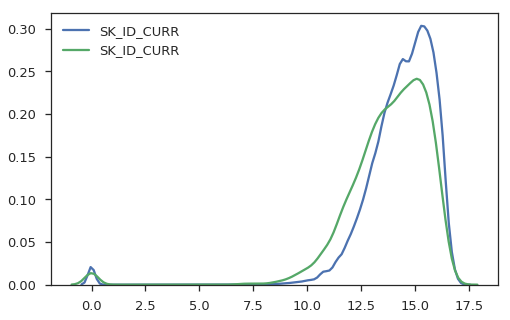

In [54]:
plt.figure(figsize=(8, 5))

sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

In [55]:
# total instalment regular 
x = credit_bal.copy()

a = x.groupby('SK_ID_CURR')['AMT_CREDIT_LIMIT_ACTUAL'].sum()
b = x.groupby('SK_ID_CURR')['AMT_BALANCE'].sum()
tmp = app_train.SK_ID_CURR.map((b / a))

tmp[tmp.isnull()].shape[0] / len(tmp)

0.7198051451817984

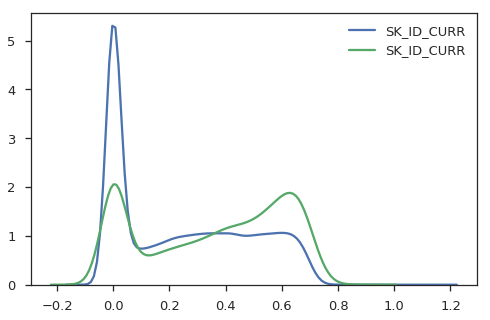

In [56]:
plt.figure(figsize=(8, 5))

sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

### AMT_CREDIT_SUM_DEBT for bureau credits

In [74]:
total_bureau_credit  = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()
total_bureau_debt    = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()

credit = app_train.SK_ID_CURR.map(total_bureau_credit)
debt   = app_train.SK_ID_CURR.map(total_bureau_debt)

tmp    = debt / credit
tmp2   = credit - debt

print(debt[debt.isnull()].shape[0] / len(debt))
print(credit[credit.isnull()].shape[0] / len(credit))
print(tmp[tmp.isnull()].shape[0] / len(tmp))
print(tmp2[tmp2.isnull()].shape[0] / len(tmp2))

0.14314935075493235
0.14314935075493235
0.14646305335418897
0.14314935075493235


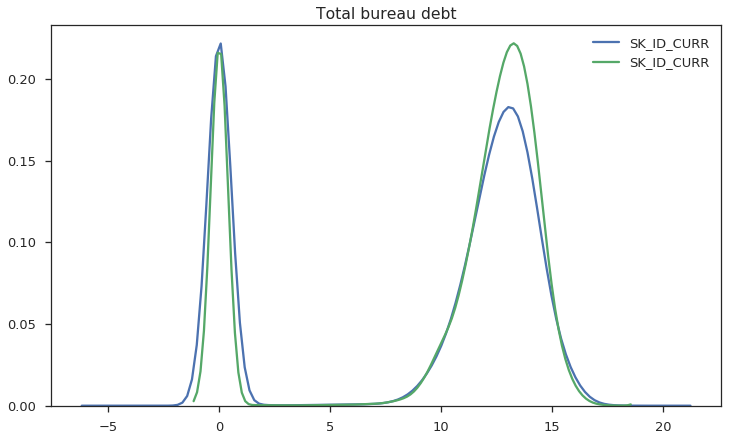

In [70]:
plt.figure(figsize=(12, 7))

sns.kdeplot(debt[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(debt[app_train.TARGET == 1].map(np.log1p))

plt.title('Total bureau debt');

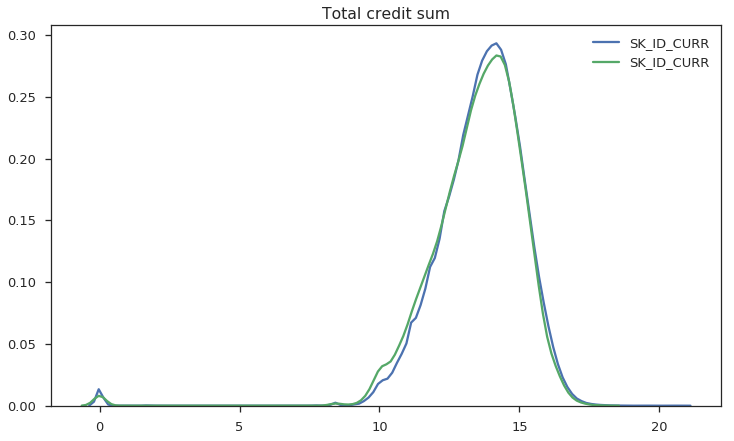

In [71]:
plt.figure(figsize=(12, 7))

sns.kdeplot(credit[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(credit[app_train.TARGET == 1].map(np.log1p))

plt.title('Total credit sum');

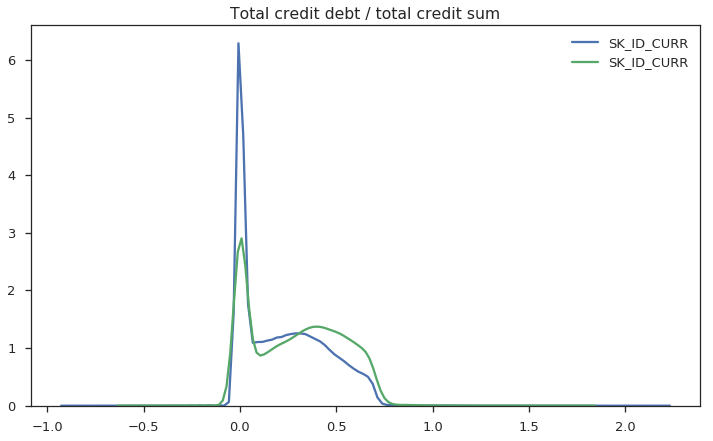

In [73]:
plt.figure(figsize=(12, 7))

sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p))

plt.title('Total credit debt / total credit sum');

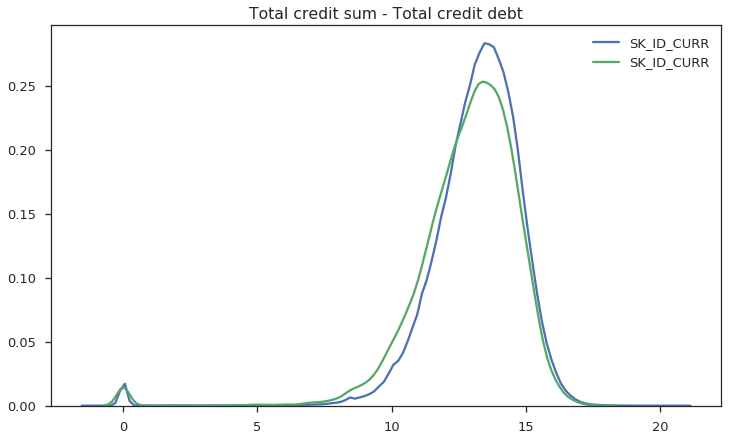

In [76]:
plt.figure(figsize=(12, 7))

sns.kdeplot(tmp2[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp2[app_train.TARGET == 1].map(np.log1p))

plt.title('Total credit sum - Total credit debt');

### Different kind of loans

In [26]:
# x-sell count in previous credits
x = prev_app.loc[:, ['SK_ID_CURR', 'NAME_PRODUCT_TYPE']]
x.loc[:, 'NAME_PRODUCT_TYPE'] = x.NAME_PRODUCT_TYPE.astype(np.str)

product_type_dist = x.groupby(['SK_ID_CURR', 'NAME_PRODUCT_TYPE']).size().unstack().fillna(0)
product_type_dist.loc[:, 'tmp'] = product_type_dist['x-sell'] /\
                                  (product_type_dist['x-sell'] + product_type_dist['walk-in'] + product_type_dist['XNA'])

In [29]:
x   = product_type_dist.reset_index().loc[:, ['SK_ID_CURR', 'tmp']].set_index('SK_ID_CURR')['tmp']

tmp = app_train.SK_ID_CURR.map(x)

print(tmp[tmp.isnull()].shape[0] / len(tmp))

0.05350702901684818


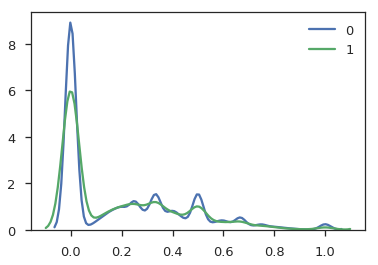

In [32]:
sns.kdeplot(tmp[app_train.TARGET == 0], label='0')
sns.kdeplot(tmp[app_train.TARGET == 1], label='1');

In [61]:
# number of ongoing previous cash/consumer loans
# join between pos_cash and prev_app
# see if the most recent update has status Active or Completed

most_recent_update_month_by_credit  = pos_cash.groupby(['SK_ID_CURR', 'SK_ID_PREV'], as_index=False)['MONTHS_BALANCE'].max()
most_recent_update_status_by_credit = pos_cash.merge(most_recent_update_month_by_credit,
                                                     on=['SK_ID_CURR',
                                                         'SK_ID_PREV',
                                                         'MONTHS_BALANCE'
                                                        ],
                                                     how='inner'
                                                    )

most_recent_update_status_by_credit.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1298869      210084             -41            48.0   
1     1955907      134432             -34             4.0   
2     2714240      302709             -38            16.0   
3     1655882      288348             -47            10.0   
4     2567983      448608             -33            16.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                    0.0            Completed       0           0  
1                    0.0            Completed       0           0  
2                    0.0            Completed       0           0  
3                    0.0            Completed       0           0  
4                    0.0            Completed       0           0

In [68]:
tmp = most_recent_update_status_by_credit.groupby(['SK_ID_CURR', 'NAME_CONTRACT_STATUS']).size().unstack().fillna(0)
total_active = tmp['Completed'] / tmp.sum(axis=1)

total_active.head()

SK_ID_CURR
100001    1.000000
100002    0.000000
100003    0.666667
100004    1.000000
100005    1.000000
dtype: float64

In [69]:
total_active = app_train.SK_ID_CURR.map(total_active)
print(total_active[total_active.isnull()].shape[0] / len(total_active))

0.05875236983392464


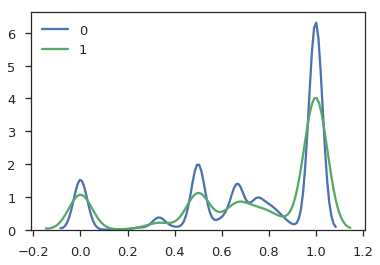

In [71]:
sns.kdeplot(total_active[app_train.TARGET == 0], label='0')
sns.kdeplot(total_active[app_train.TARGET == 1], label='1');

In [88]:
# first dpd in pos_cash
x = pos_cash.loc[pos_cash.SK_DPD > 0, :]
oldest_dpd = x.groupby('SK_ID_CURR')['MONTHS_BALANCE'].max()
latest_dpd = x.groupby('SK_ID_CURR')['MONTHS_BALANCE'].min()
dpd_range  = oldest_dpd / latest_dpd

tmp = app_train.SK_ID_CURR.map(latest_dpd)

print(tmp[tmp.isnull()].shape[0] / len(tmp))

0.8221754668938672


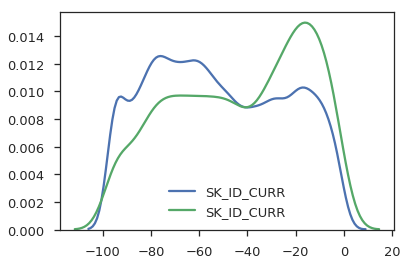

In [89]:
sns.kdeplot(tmp[app_train.TARGET == 0])
sns.kdeplot(tmp[app_train.TARGET == 1]);

In [94]:
# in how many different credits did the client default
total_diff_defaults = x.loc[:, ['SK_ID_CURR', 'SK_ID_PREV']].drop_duplicates().groupby(['SK_ID_CURR']).size()
total_credits = pos_cash.loc[:, ['SK_ID_CURR', 'SK_ID_PREV']].drop_duplicates().groupby(['SK_ID_CURR']).size()

In [99]:
tmp = total_credits - total_diff_defaults
tmp = app_train.SK_ID_CURR.map(tmp)

print(len(tmp[tmp.isnull()]) / len(tmp))

0.8221754668938672


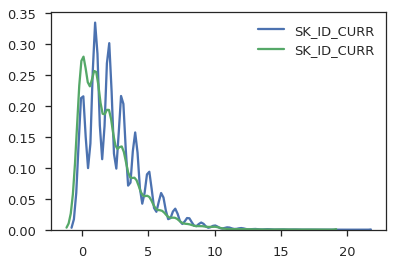

In [100]:
sns.kdeplot(tmp[app_train.TARGET == 0])
sns.kdeplot(tmp[app_train.TARGET == 1]);

In [114]:
# relationship between dpd and type of loan
tmp = x.loc[:, ['SK_ID_CURR', 'SK_ID_PREV']].drop_duplicates()\
       .merge(prev_app, on=['SK_ID_CURR',
                      'SK_ID_PREV'
                     ], how='inner')

In [116]:
display_all(tmp.head())

SK_ID_CURR  SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0      227867     2167174     Consumer loans  2483.100098     55057.500000   
1      168836     1034821     Consumer loans  4580.189941    101556.000000   
2      297133     2653416     Consumer loans  4692.825195    104053.500000   
3      232700     1898081     Consumer loans  2862.629883     63473.714844   
4      177757     1394818     Consumer loans  3978.629883     85324.500000   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     55057.5             0.000     55057.500000                  WEDNESDAY   
1    101556.0             0.000    101556.000000                  WEDNESDAY   
2    104053.5             0.000    104053.500000                   SATURDAY   
3     63472.5             1.215     63473.714844                     FRIDAY   
4     85324.5             0.000     85324.500000                     FRIDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                        7                           Y   
1                       10                           Y   
2                       11                           Y   
3                       14                           Y   
4                       20                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1           0.000000                    NaN   
1                       1           0.000000                    NaN   
2                       1           0.000000                    NaN   
3                       1           0.000021                    NaN   
4                       1           0.000000                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       NaN                    XAP             Approved   
1                       NaN                    XAP             Approved   
2                       NaN                    XAP             Approved   
3                       NaN                    XAP             Approved   
4                       NaN                    XAP             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0          -1668  Cash through the bank                XAP    Unaccompanied   
1          -1729  Cash through the bank                XAP  Spouse, partner   
2          -1620  Cash through the bank                XAP           Family   
3          -1497  Cash through the bank                XAP  Spouse, partner   
4          -1634  Cash through the bank                XAP           Family   

  NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater  Consumer Electronics            POS               XNA   
1         Repeater  Consumer Electronics            POS               XNA   
2              New  Consumer Electronics            POS               XNA   
3        Refreshed  Consumer Electronics            POS               XNA   
4         Repeater                Mobile            POS               XNA   

       CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0      Country-wide              2300  Consumer electronics         24.0   
1  Regional / Local               271  Consumer electronics         24.0   
2      Country-wide              2547  Consumer electronics         24.0   
3      Country-wide              3892  Consumer electronics         24.0   
4      Country-wide              1000  Consumer electronics         24.0   

  NAME_YIELD_GROUP             PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0       low_action  POS household without interest            365243.0   
1       low_action  POS household without interest            365243.0   
2       low_action  POS household without interest            365243.0   
3       low_action  POS household without interest            365243.0   
4       low_action  POS household without interest            36524

In [132]:
(tmp.DAYS_FIRST_DUE - tmp.DAYS_DECISION).value_counts().iloc[:10]

31.0    28770
30.0    22480
32.0     4609
33.0     2343
34.0     2098
35.0     1944
36.0     1631
37.0     1440
38.0     1101
39.0      821
dtype: int64

In [131]:
mask = (prev_app.DAYS_FIRST_DUE != prev_app.DAYS_FIRST_DUE.max())
(prev_app[mask].DAYS_FIRST_DUE - prev_app[mask].DAYS_DECISION).value_counts().iloc[:10]

31.0    322274
30.0    308869
32.0     59854
33.0     30169
34.0     25928
35.0     23012
36.0     20235
37.0     17614
38.0     13790
39.0     10896
dtype: int64